# Fakultät für Physik 

## Physikalisches Praktikum P1 für Studierende der Physik

Versuch P1-12, 22 (Stand: Oktober 2023)

[Raum F1-21](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P1.png)

# Resonanz

Name: Aichert Vorname: Julius E\-Mail: uhoeb@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Achtner Vorname: Martin E-Mail: urrvl@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo01

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: __________________



---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

In [4]:
import numpy as np
import PhyPraKit as ppk
import kafe2
import matplotlib.pyplot as plt
import scipy as sc

# Durchführung

## Aufgabe 1: Freie Schwingung

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-1.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Resonanz/doc/Hinweise-Aufgabe-1.md).**

### Aufgabe 1.1: Schwingung ohne äußere Dämpfung

Lenken Sie das [Pohlsche Rad](https://de.wikipedia.org/wiki/Pohlsches_Rad) aus und stellen Sie mit Hilfe des CASSY Datennahmesystems die folgenden Größen geeignet dar: 

 - Zeitlicher Verlauf des Phasenwinkels, $\varphi(t)$;
 - Zeitlicher Verlauf der Winkelgeschwindigkeit, $\omega(t)$;
 - Stellen Sie den Schwingungsvorgang in einem [Phasenraumportrait](https://de.wikipedia.org/wiki/Phasenraum) $(\varphi,\,\omega)(t)$ dar. 

Der Schwingungsvorgang ist auch ohne äußere Dämpfung nicht dämpfungsfrei. Passen Sie ein Modell mit linearer Dämpfung an die Verteilung $\varphi(t)$ an und bestimmmen Sie daraus die Eigenfrequenz $\omega_{0}$ und die Dämpfung $\lambda_{0}$ der Schwingung.  


---



**Lösung:**

---



Die lineare Dämpfung modellieren wir mit einer Funktion der Form $f(t) = f_0 e^{-\lambda_0 t} sin(\omega t - \phi_0) $. Zusätzlich bestimmen wir die Eigenfrequenz $\omega_0$ durch den Peak in der Fourietransformierten. Die Unsicherheit auf $\omega_0$ ist mit dieser Methode durch die halbe Breite bei halber Höhe gegeben. 

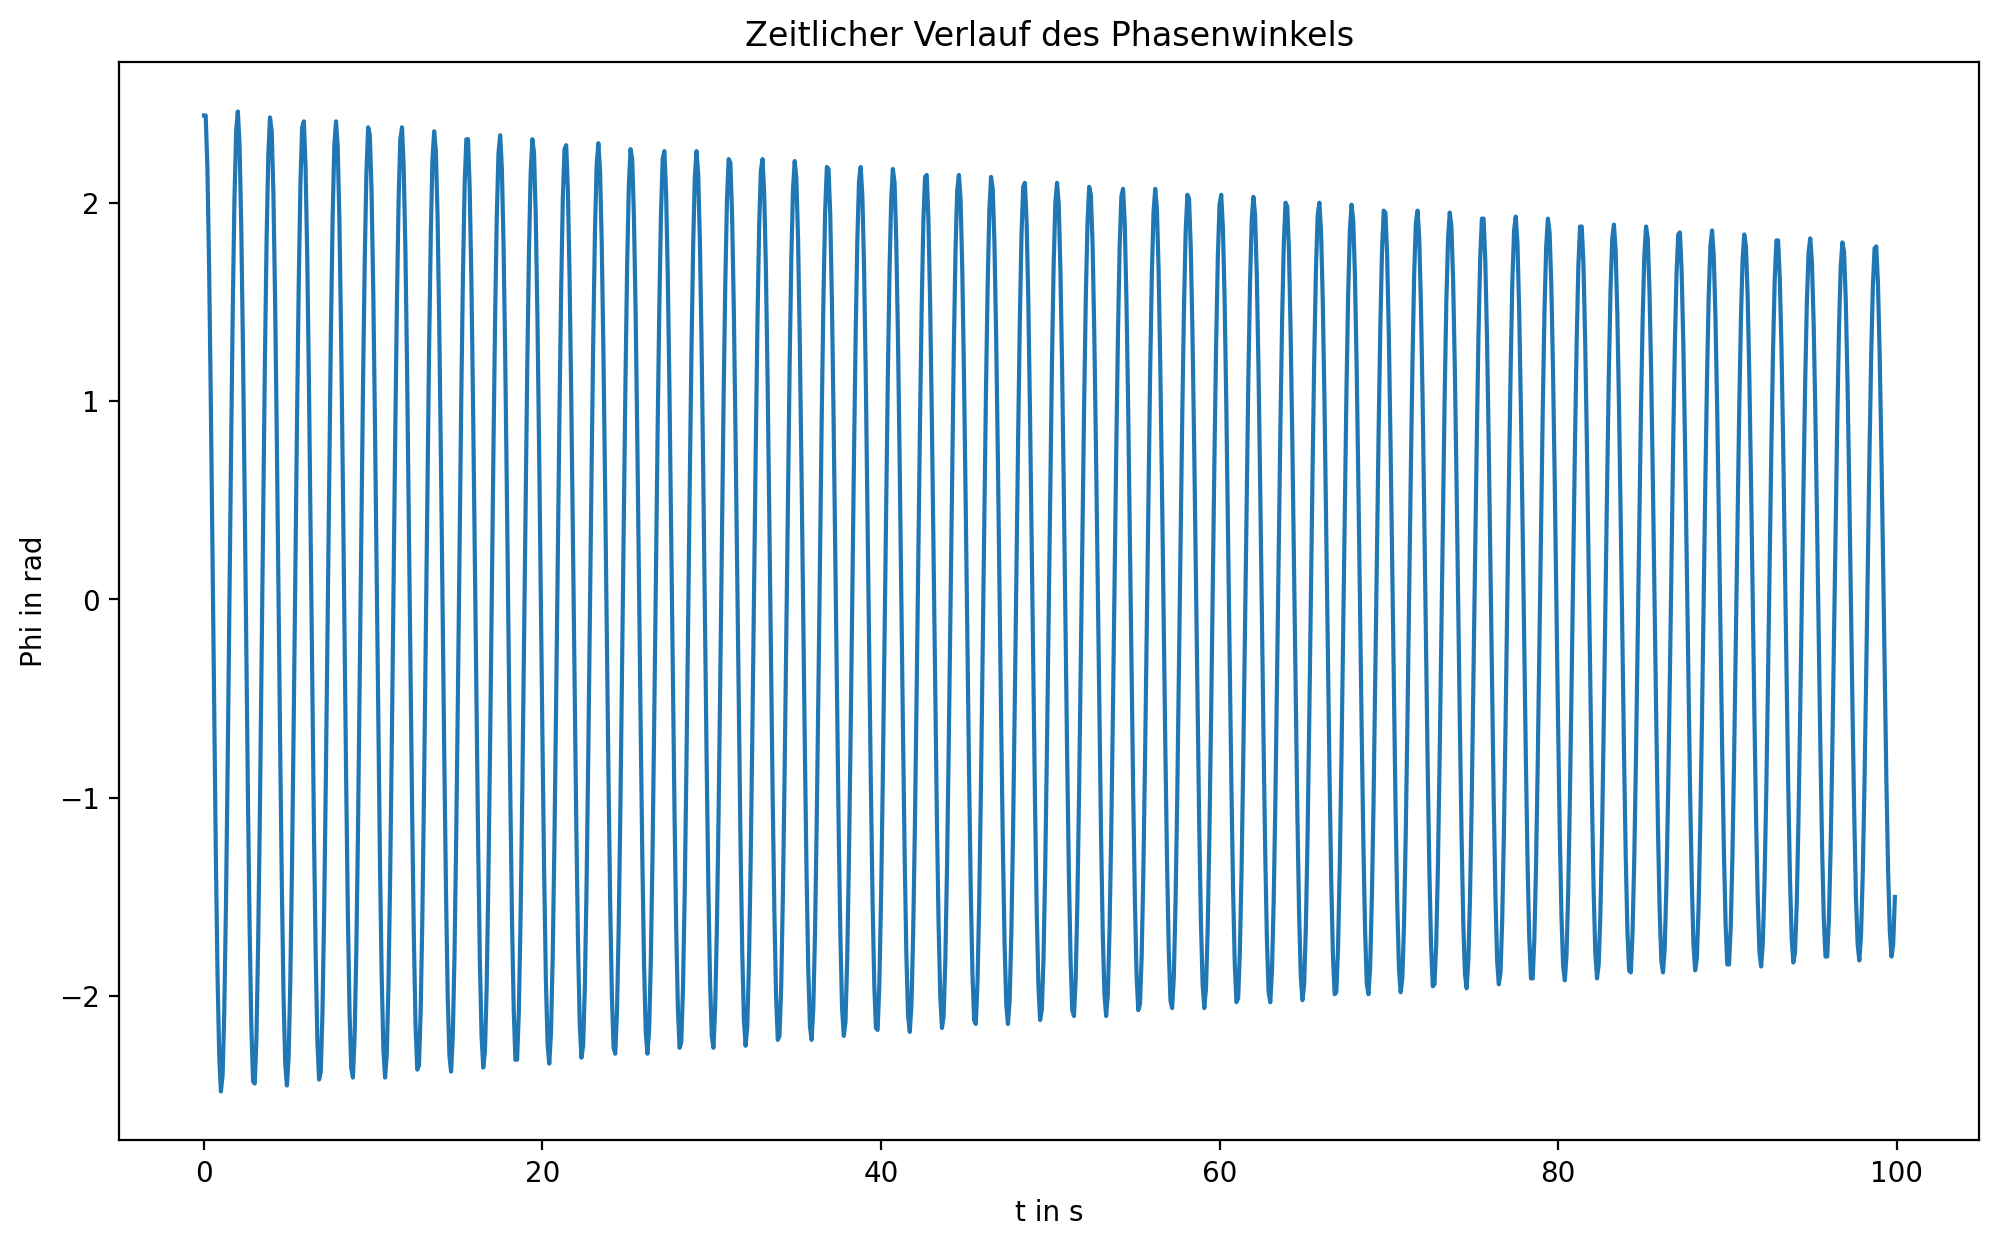

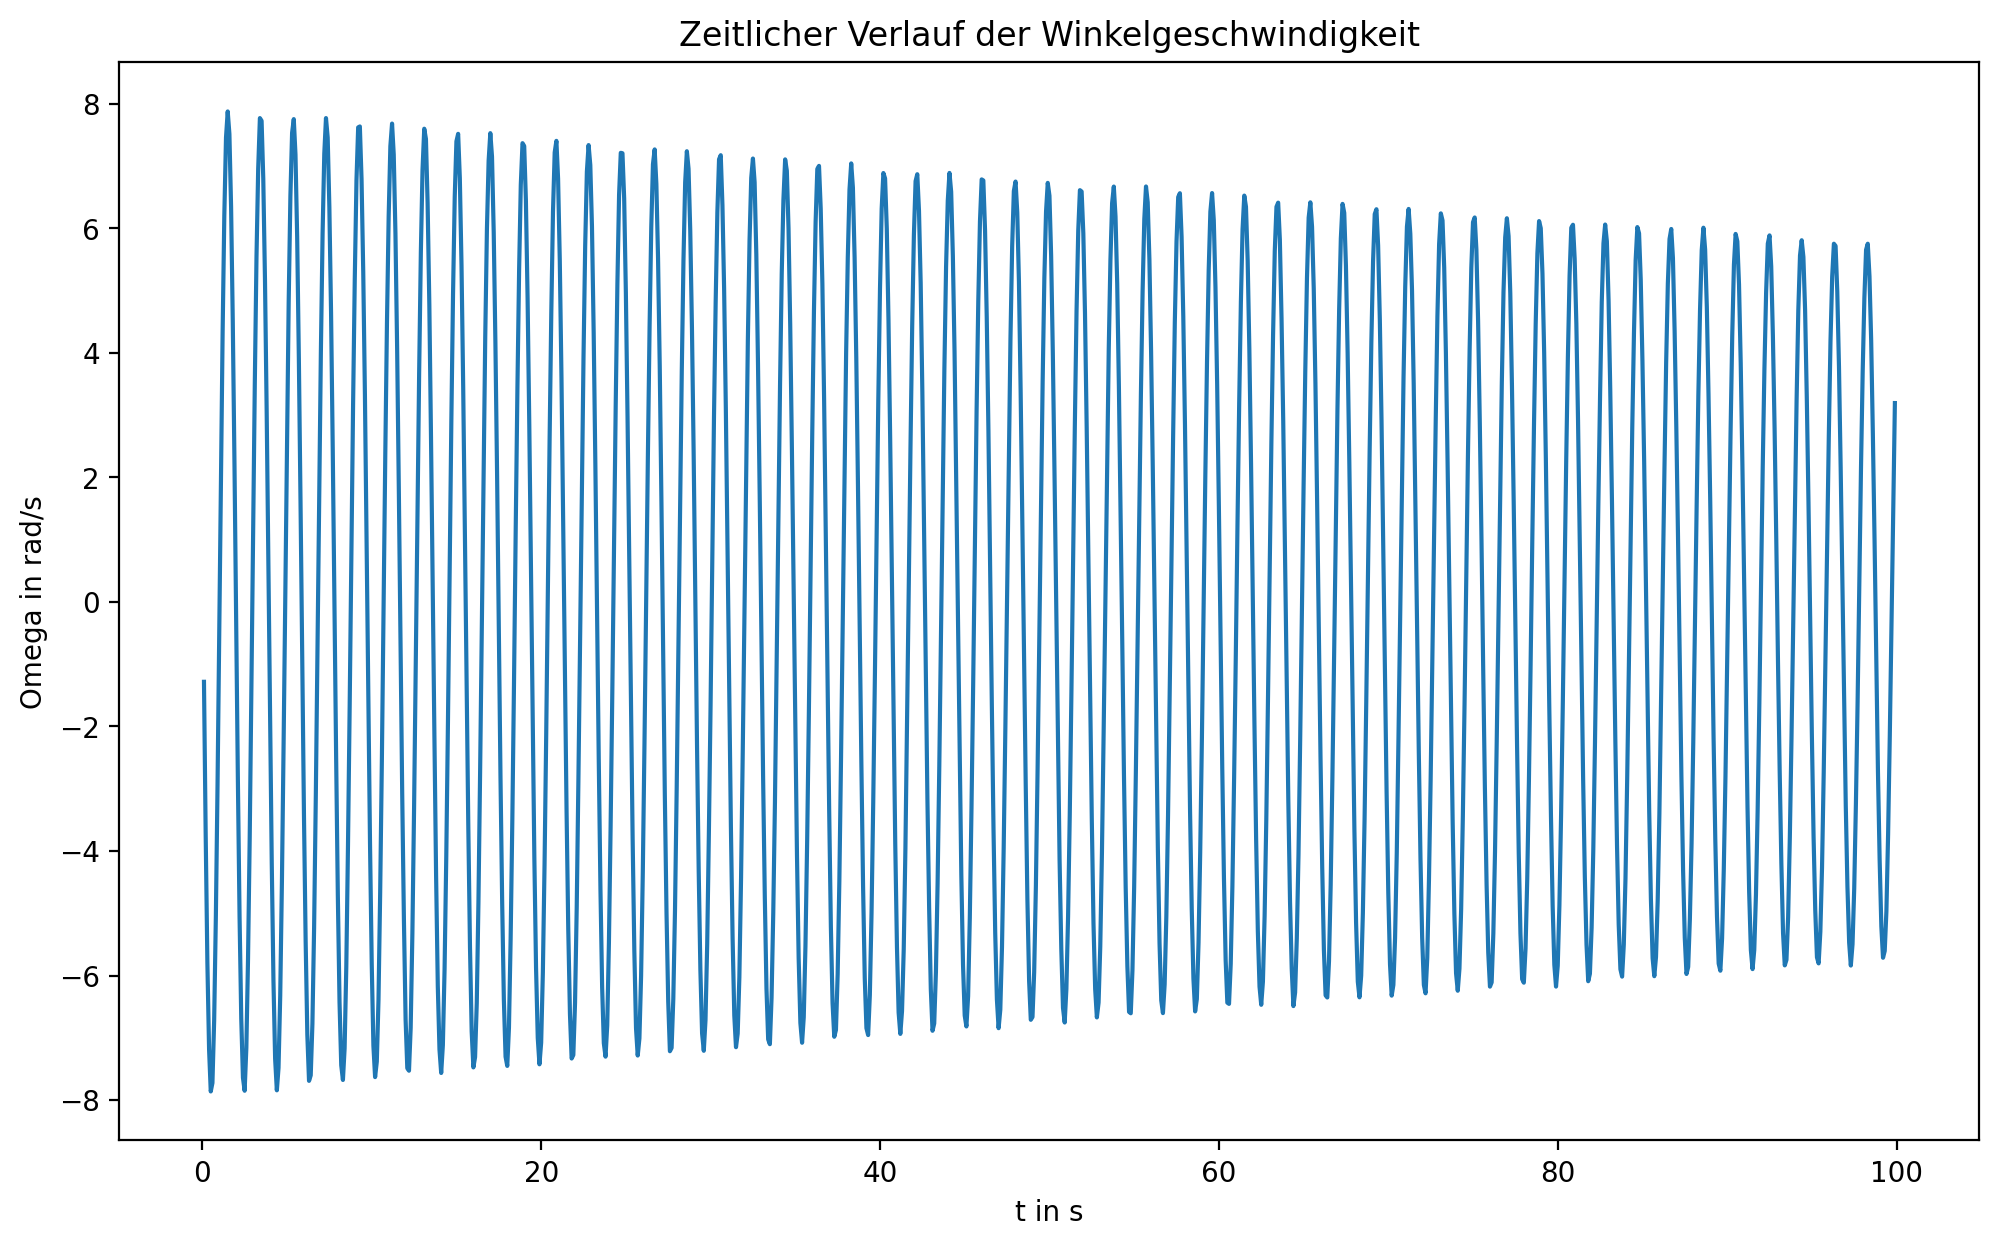

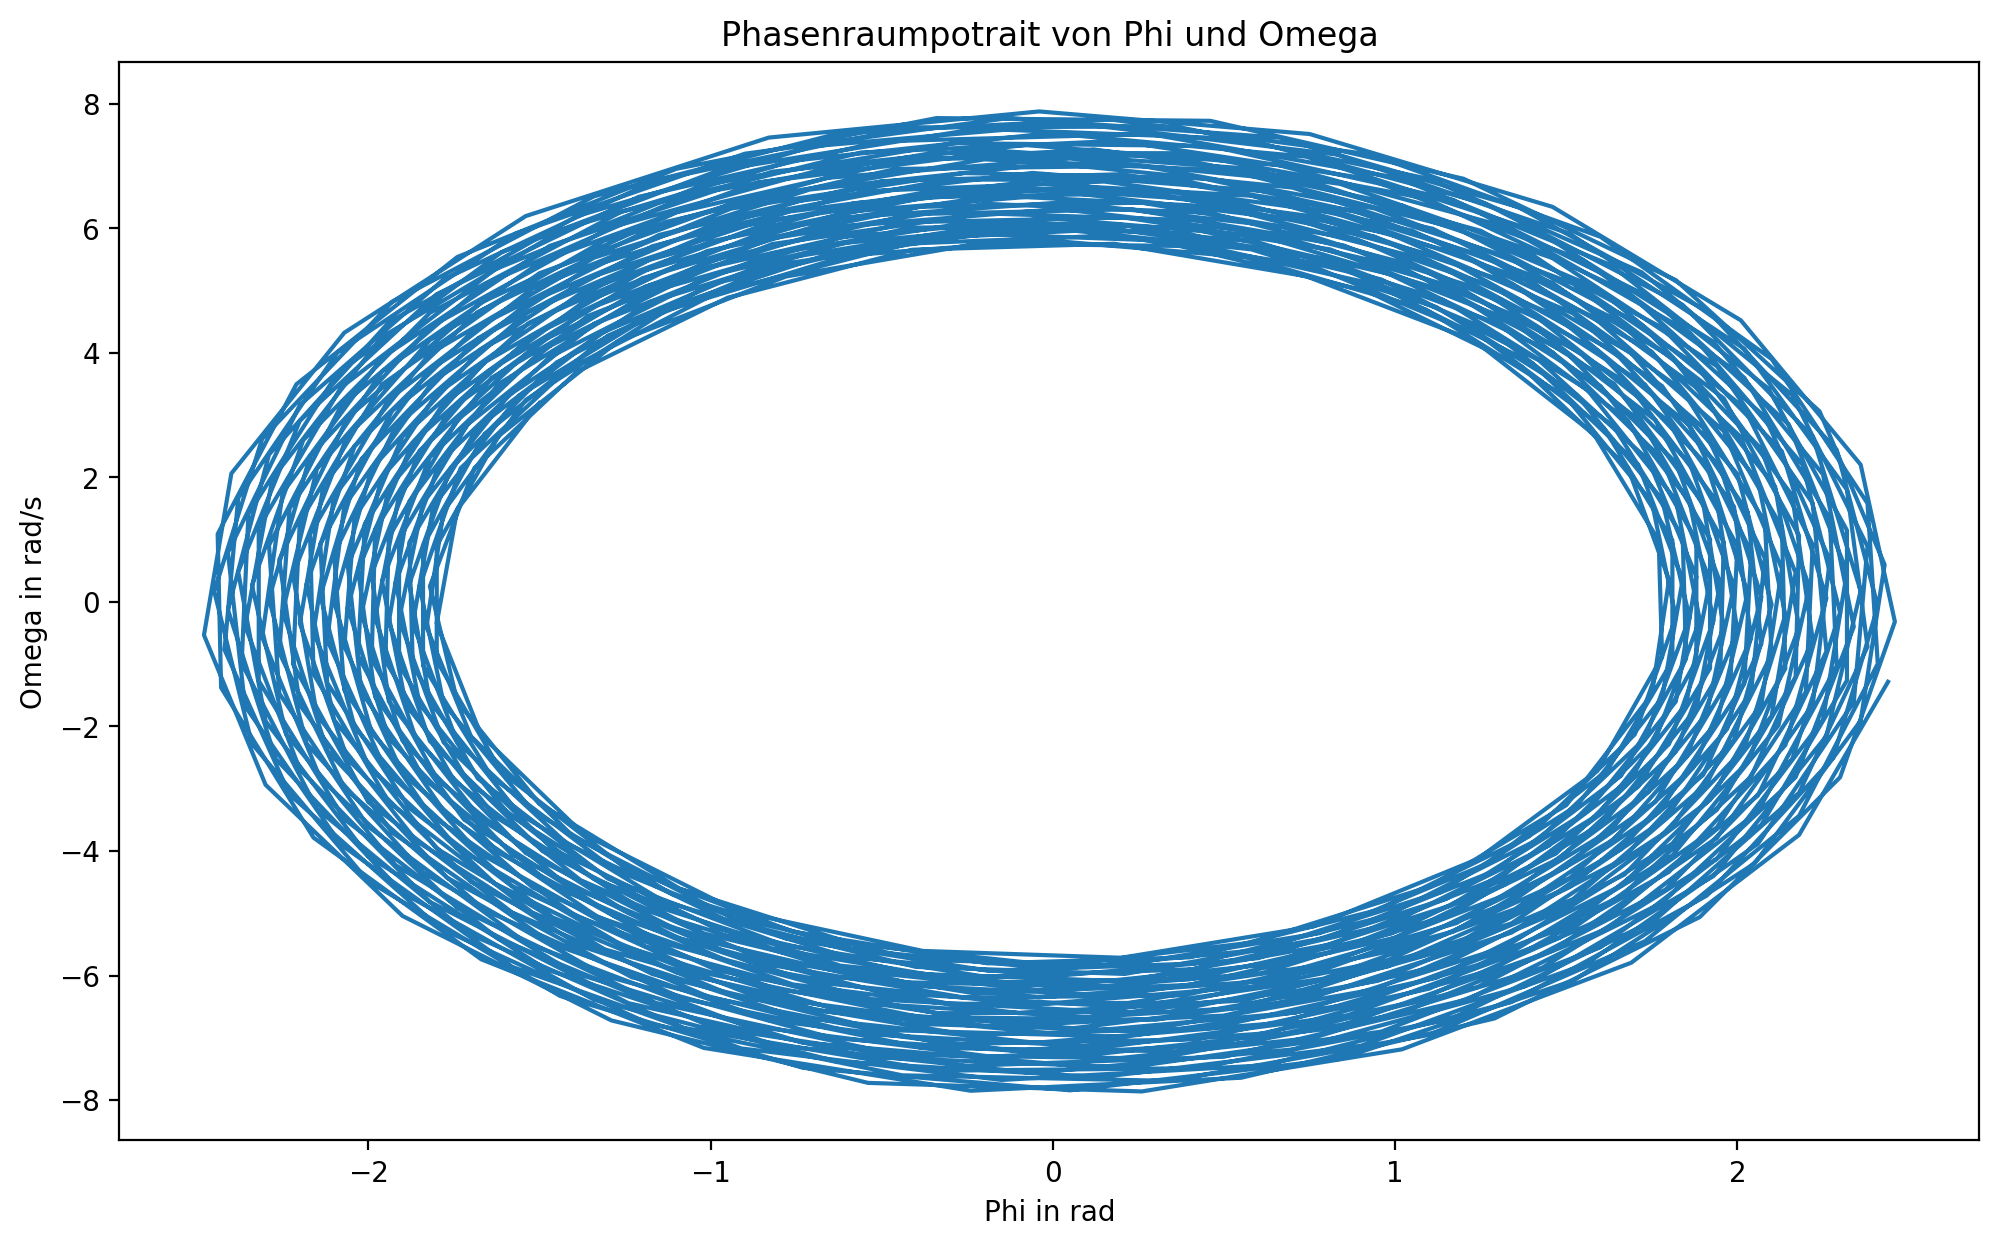

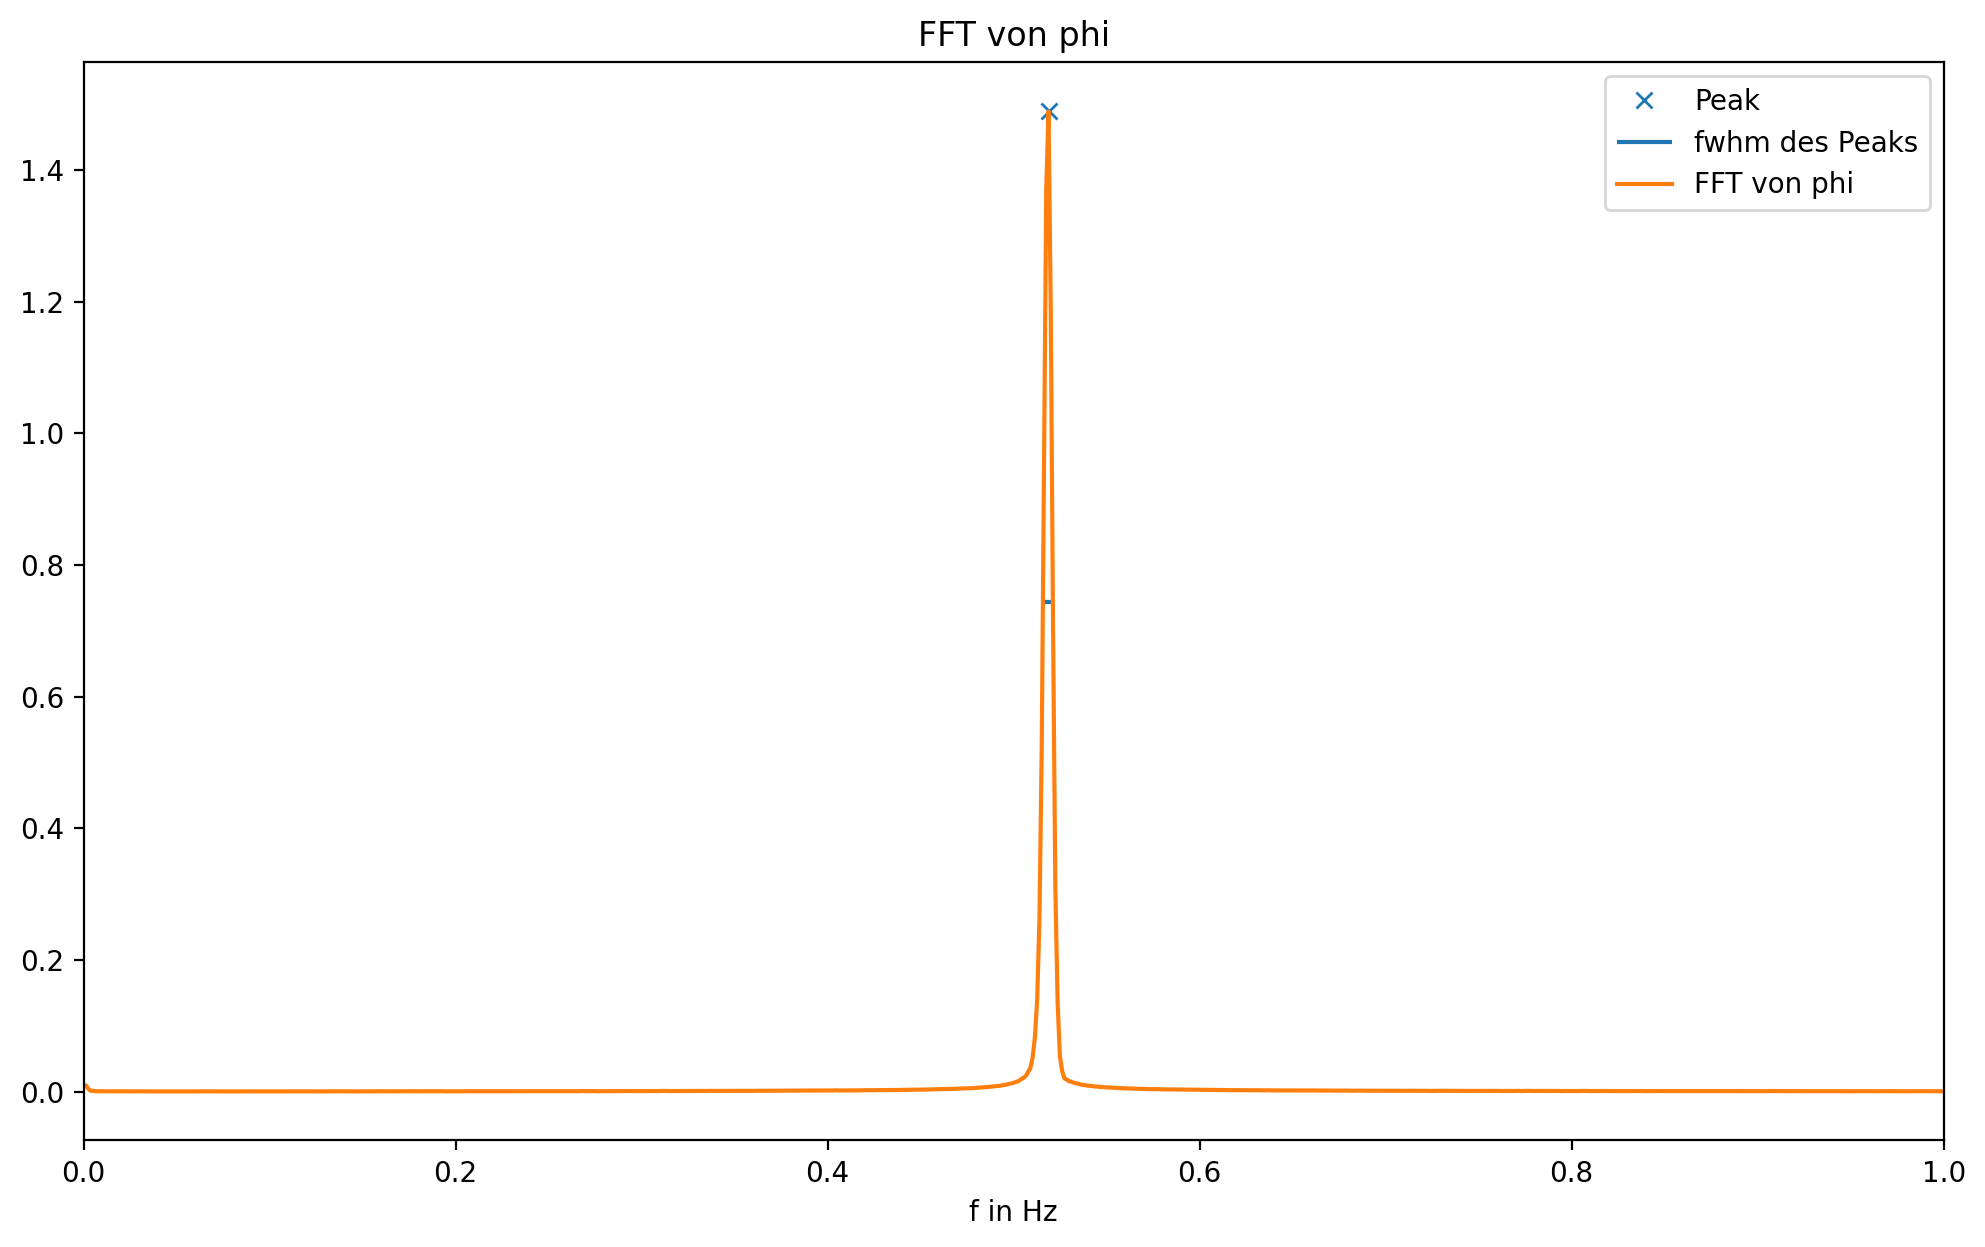

Für die Winkelrequenz omega_0 ergibt sich: (3.26 +- 0.0383) * 1/s


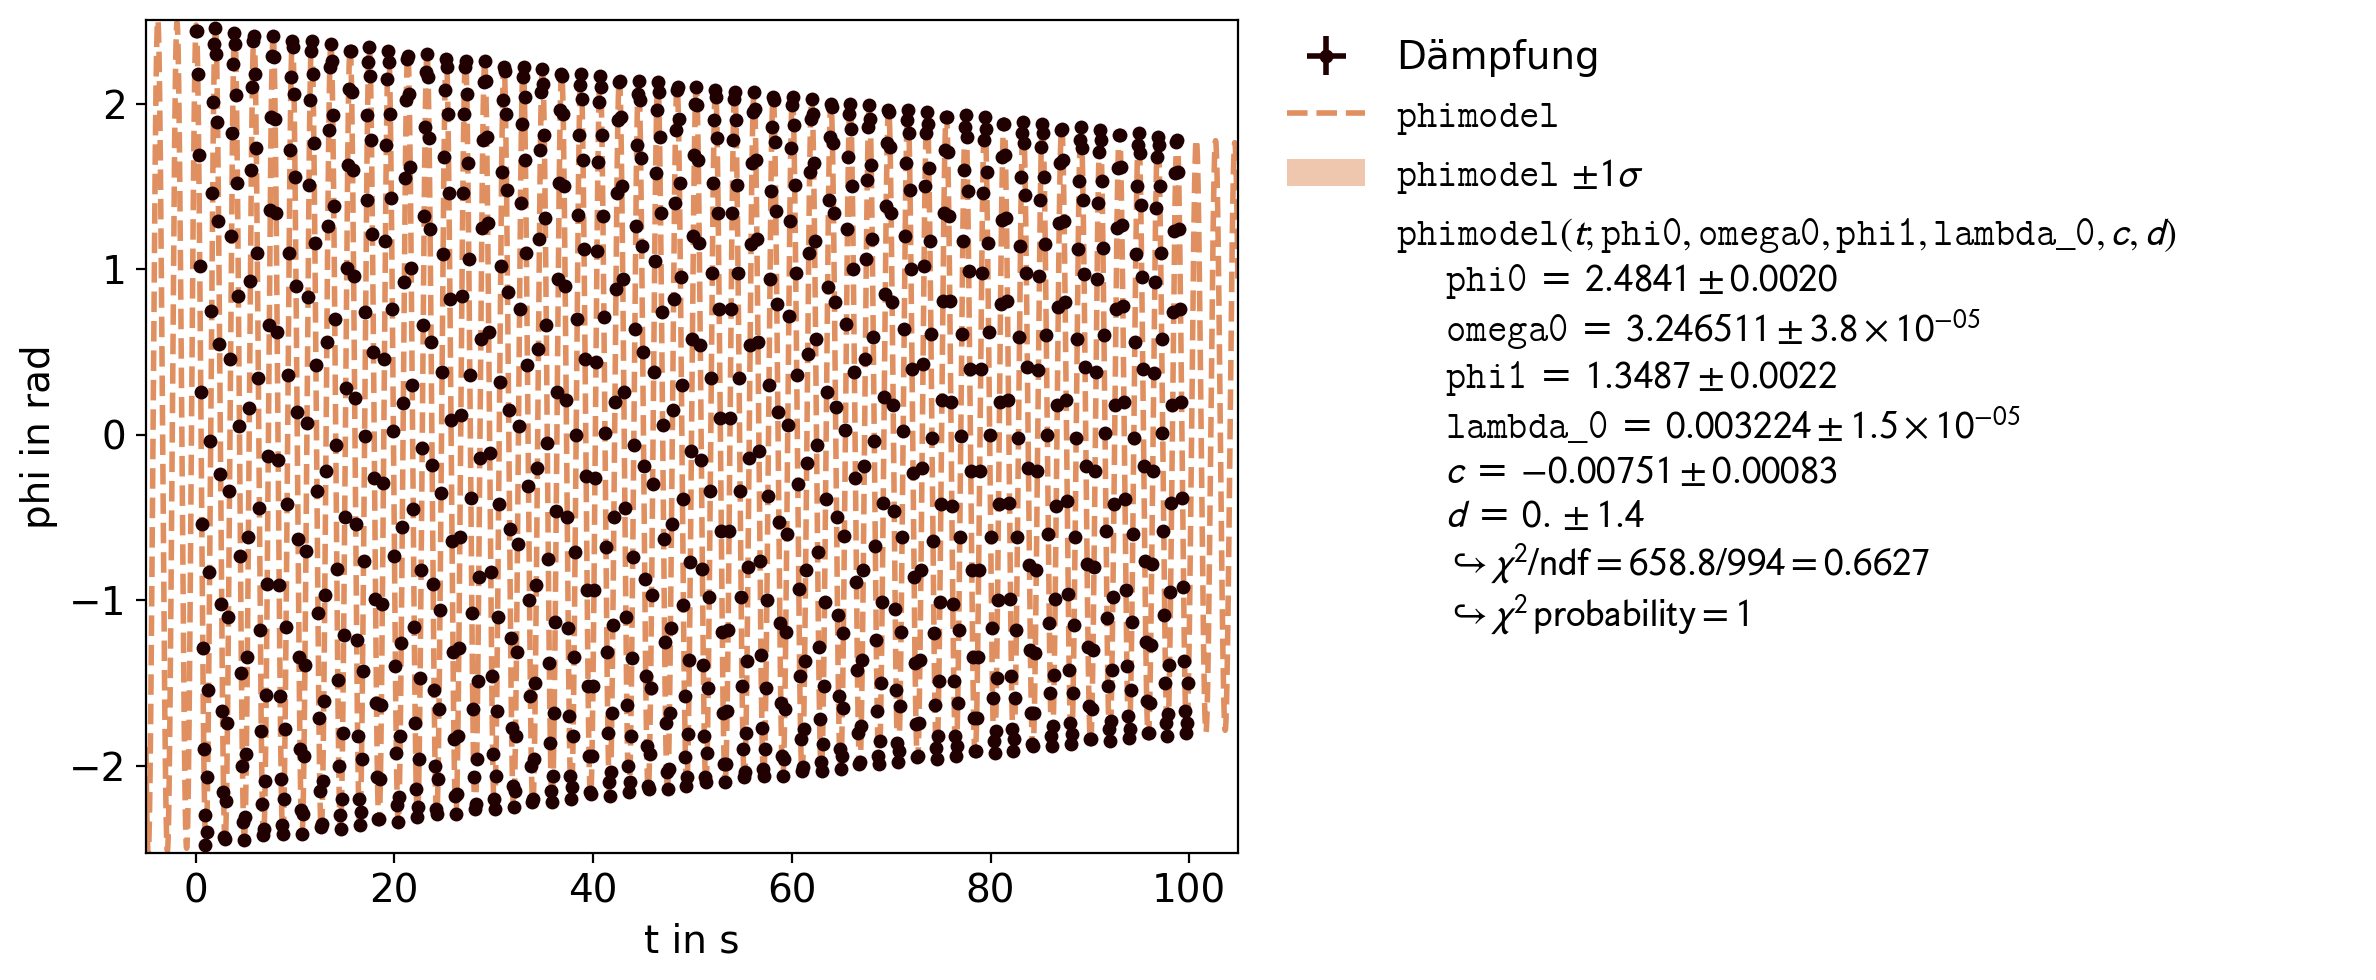

omega_0 über Fit: (3.2465 +- 4e-05) 1/s
omega_0 über Fourier: (3.26 +- 0.038) 1/s
omega_0 gewichtet gemittelt: (3.26 +- 0.038) 1/s
Für lambda_0 ergibt sich mit dem Fit: (0.0032 +- 1e-05) 1/s


In [38]:
import pandas as pd
df = pd.read_table("1.1.csv", delimiter=";", decimal=",", usecols=(0,1,2,3,4,5,6))
t = df["Zeit t / s"].to_numpy()
f = df["Frequenz f / Hz"].to_numpy()
phi = df["Weg &b_A1 / rad"].to_numpy()
omega = df["zeiliche Ableitung w_1 / rad/s"].to_numpy()
fft = df["FFT f_3 / rad"].to_numpy()
t_max = 1000

plt.plot(t[:t_max], phi[:t_max])
plt.title("Zeitlicher Verlauf des Phasenwinkels")
plt.xlabel("t in s")
plt.ylabel("Phi in rad")
plt.show()
plt.plot(t[:t_max], omega[:t_max])
plt.title("Zeitlicher Verlauf der Winkelgeschwindigkeit")
plt.xlabel("t in s")
plt.ylabel("Omega in rad/s")
plt.show()

plt.plot(phi[:t_max], omega[:t_max])
plt.title("Phasenraumpotrait von Phi und Omega")
plt.xlabel("Phi in rad")
plt.ylabel("Omega in rad/s")
plt.show()

peaks, prop = sc.signal.find_peaks(fft, height=0.2)
w0 = np.pi * 2 * f[peaks[0]]

a, b, c, d = sc.signal.peak_widths(fft, peaks, rel_height=0.5, prominence_data=None, wlen=None)

plt.plot(f[peaks], fft[peaks], "x", label = "Peak")
plt.hlines(y=fft[peaks[0]]/2, xmin=f[int(np.floor(c[0]))], xmax=f[int(np.ceil(d[0]))], label="fwhm des Peaks")
d_w0 = np.pi * 2 * (f[int(np.ceil(d[0]))] - f[int(np.floor(c[0]))]) 
plt.plot(f[:1000], fft[:1000], label = "FFT von phi")
plt.legend()
plt.title("FFT von phi")
plt.xlabel("f in Hz")
plt.xlim(0, 1)
plt.show()
print("Für die Winkelrequenz omega_0 ergibt sich: ({w_0} +- {d_w_0}) * 1/s".format(w_0 = round(w0, 2), d_w_0 = round(d_w0, 4)))

#Berechnung der natürlichen Dämpfung
t_error = 0.01
phi_error = 0.01
def phimodel(t,phi0=2.46, omega0=w0, phi1=1.35, lambda_0=0.005, c=0, d=0):
    return phi0 * np.exp(- lambda_0 * t) * np.sin(omega0 * t + phi1) + c

fit = kafe2.XYFit(xy_data=[t[:1000], phi[:1000]], model_function=phimodel) 
fit.add_error(axis='y', err_val=phi_error)
fit.add_error(axis='x', err_val=t_error)
#fit.add_parameter_constraint(name="omega0", value=w0, uncertainty=d_w0)

fit.do_fit()
m = fit.parameter_values[3]
d_m = fit.parameter_errors[3]
w_fit = fit.parameter_values[1]
d_w_fit = fit.parameter_errors[1]
plot = kafe2.Plot(fit)
plot.customize('data', 'label', ["Dämpfung"])
plot.x_label="t in s"
plot.y_label="phi in rad"
plot.plot()
plot.show()
print("omega_0 über Fit: (" + str(round(w_fit, 4)) + " +- " +str(round(d_w_fit, 5)) + ") 1/s")
print("omega_0 über Fourier: (" + str(round(w0, 2)) + " +- " +str(round(d_w0, 3))+ ") 1/s")
w0 = (w0 * d_w0 + w_fit * d_w_fit) / (d_w0 + d_w_fit)
d_w0 = np.sqrt(d_w0**2 + d_w_fit**2)
print("omega_0 gewichtet gemittelt: (" + str(round(w0, 2)) + " +- " +str(round(d_w0, 3))+ ") 1/s")
print("Für lambda_0 ergibt sich mit dem Fit: (" + str(round(m, 4)) + " +- " +str(round(d_m, 5))+ ") 1/s")

### Aufgabe 1.2: Bestimmung des Trägheitsmoments $\Theta$

Bestimmen Sie das Trägheitsmoment $\Theta$ des Drehpendels. Gehen Sie dabei wie folgt vor:

 - Bestimmen Sie die Winkelrichtgröße $D$ der im Pohlschen Rad verbauten Schneckenfeder. Messen Sie hierzu die Winkelauslenkung des Drehpendels (in beiden Drehrichtungen), indem Sie mit Hilfe eines Fadens geeignete Gewichte so an den Zeiger des Pendels anhängen, dass der Faden durch die Randnut bei $r = r_{a}$ läuft. Bestimmen Sie $\Theta$ aus der Gleichung $$\omega_{0} = \sqrt{\frac{D}{\Theta}}$$.
 - Vergleichen Sie das Ergebnis, im Rahmen seiner Unsicherheiten mit Ihrer Erwartung aus einer einfachen geometrischen Abschätzung. 

---

**Lösung:**

Wir haben die Auslenkung des Pohlschen Pendels mit drei verschiedenen Gewichten, 5g, 10g, 20g, in beide Richtungen gemessen. Damit konnten wir über $F_g = mg = F_{Sp} = Ds$ Die Federkonstante bestimmen und damit nach obiger Formel das Trägheitsmoment $\Theta$. Die Unsicherheit auf Theta ergibt sich nach dem Fehlerforpflanzungsgesetz.

---

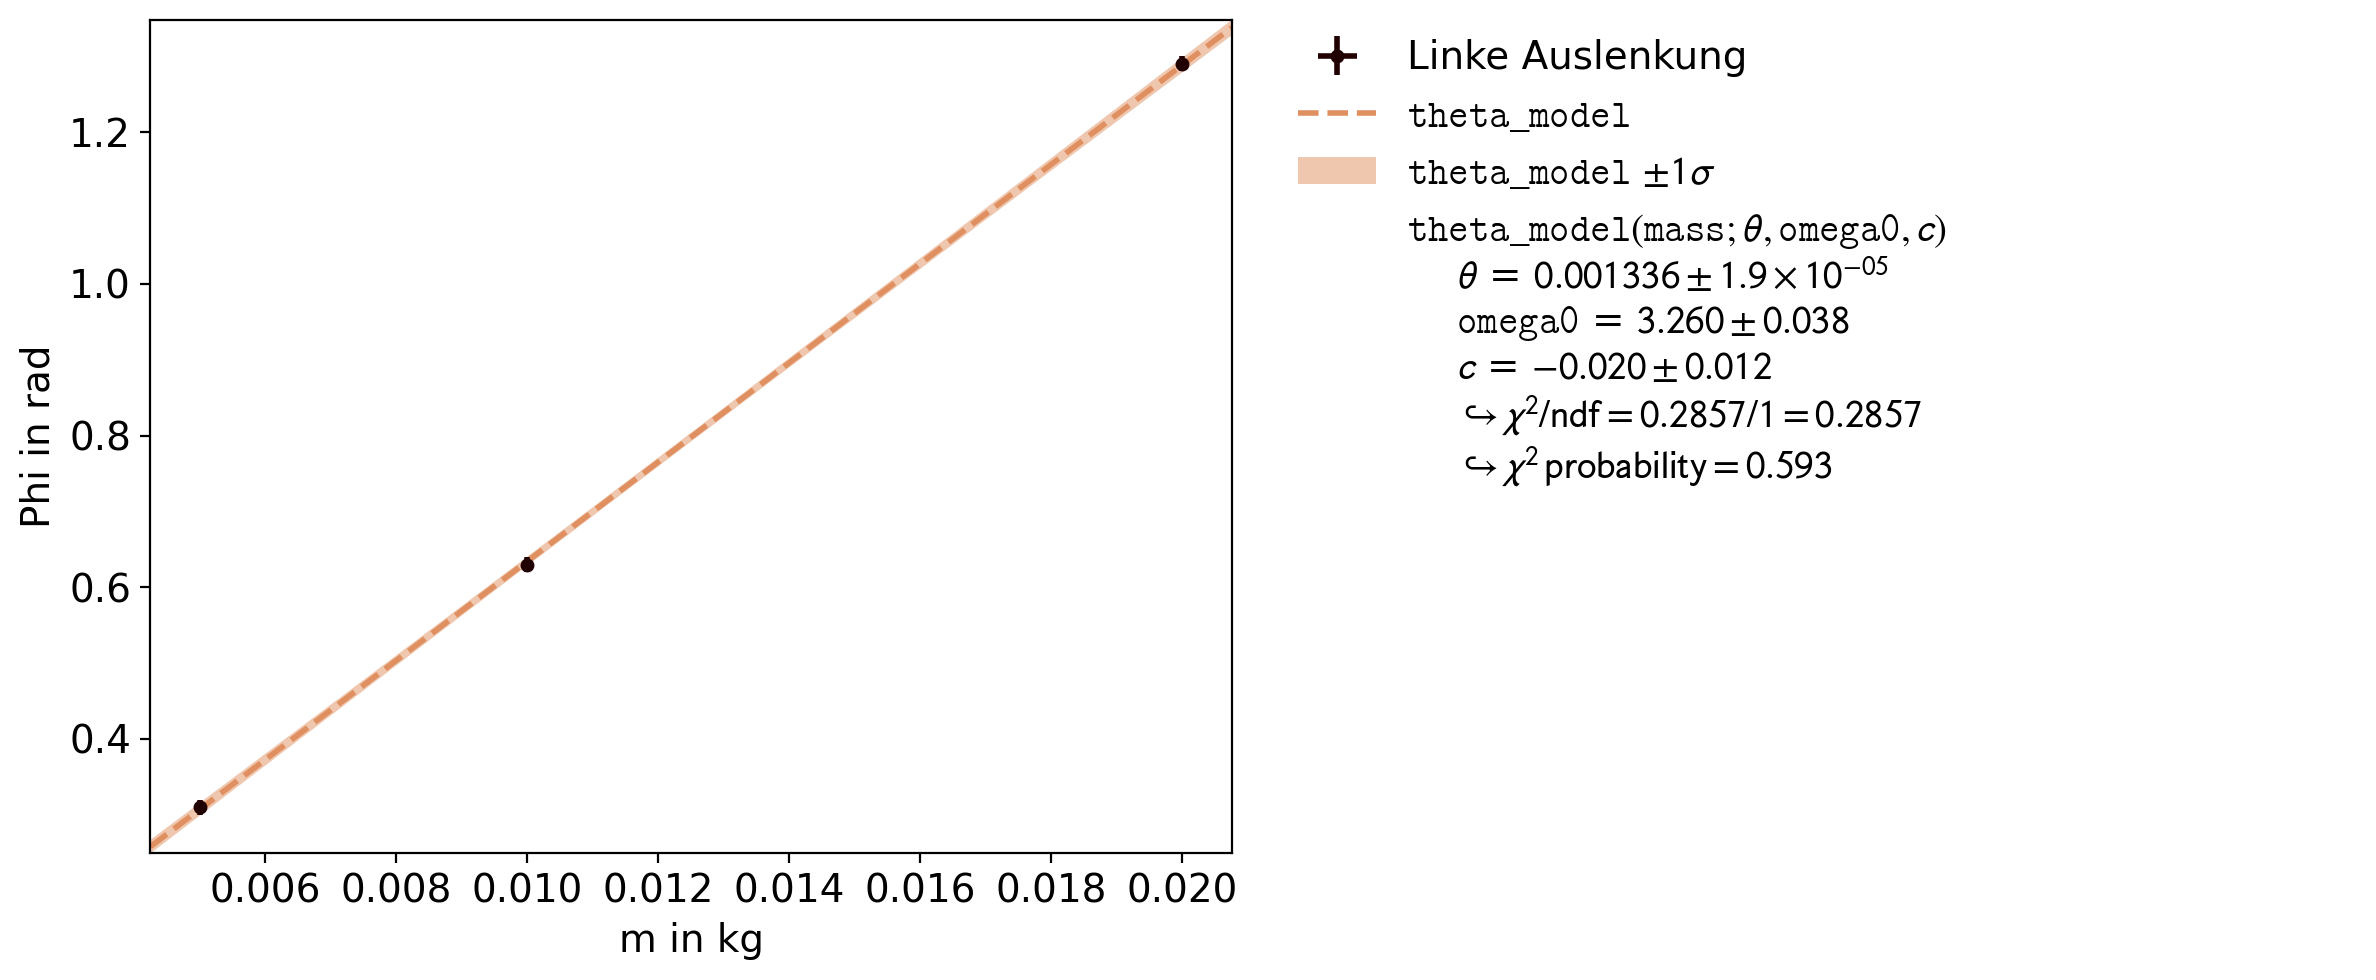

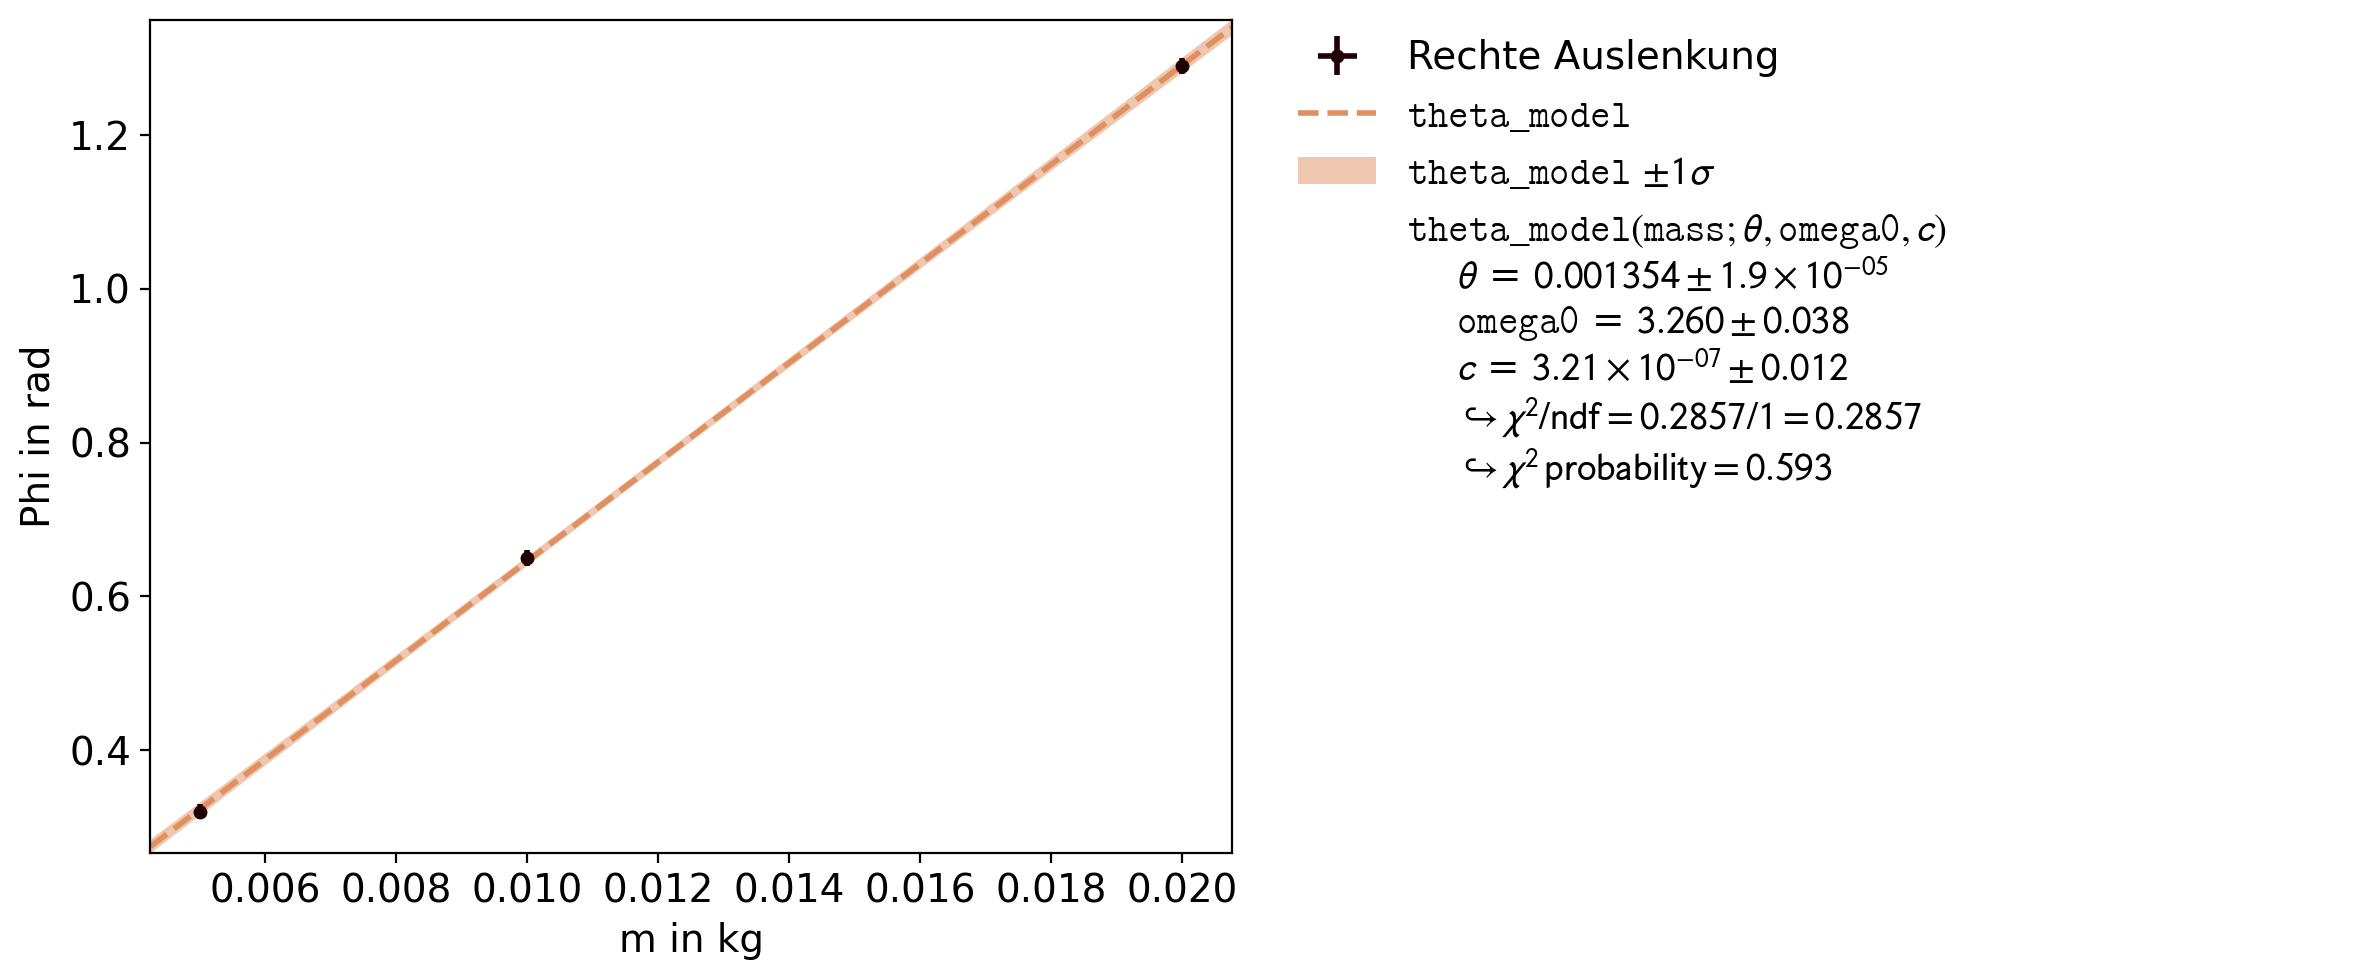

Gewichtete gemittelte Werte für das Trägheitsmoment Theta: (0.0013 +- 2.7e-05) * kg m^2


In [7]:
phi_l = [0.31,0.63,1.29]
phi_r = [0.32,0.65,1.29]
masses = [0.005, 0.01, 0.02]
a = [phi[i] / masses[i] for i in range(len(masses))]
r_g = 0.0947
g = 9.81

def theta_model(mass, theta, omega0, c=0):
    return r_g * g * mass / (w0**2 * theta) + c

#auslenkung nach links
fit = kafe2.XYFit(xy_data=[masses, phi_l], model_function=theta_model) 
fit.add_error(axis='y', err_val=phi_error)
fit.add_error(axis='x', err_val=0)

fit.add_parameter_constraint(name="omega0", value=w0, uncertainty=d_w0)

fit.do_fit()
theta_1 = fit.parameter_values[0]
d_theta_1 = fit.parameter_errors[0]
plot = kafe2.Plot(fit)
plot.x_label="m in kg"
plot.y_label="Phi in rad"
plot.customize('data', 'label', [(0, "Linke Auslenkung")])
plot.plot()
plot.show()


#Auslenkung nach rechts
fit = kafe2.XYFit(xy_data=[masses, phi_r], model_function=theta_model) 
fit.add_error(axis='y', err_val=phi_error)
fit.add_error(axis='x', err_val=0)

fit.add_parameter_constraint(name="omega0", value=w0, uncertainty=d_w0)

fit.do_fit()
theta_2 = fit.parameter_values[0]
d_theta_2 = fit.parameter_errors[0]
plot = kafe2.Plot(fit)
plot.x_label="m in kg"
plot.y_label="Phi in rad"
plot.customize('data', 'label', [(0, "Rechte Auslenkung")])
plot.plot()
plot.show()

theta = (d_theta_1 * theta_1 + d_theta_2 * theta_2) / (d_theta_1 + d_theta_2)
d_theta = np.sqrt(d_theta_1**2 + d_theta_2**2)
print("Gewichtete gemittelte Werte für das Trägheitsmoment Theta: ({Theta} +- {D_theta}) * kg m^2".format(Theta = round(theta, 4), D_theta = round(d_theta, 6)))

Über Hinweis bestimmtes Trägheitsmoment: $\Theta \approx 0.00139 \ kg \ m^2$. Wir konnten also einen akzeptablen Wert ermitteln.

### Aufgabe 1.3: Schwingung mit äußerer Dämpfung

Die Drehbewegung des Pohlschen Rads kann durch eine [Wirbelstrombremse](https://de.wikipedia.org/wiki/Wirbelstrom) zusätzlich von außen gedämpft werden.

- Bestimmen Sie $\varphi(t)$ für mindestens vier verschiedene Ströme $I_{\mathrm{B}}$ der Wirbelstrombremse.
- Ermitteln Sie $\lambda(I_{\mathrm{B}})$ durch Anpassung Ihres Modells aus Aufgabe 1.1 an die aufgezeichneten Daten. 
- Bestimmen Sie $\lambda(I_{\mathrm{B}})$ zusätzlich aus dem Dämpfungsverhältnis $\kappa$. Wählen Sie hierzu, je nach Wert von $I_{\mathrm{B}}$ eine geeignete Anzahl $n$ von Perioden der Schwingung.
- Erwarten Sie eine Abhängigkeit $\omega(I_{\mathrm{B}})$? Begründen Sie Ihre Antwort und überprüfen Sie sie mit den aufgezeichneten Daten. 
- Erwarten Sie eine Abhängigkeit $\lambda(I_{\mathrm{B}})$? Begründen Sie Ihre Antwort und überprüfen Sie sie mit den aufgezeichneten Daten. Korrigieren Sie hierzu $\lambda(I_{\mathrm{B}})$ auf die zuvor bestimmte intrinsische Dämpfung $\lambda_{0}$ \($\lambda(I_{\mathrm{B}})\to \hat{\lambda}(I_{\mathrm{B}})$\). 
- Bestimmen Sie aus dem Verlauf von $\hat{\lambda}(I_{\mathrm{B}})$ den Wert von $I_{\mathrm{B}}(\hat{\lambda}=\omega_{0})$ für den der aperiodische Grenzfall eintritt. Vergewissern Sie sich experimentell von der Richtigkeit von $I_{\mathrm{B}}(\hat{\lambda}=\omega_{0})$. 
- Berechnen Sie aus $\omega_{0}$ und $\hat{\lambda}(I_{\mathrm{B}})$ die Güte $Q(I_{\mathrm{B}})$ des Pohlschen Rads.  

---



Wir haben $\varphi(t)$ für vier verschiedene Ströme $I_B = [0.1A, 0.2A, 0.4A, 0.7A]$ aufgezeichnet. Die Winkelfrequenz wird wie in Aufgabe 1.1 mit der zweiten Möglichkeit über die Fourietransformierte bestimmt.

In [45]:
def phi_model(t, m, omega0=w0, phi0=np.pi, Lambda=m, phi1=0, c=0):
    return phi0  * np.exp(-Lambda * t) * np.sin(np.sqrt(omega0**2 + Lambda**2) * t + phi1) + c

def Lambda_from_k(k_):
    return abs(np.log(k_) * w0/(2 * np.pi))


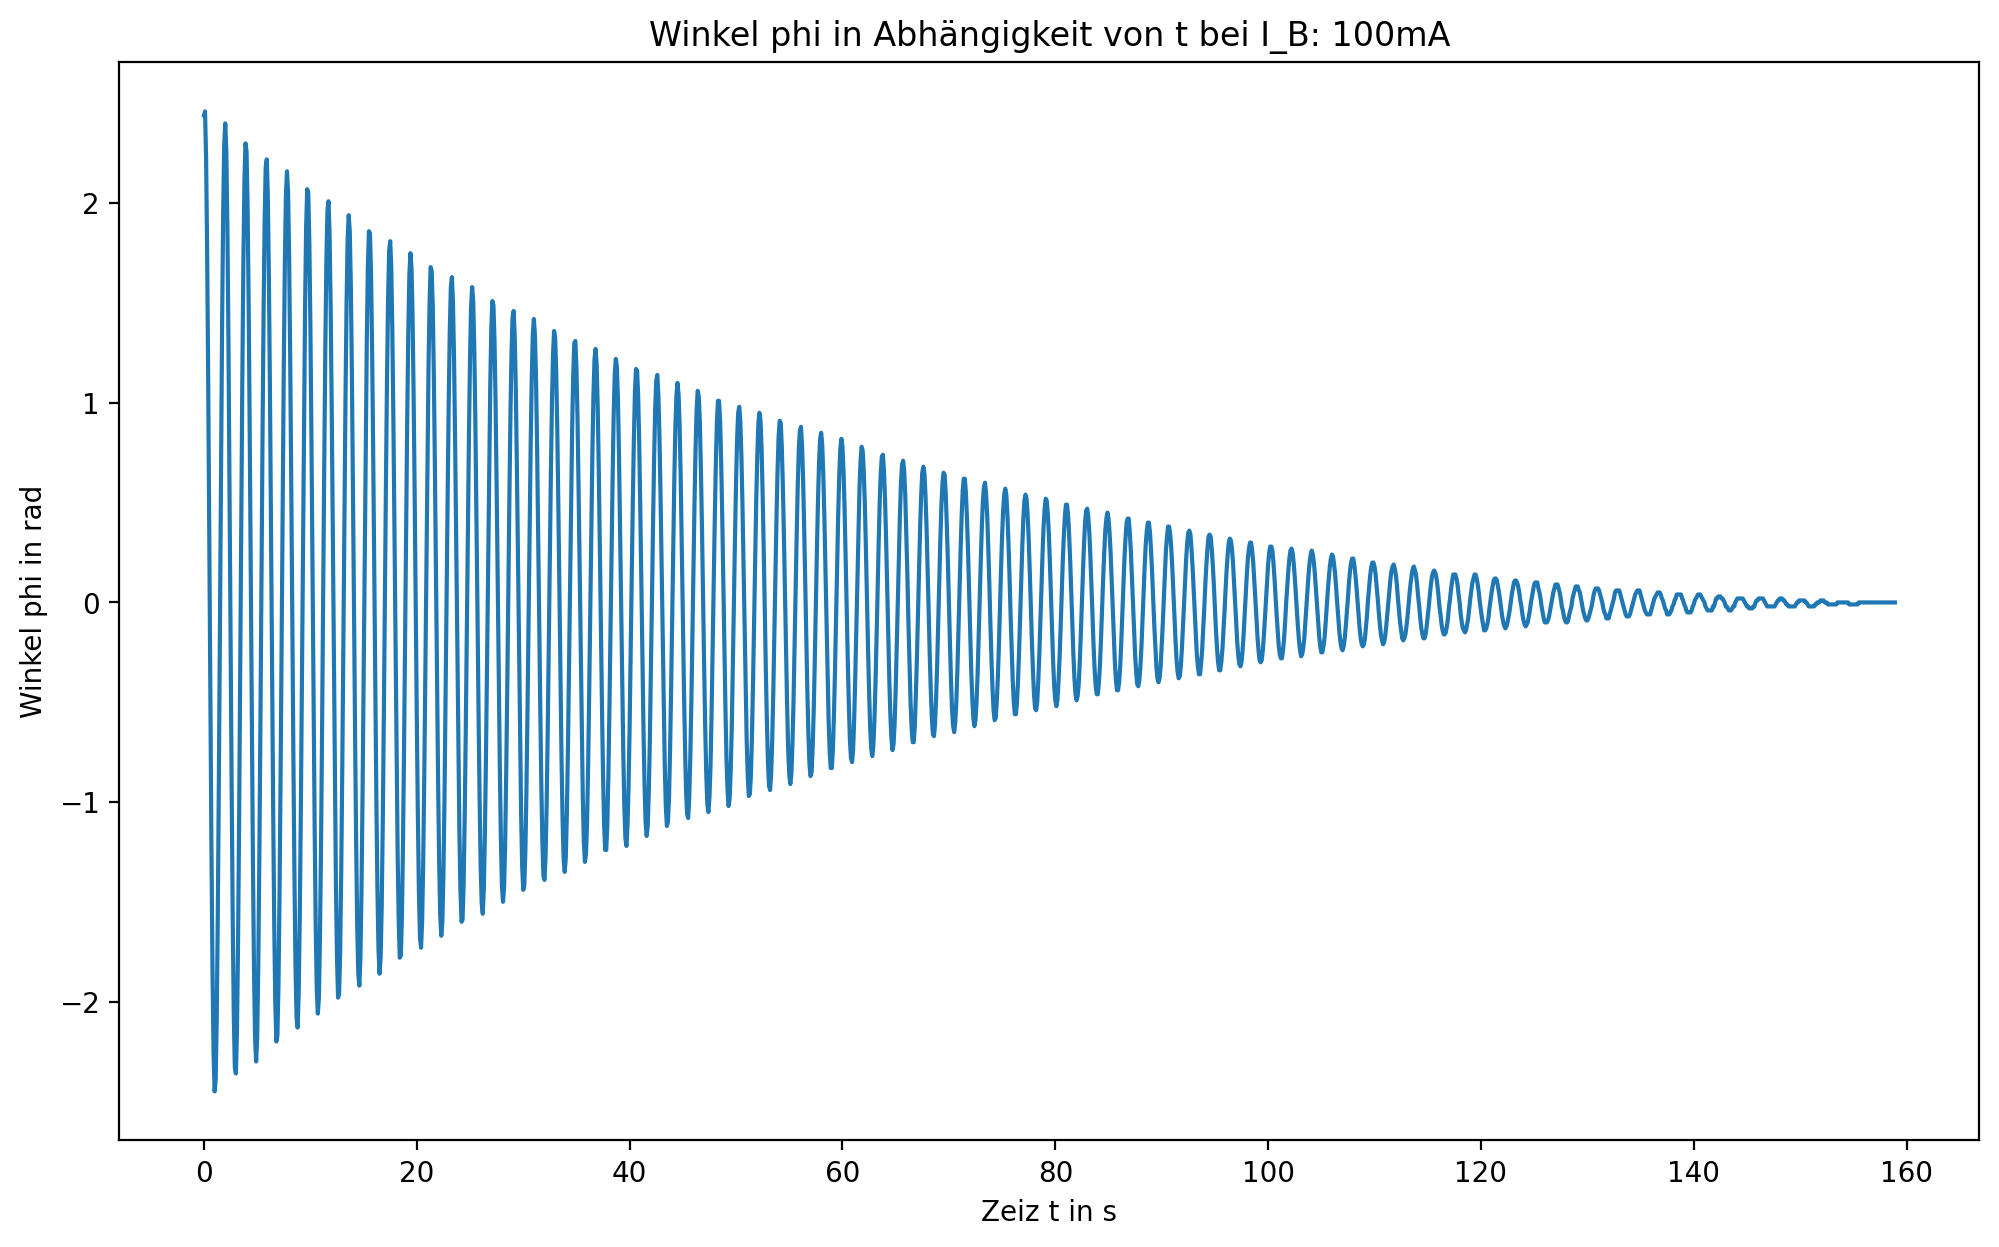

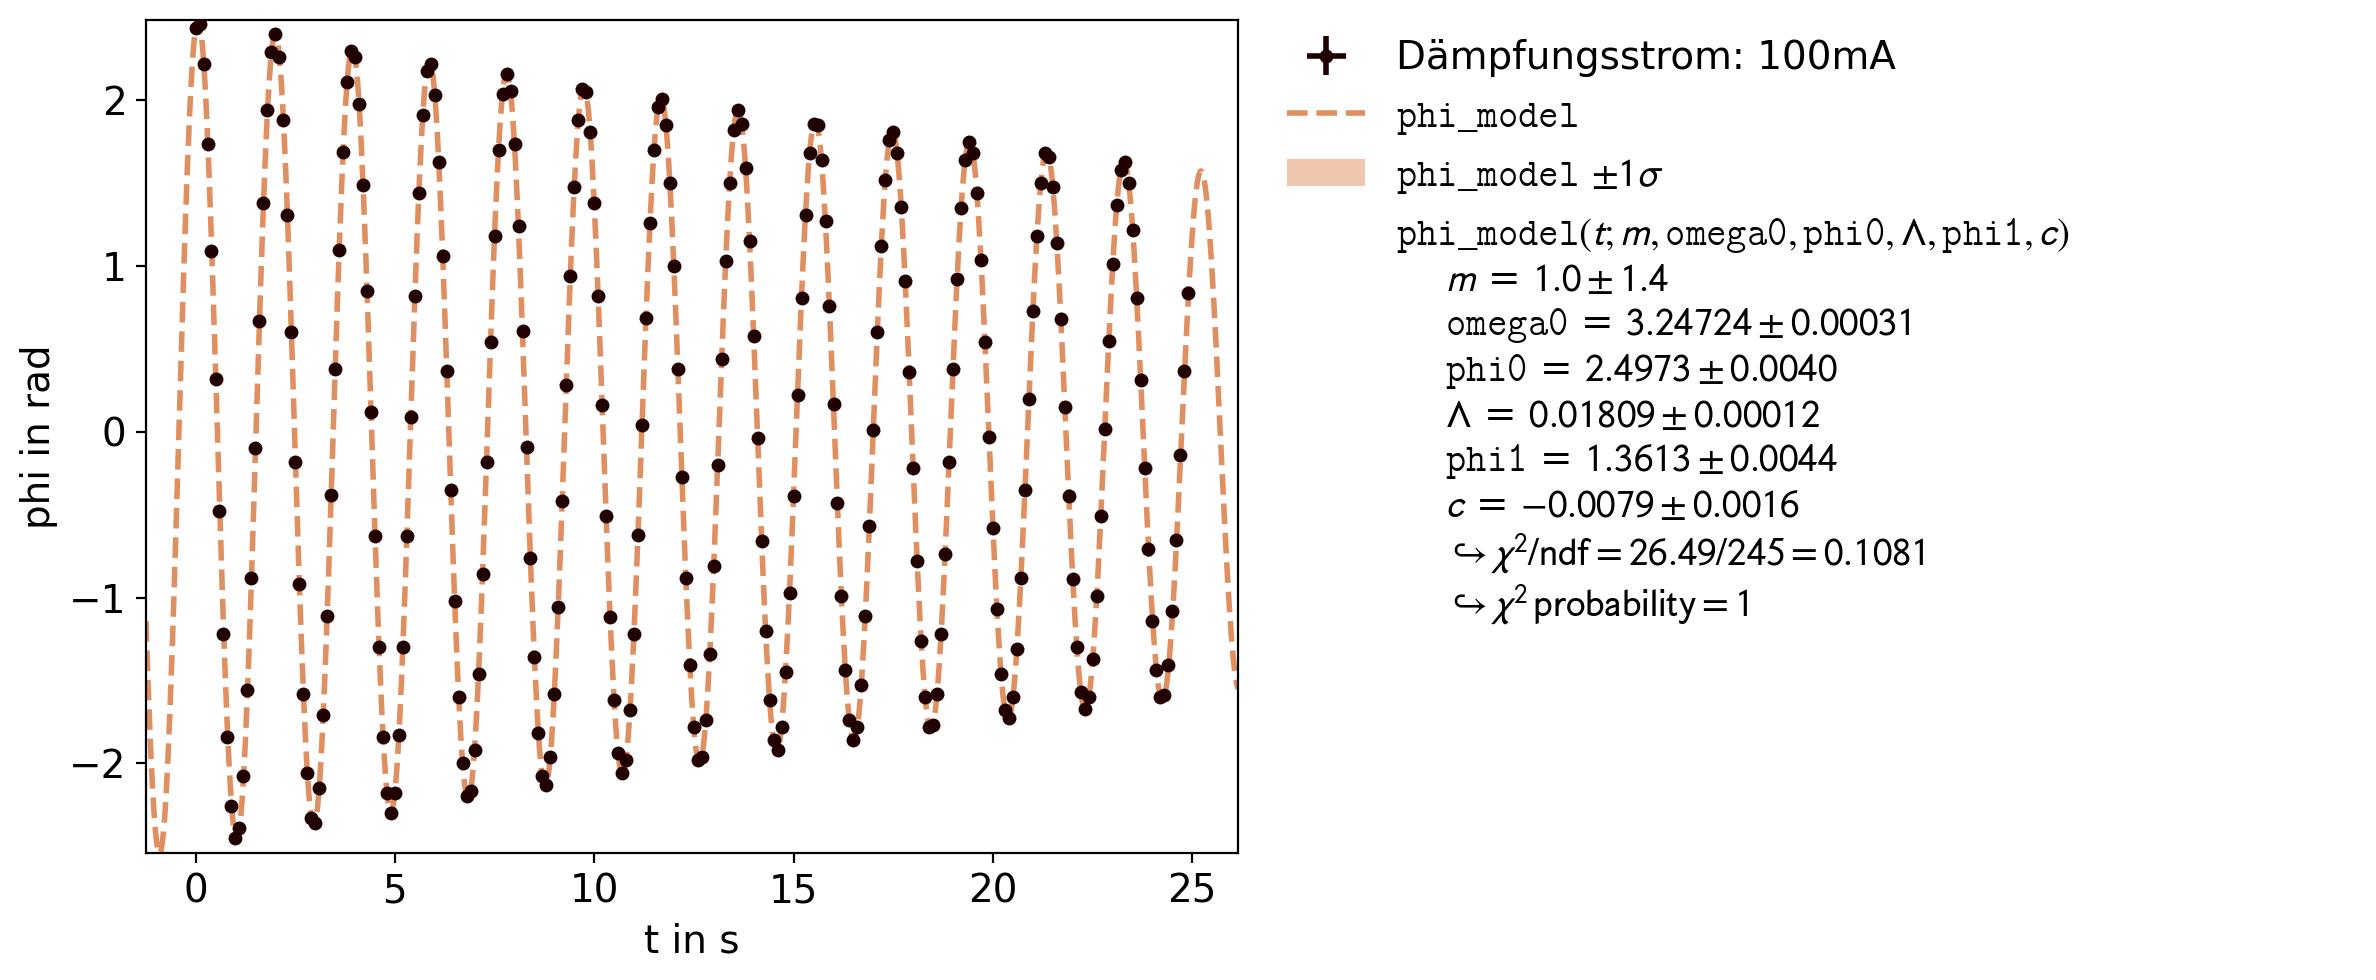

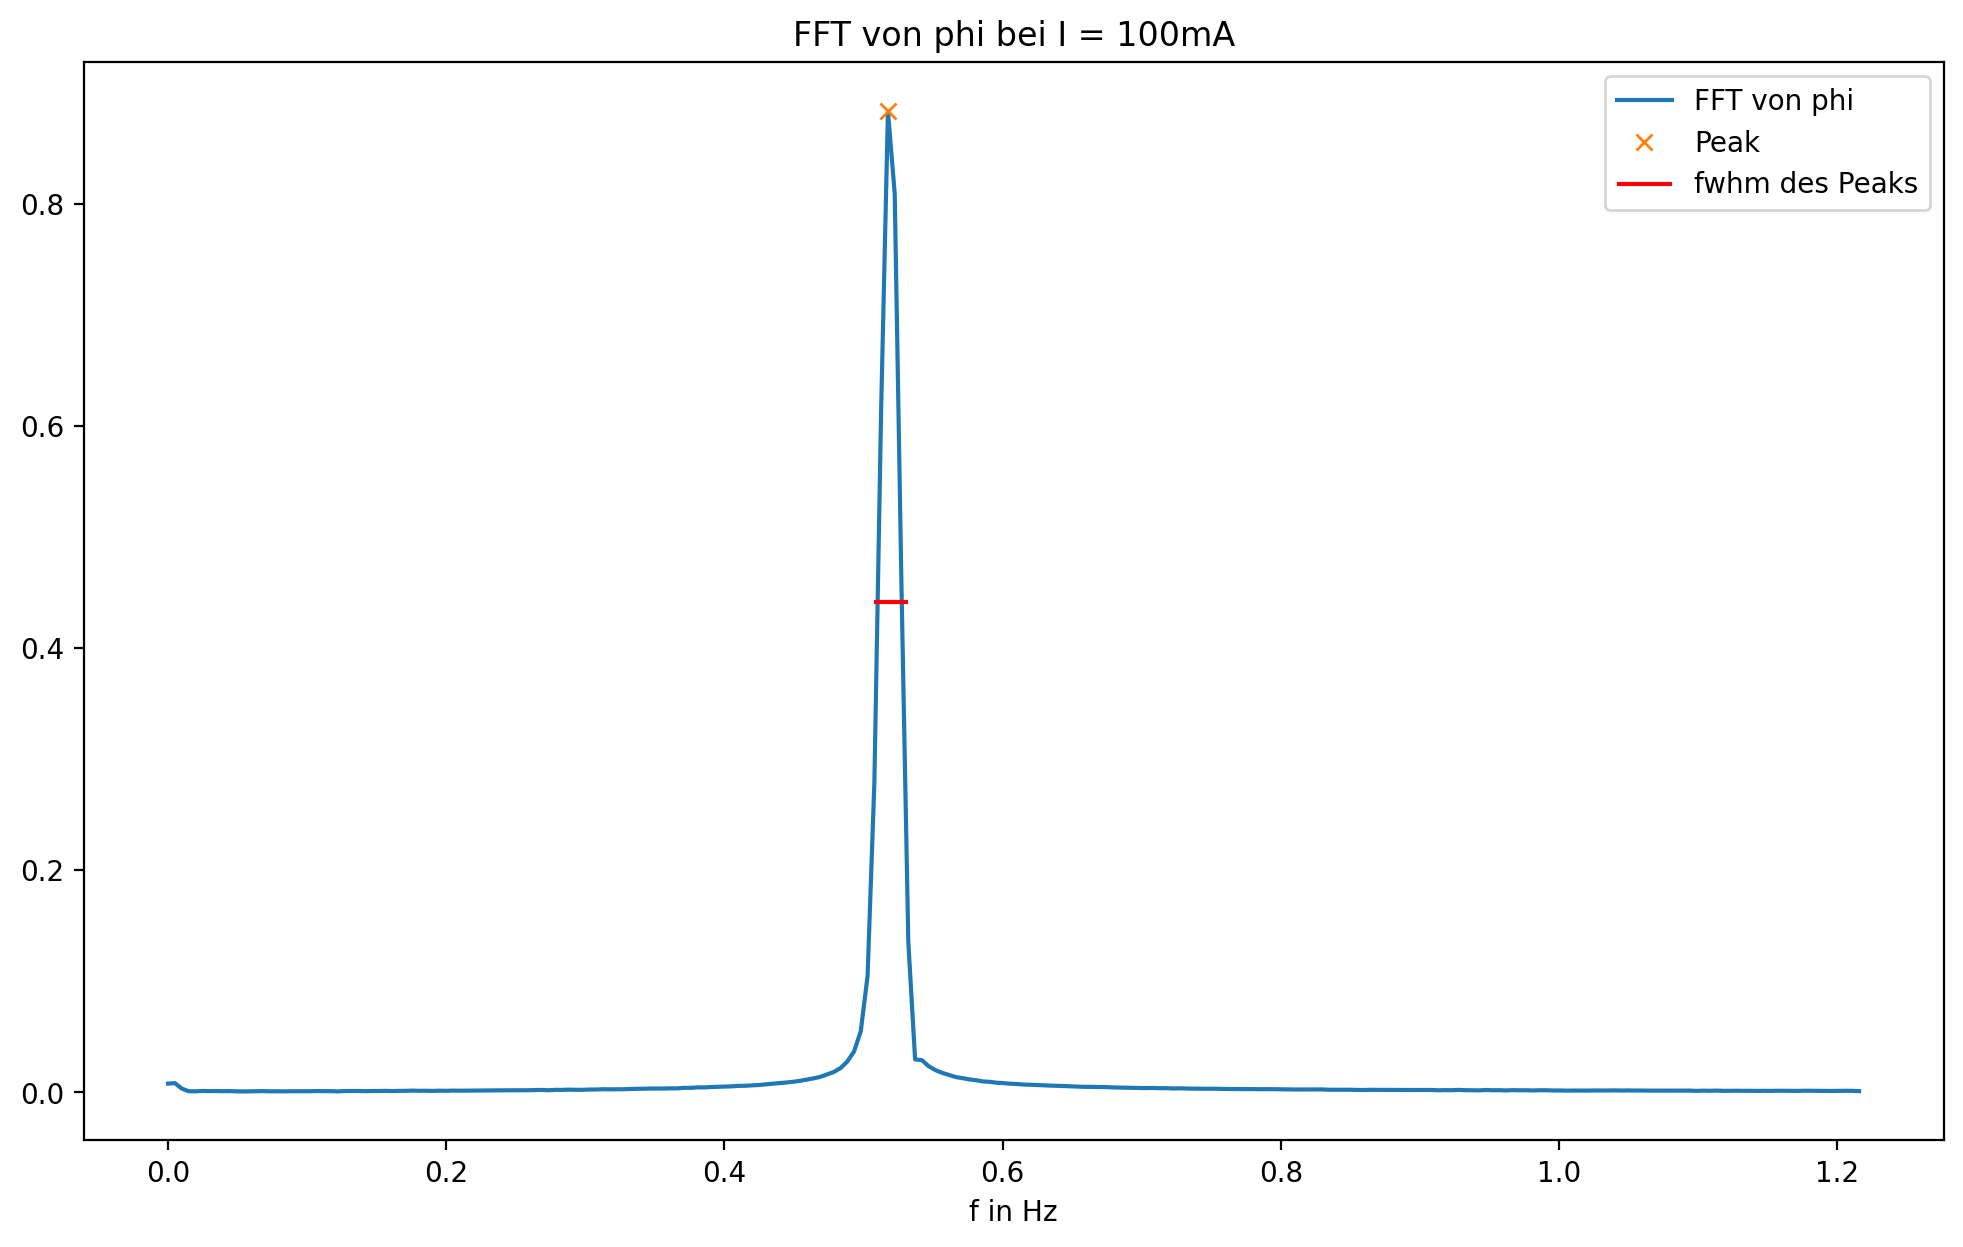

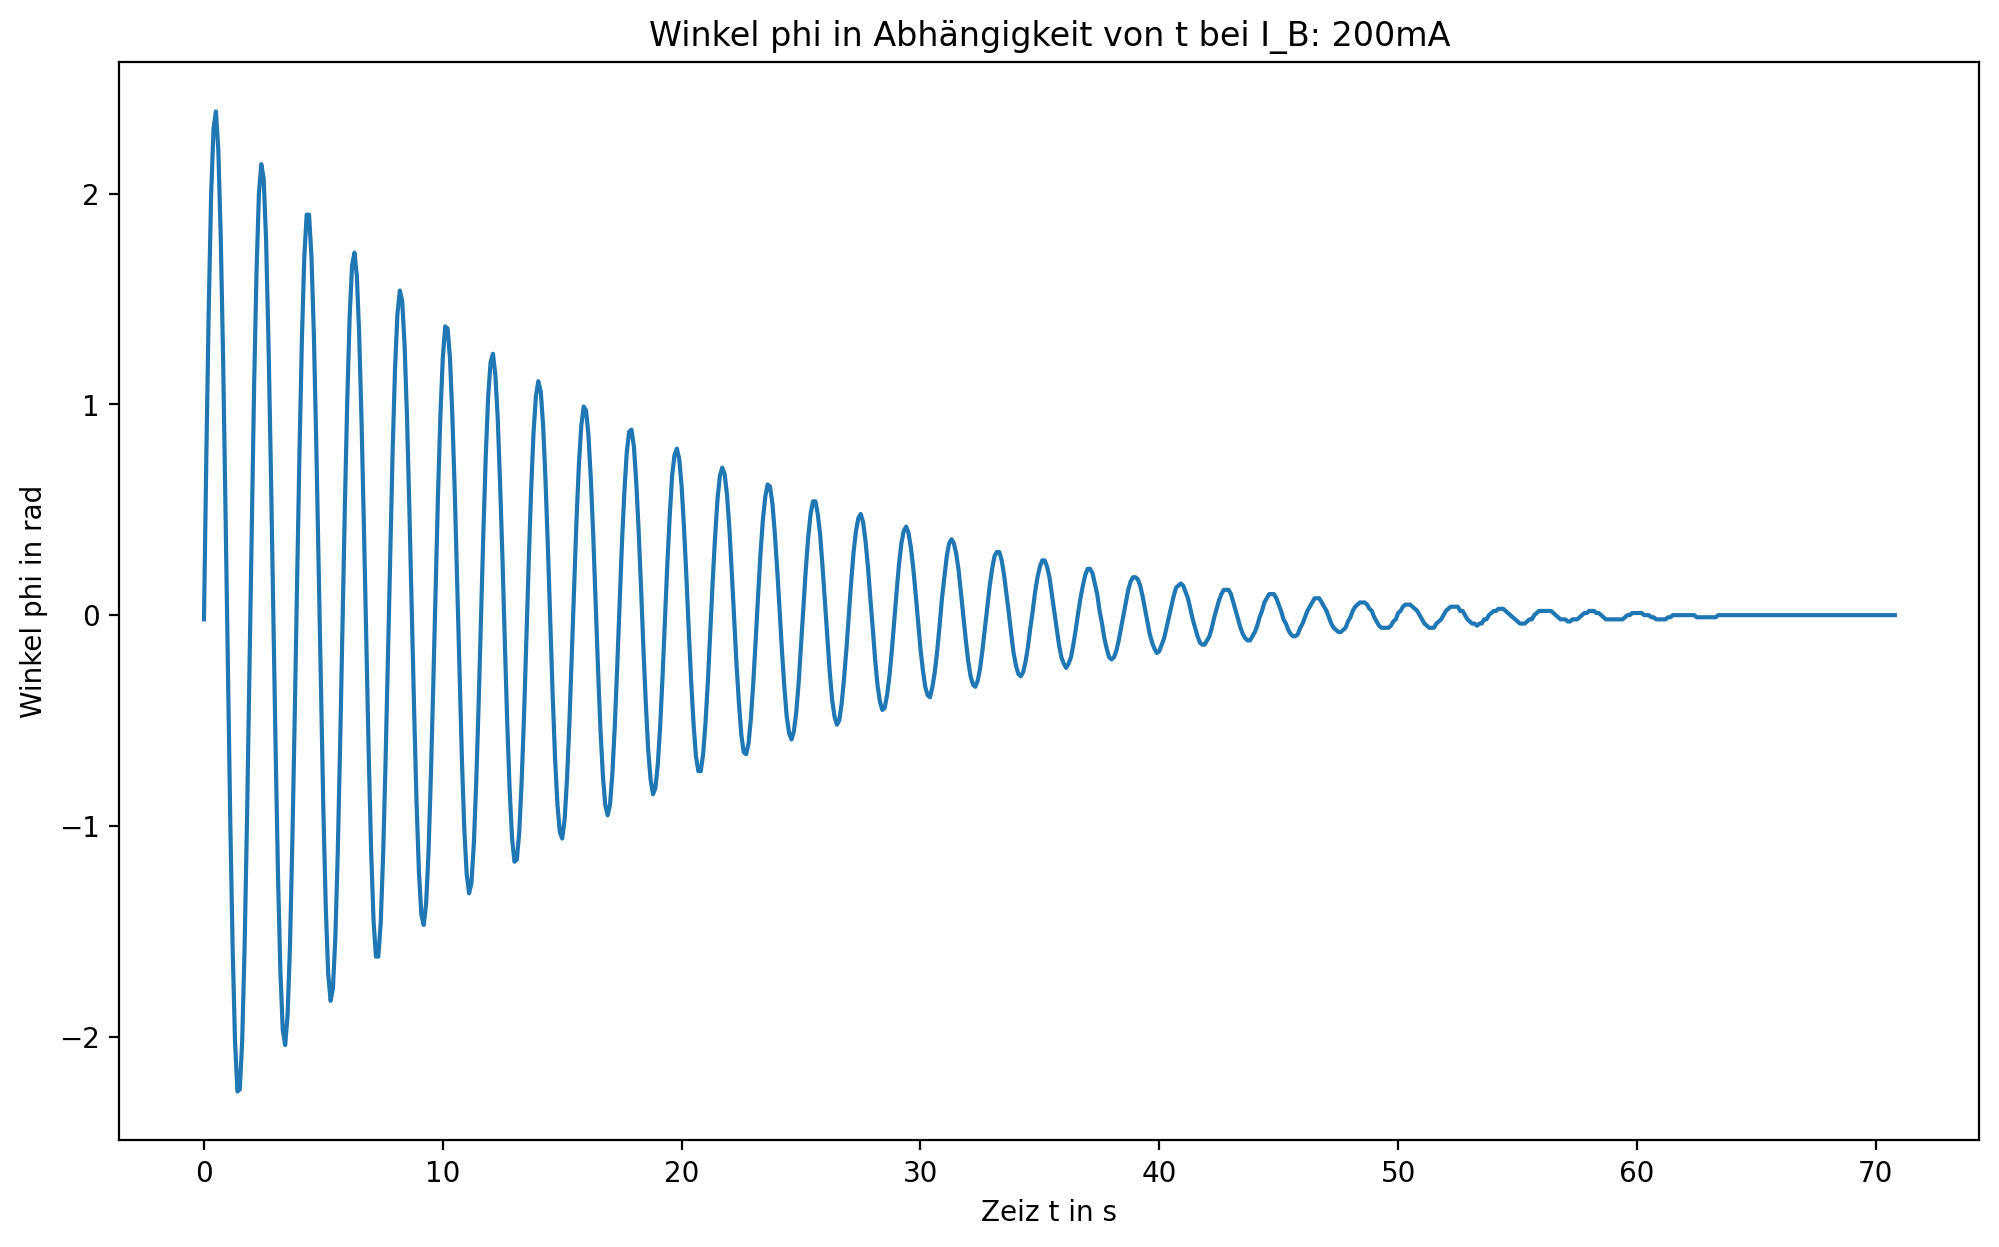

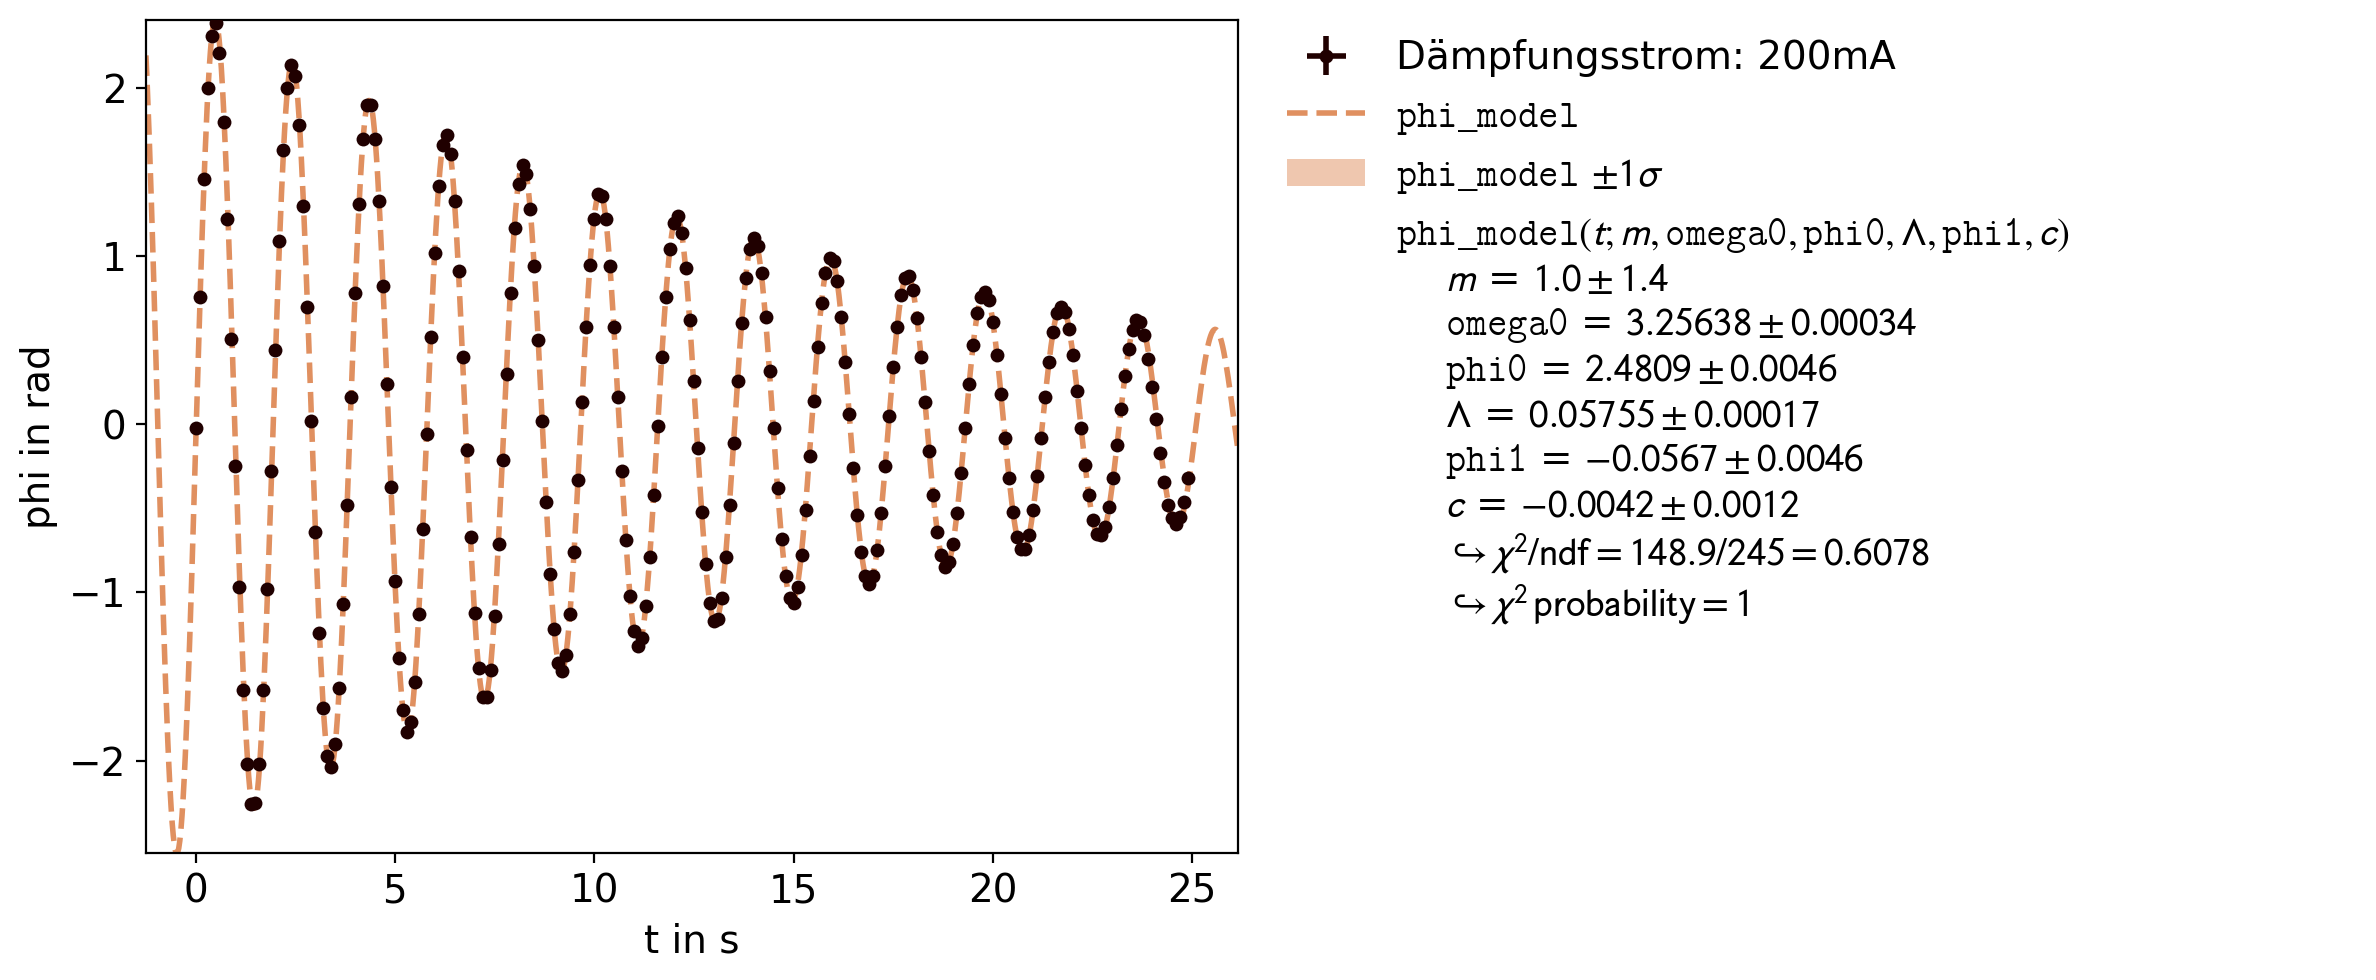

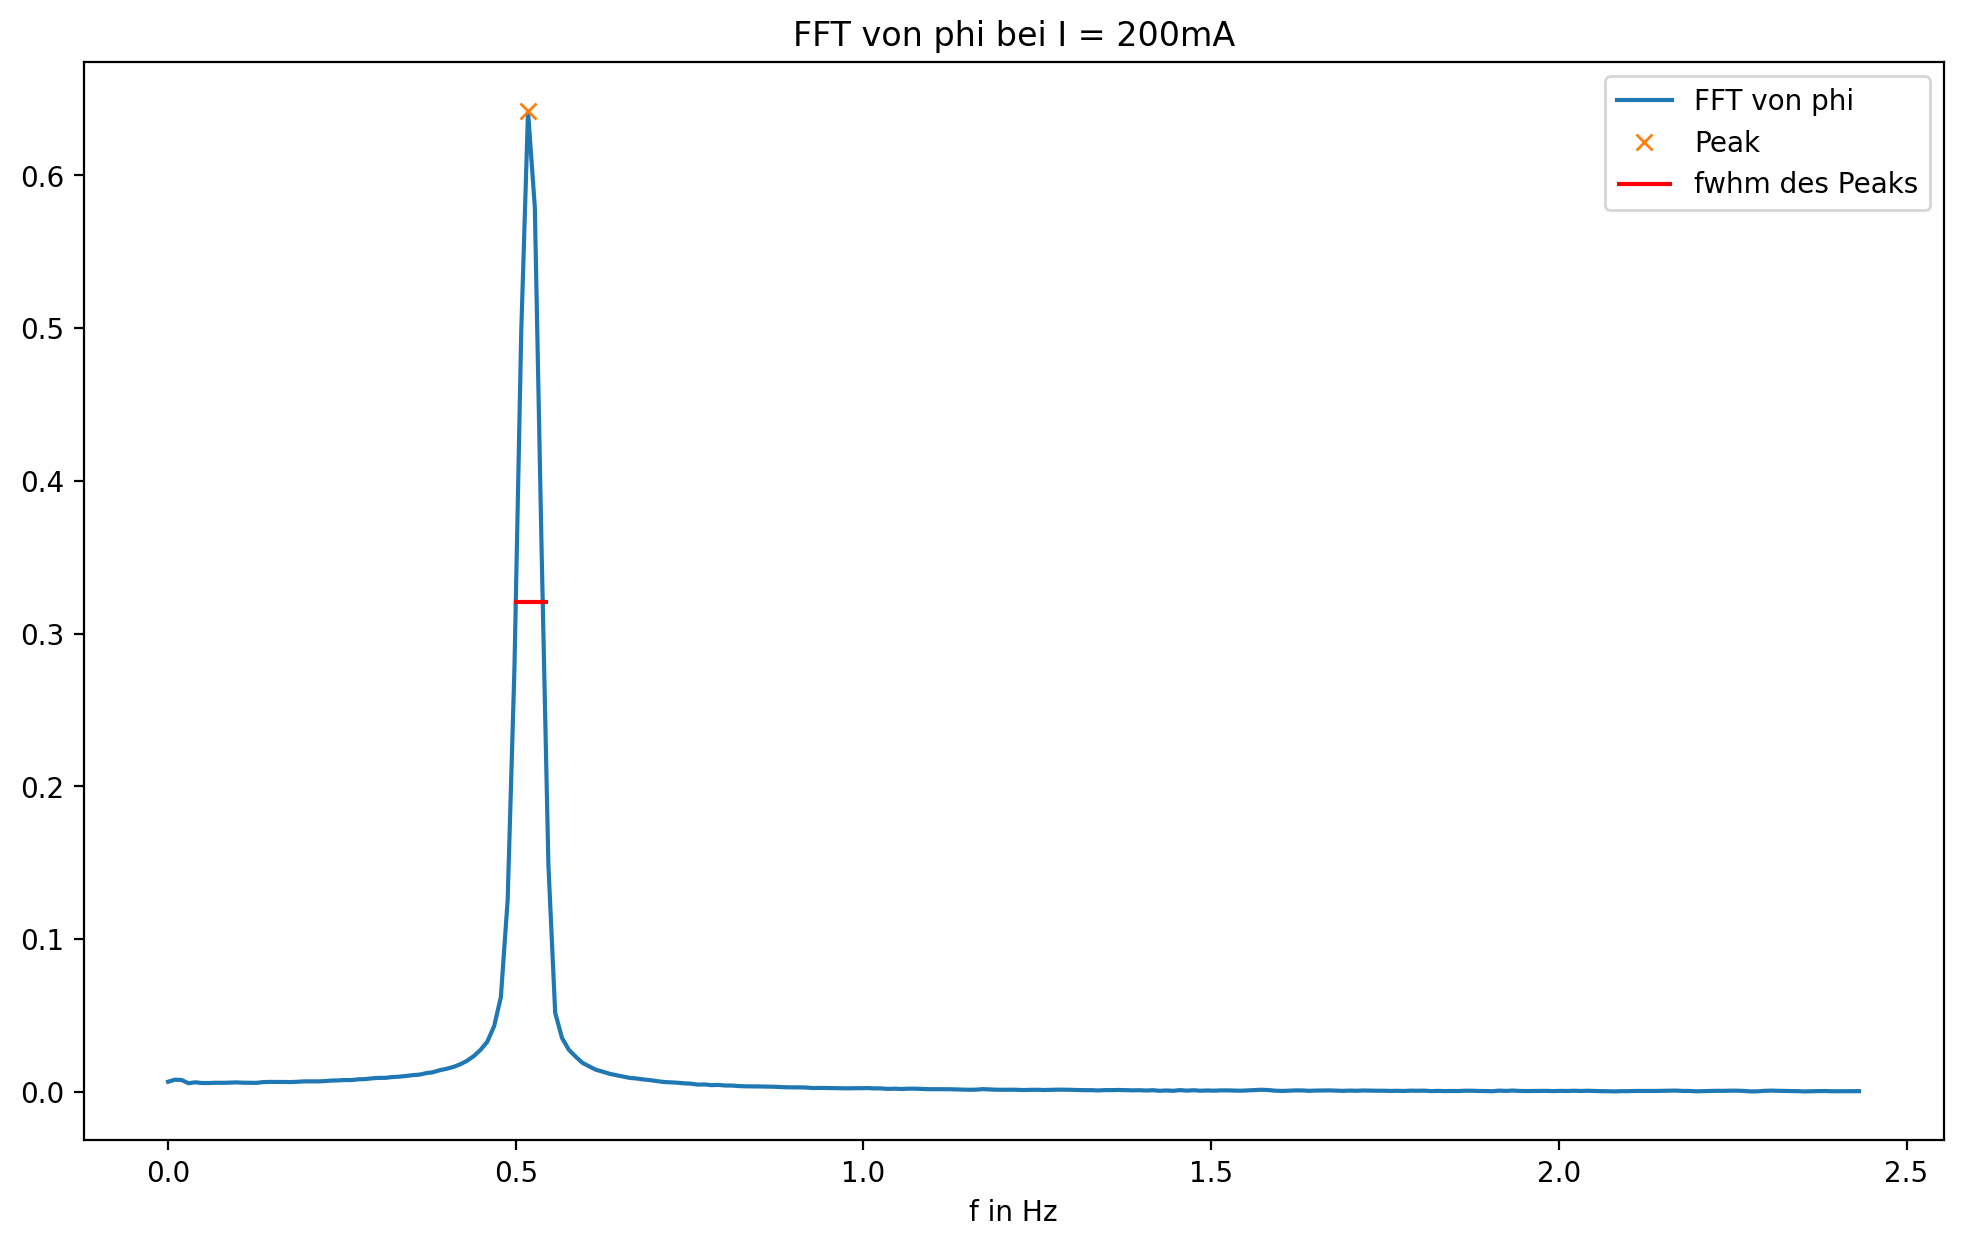

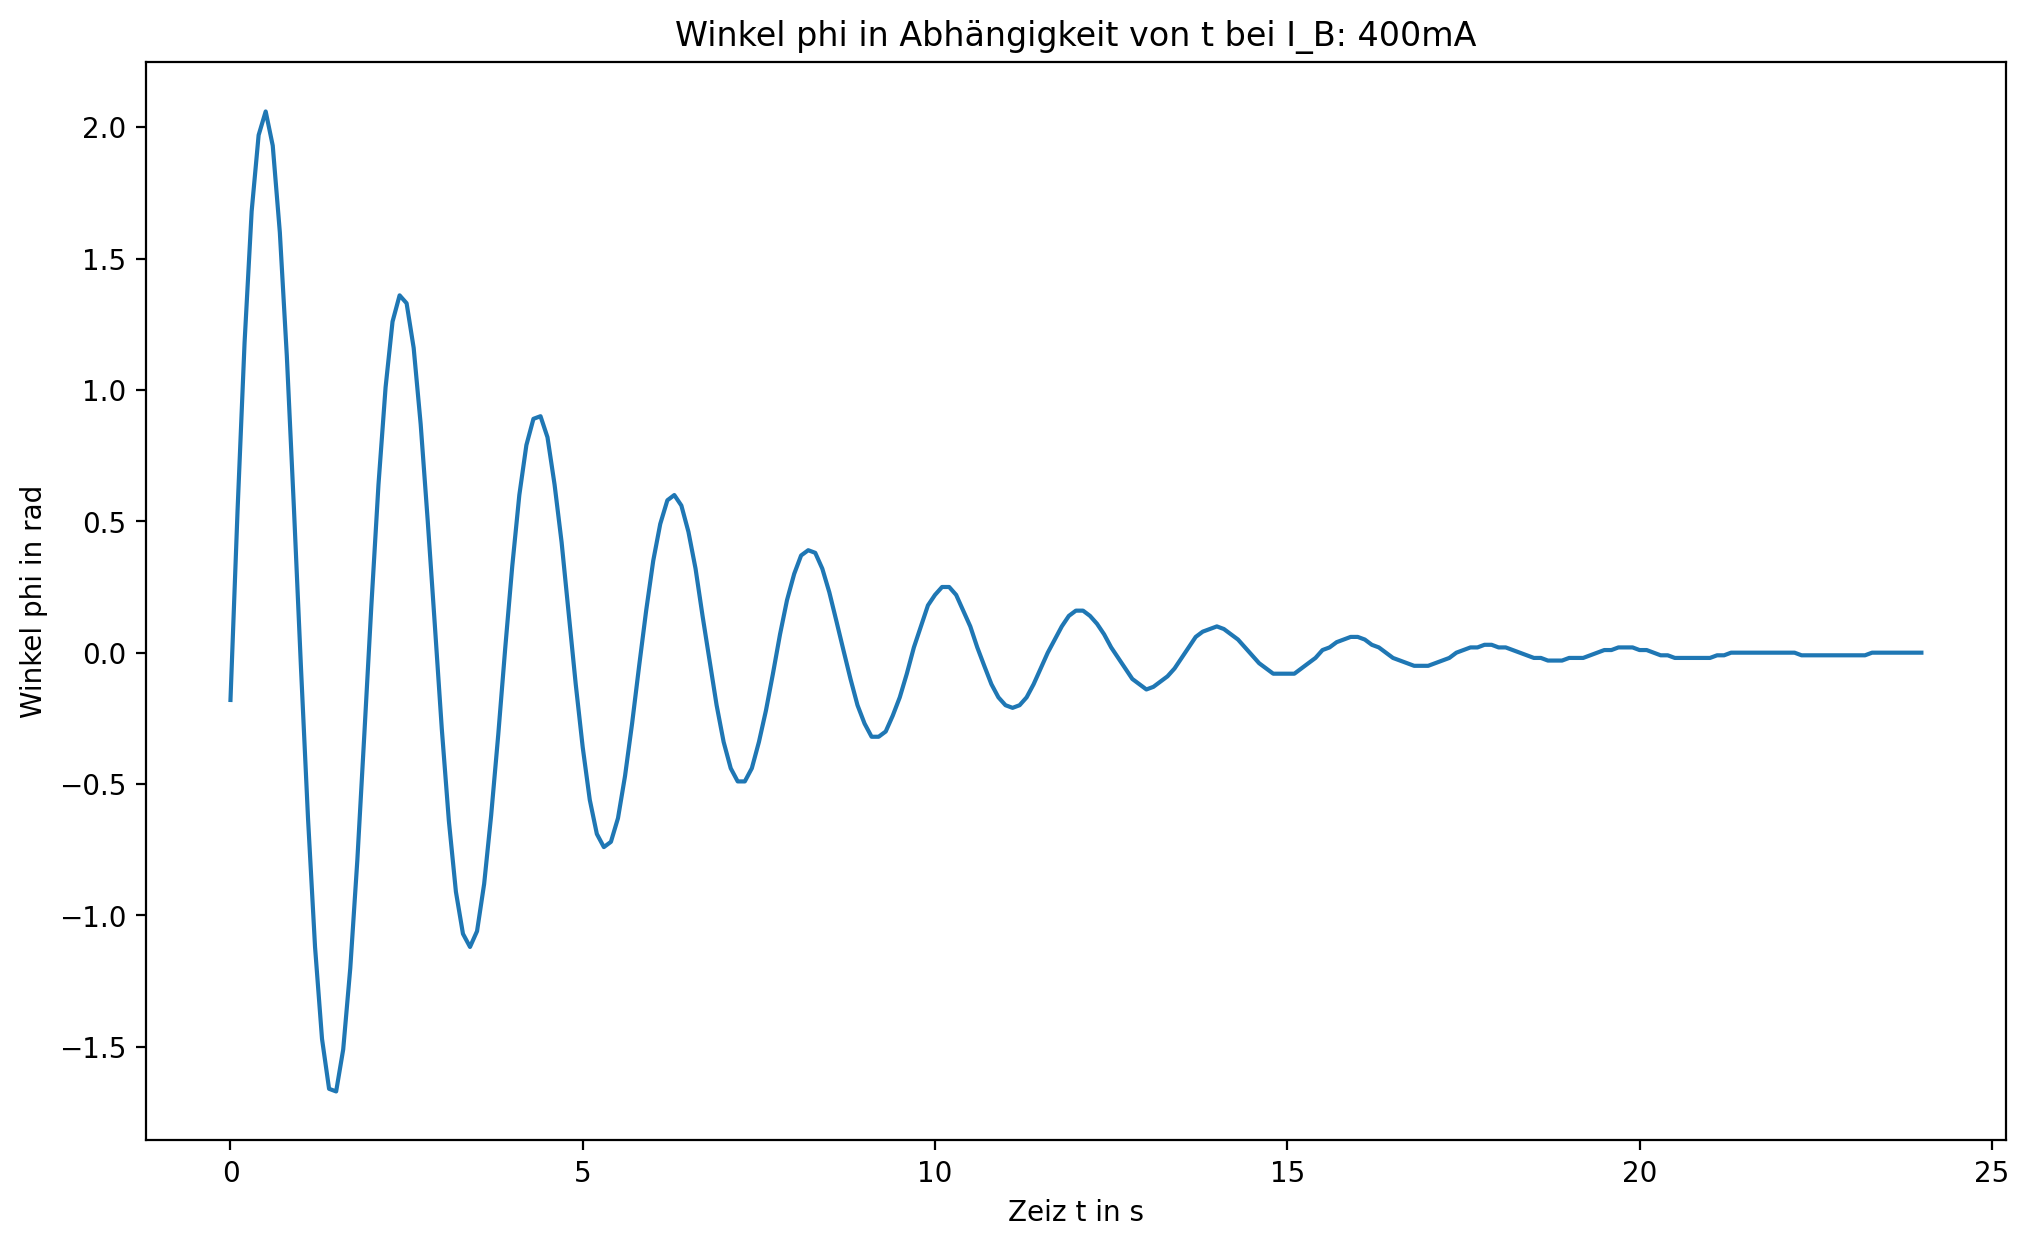

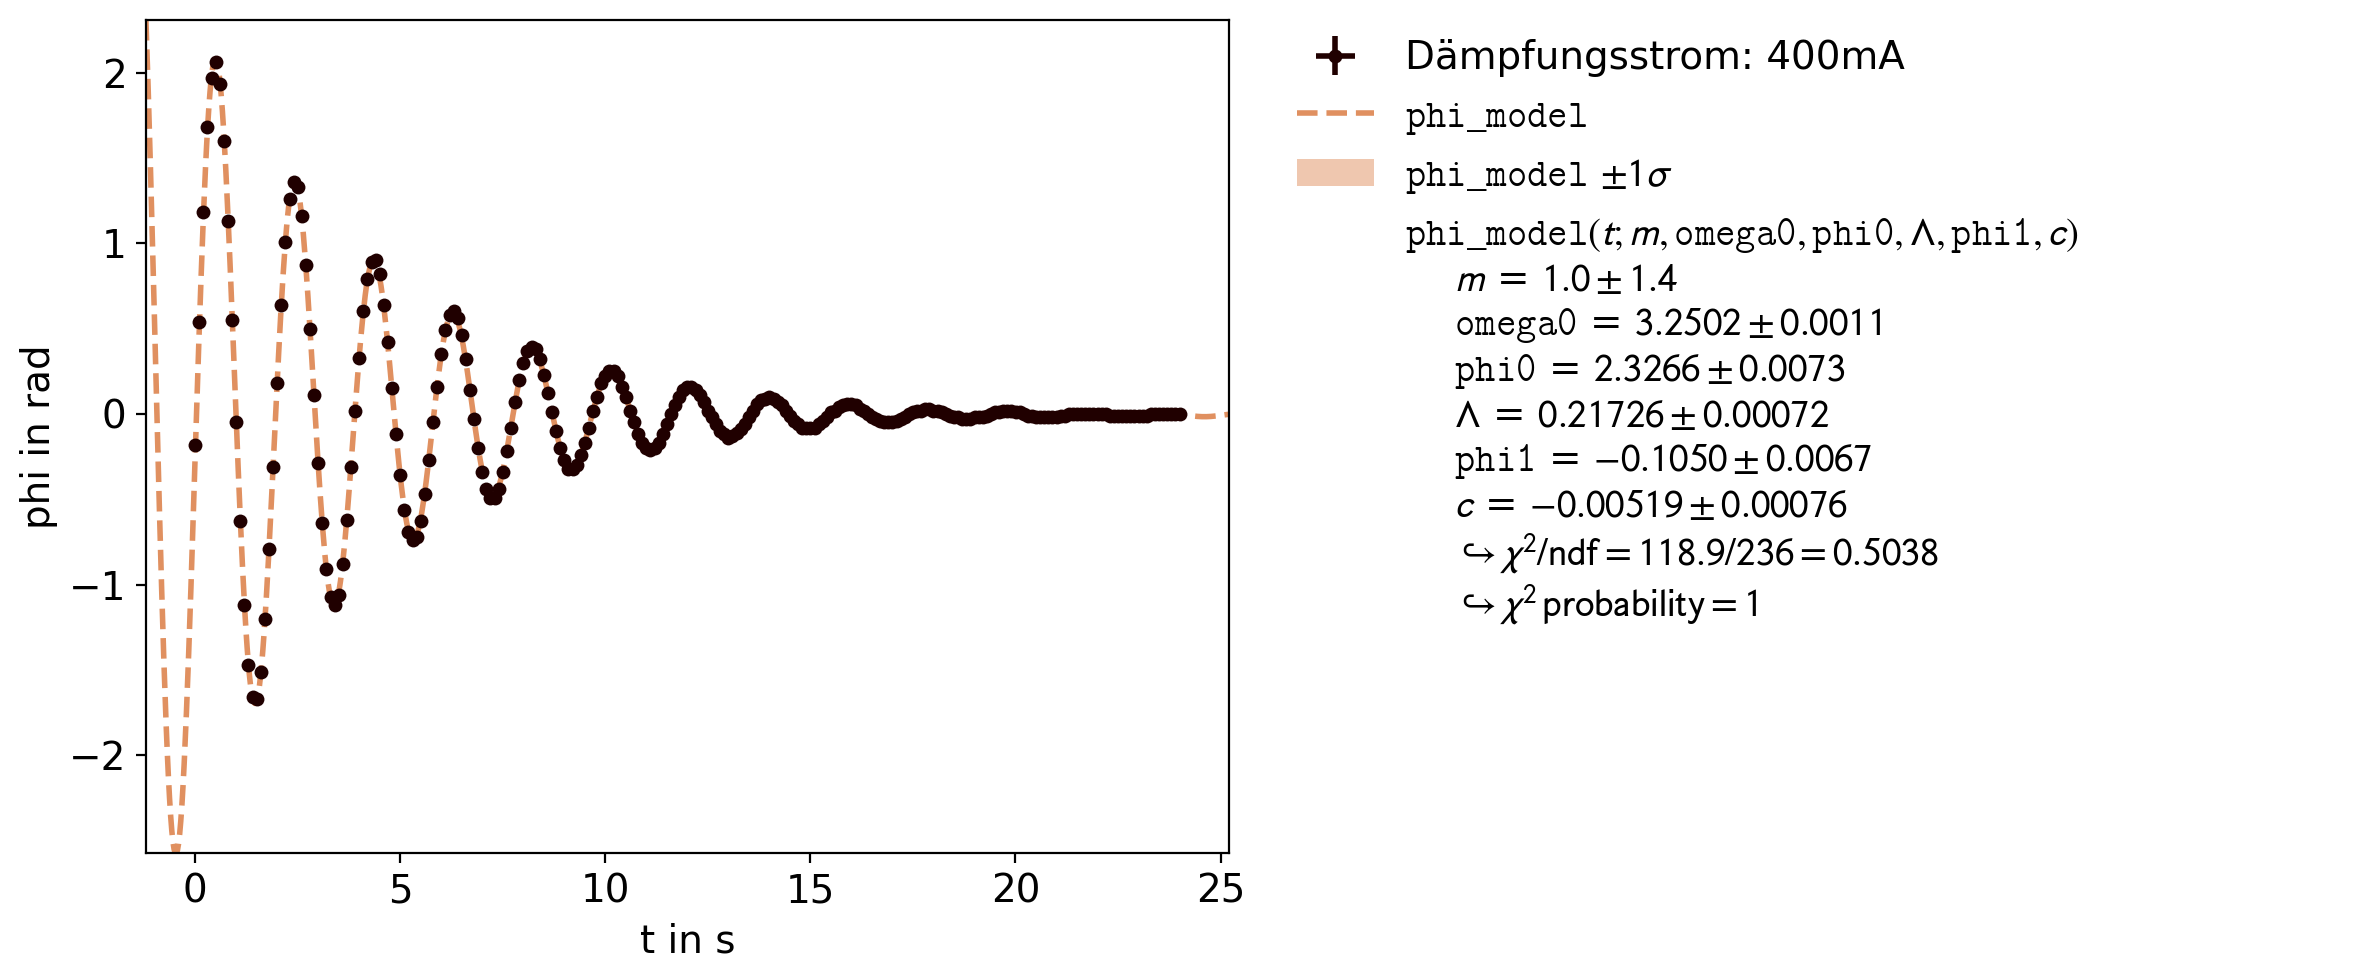

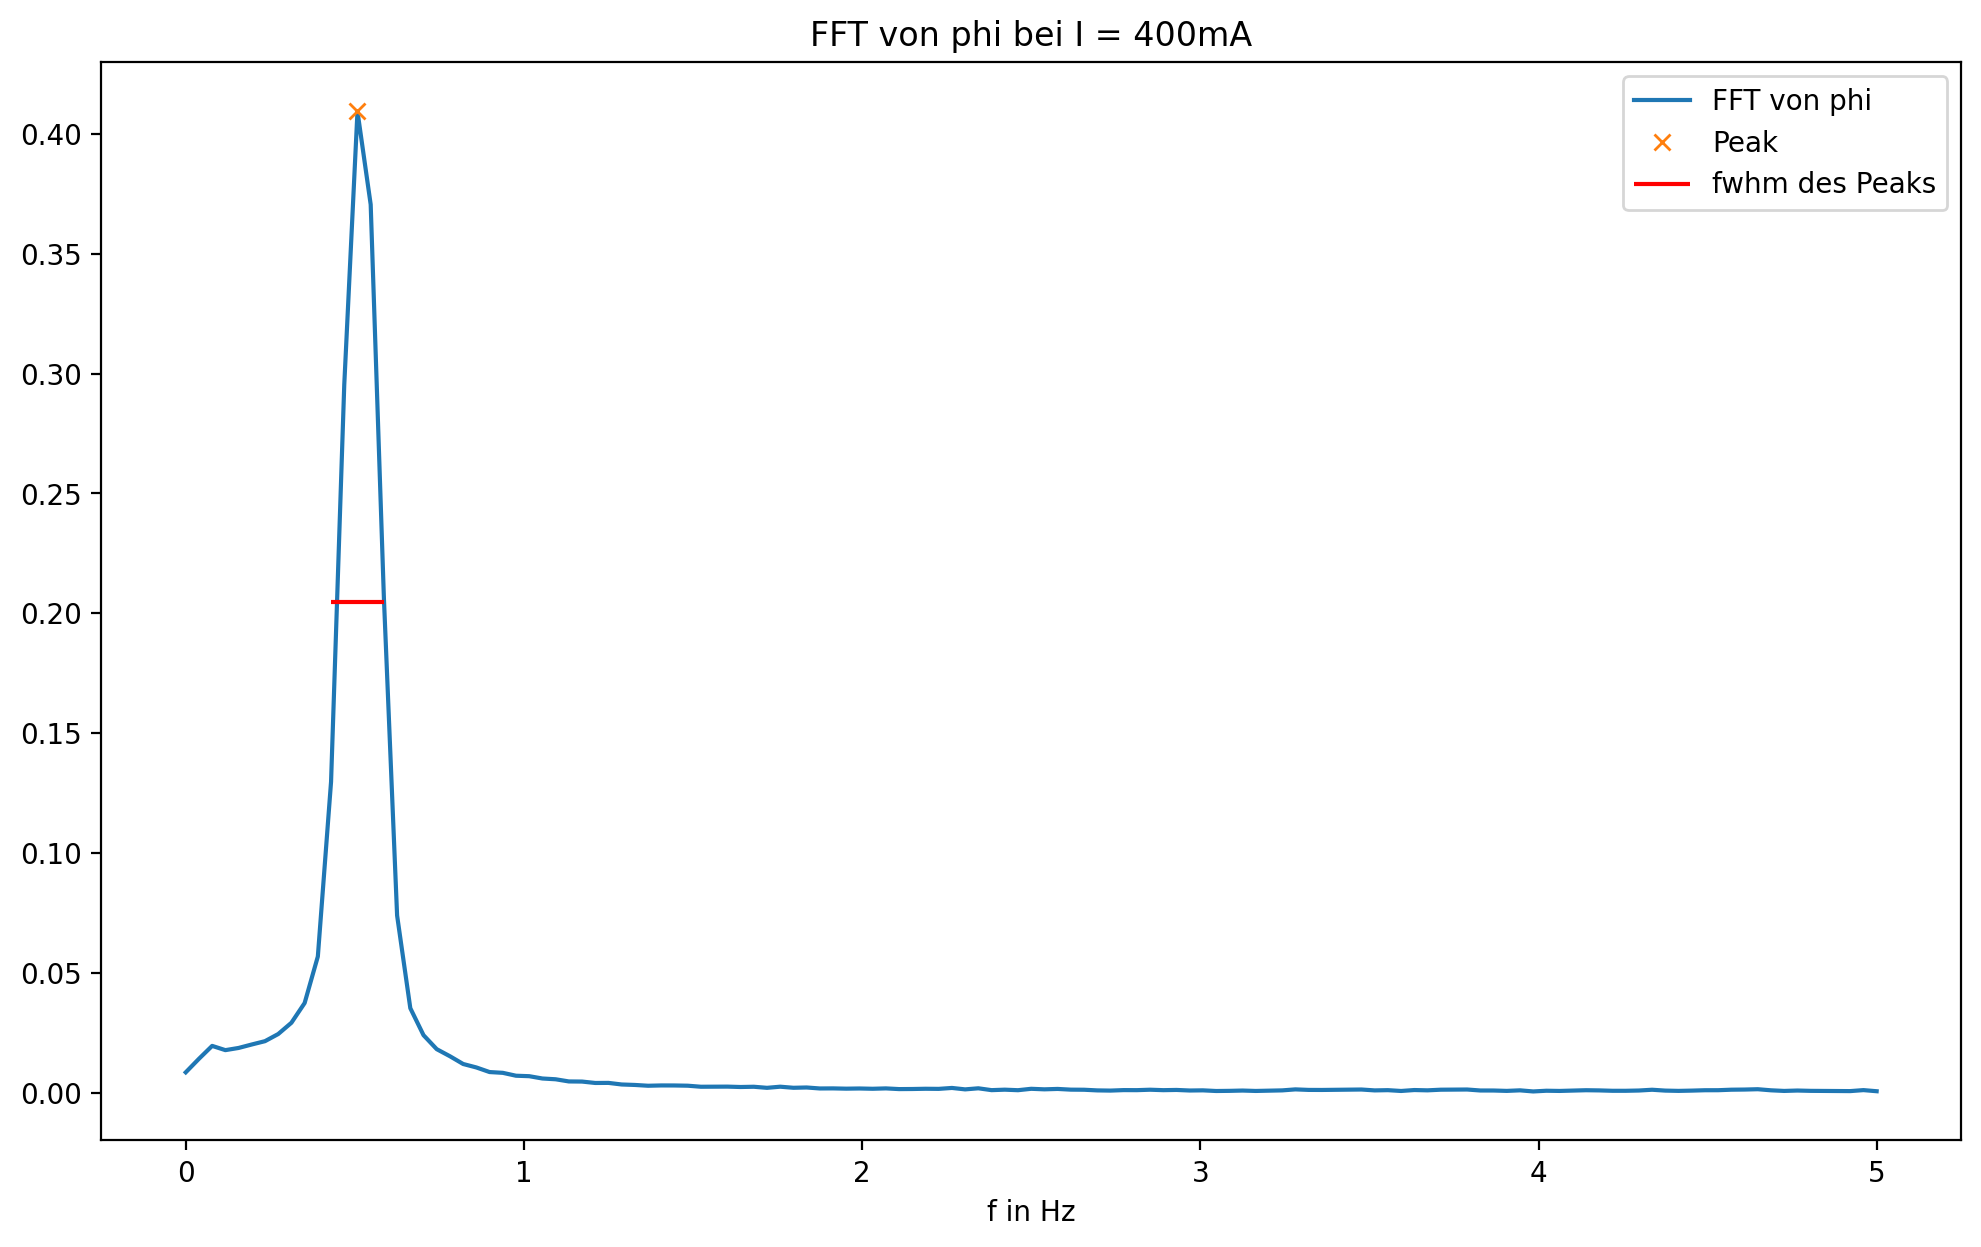

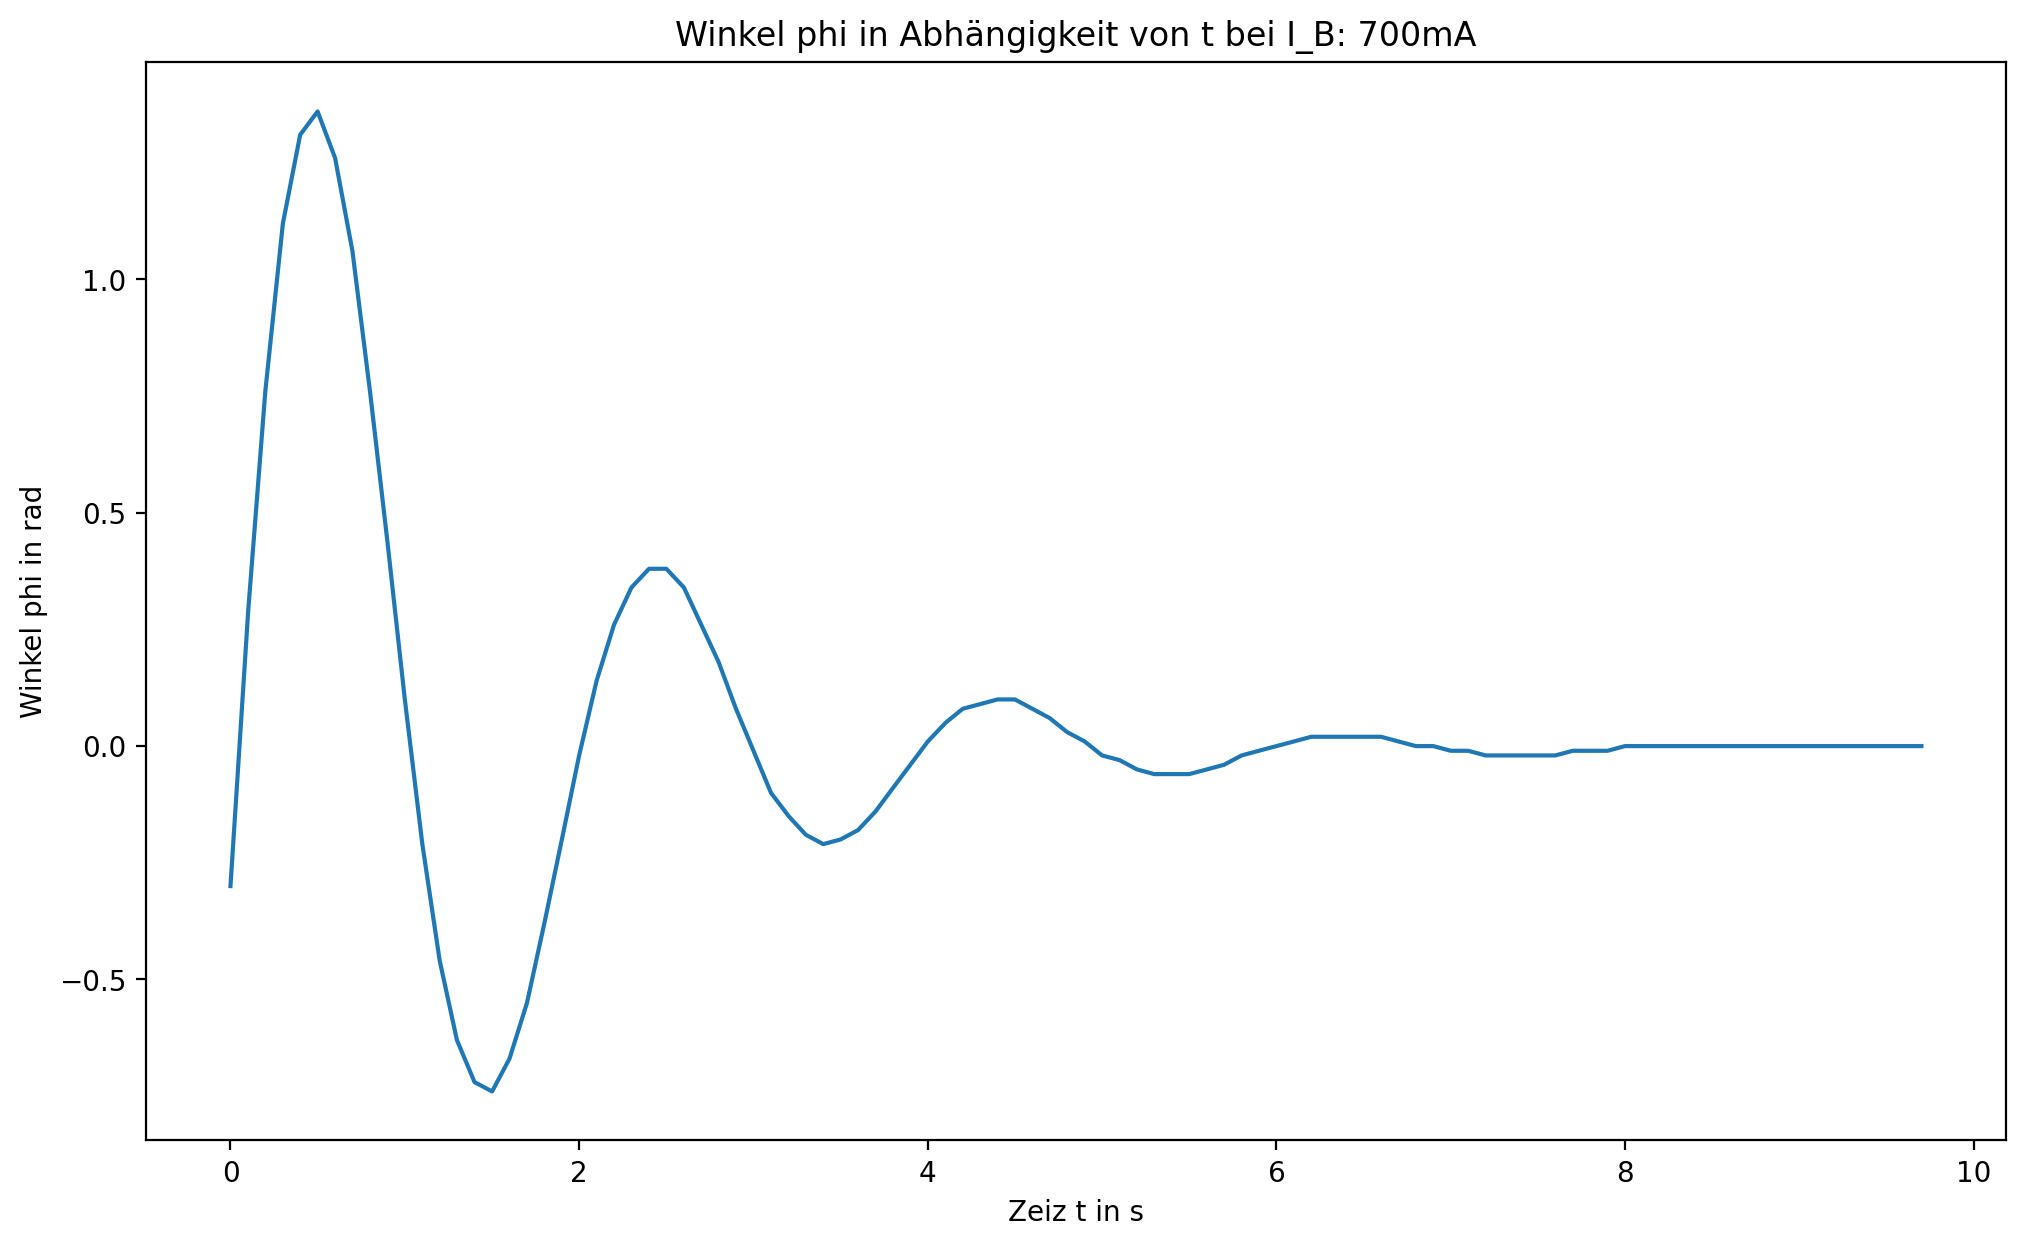

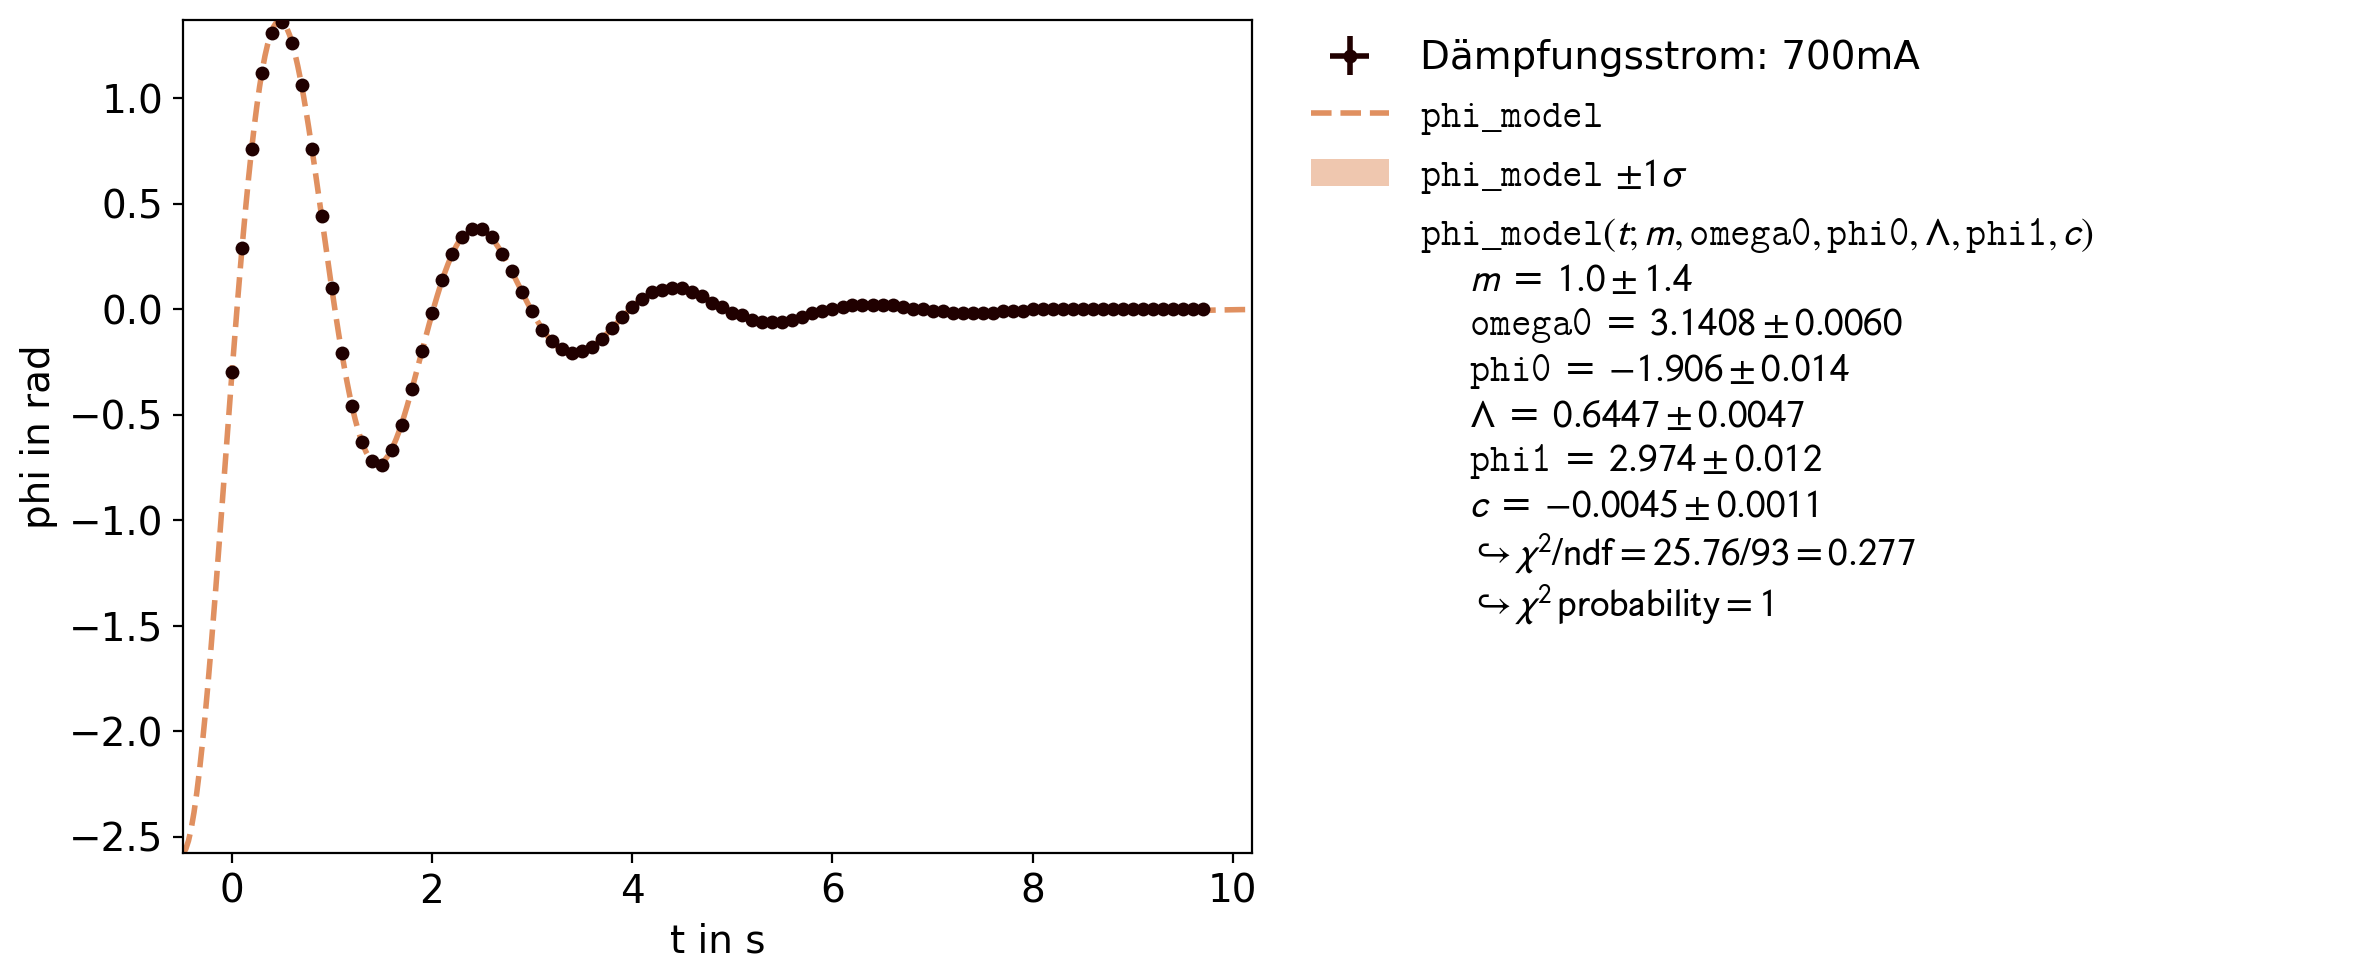

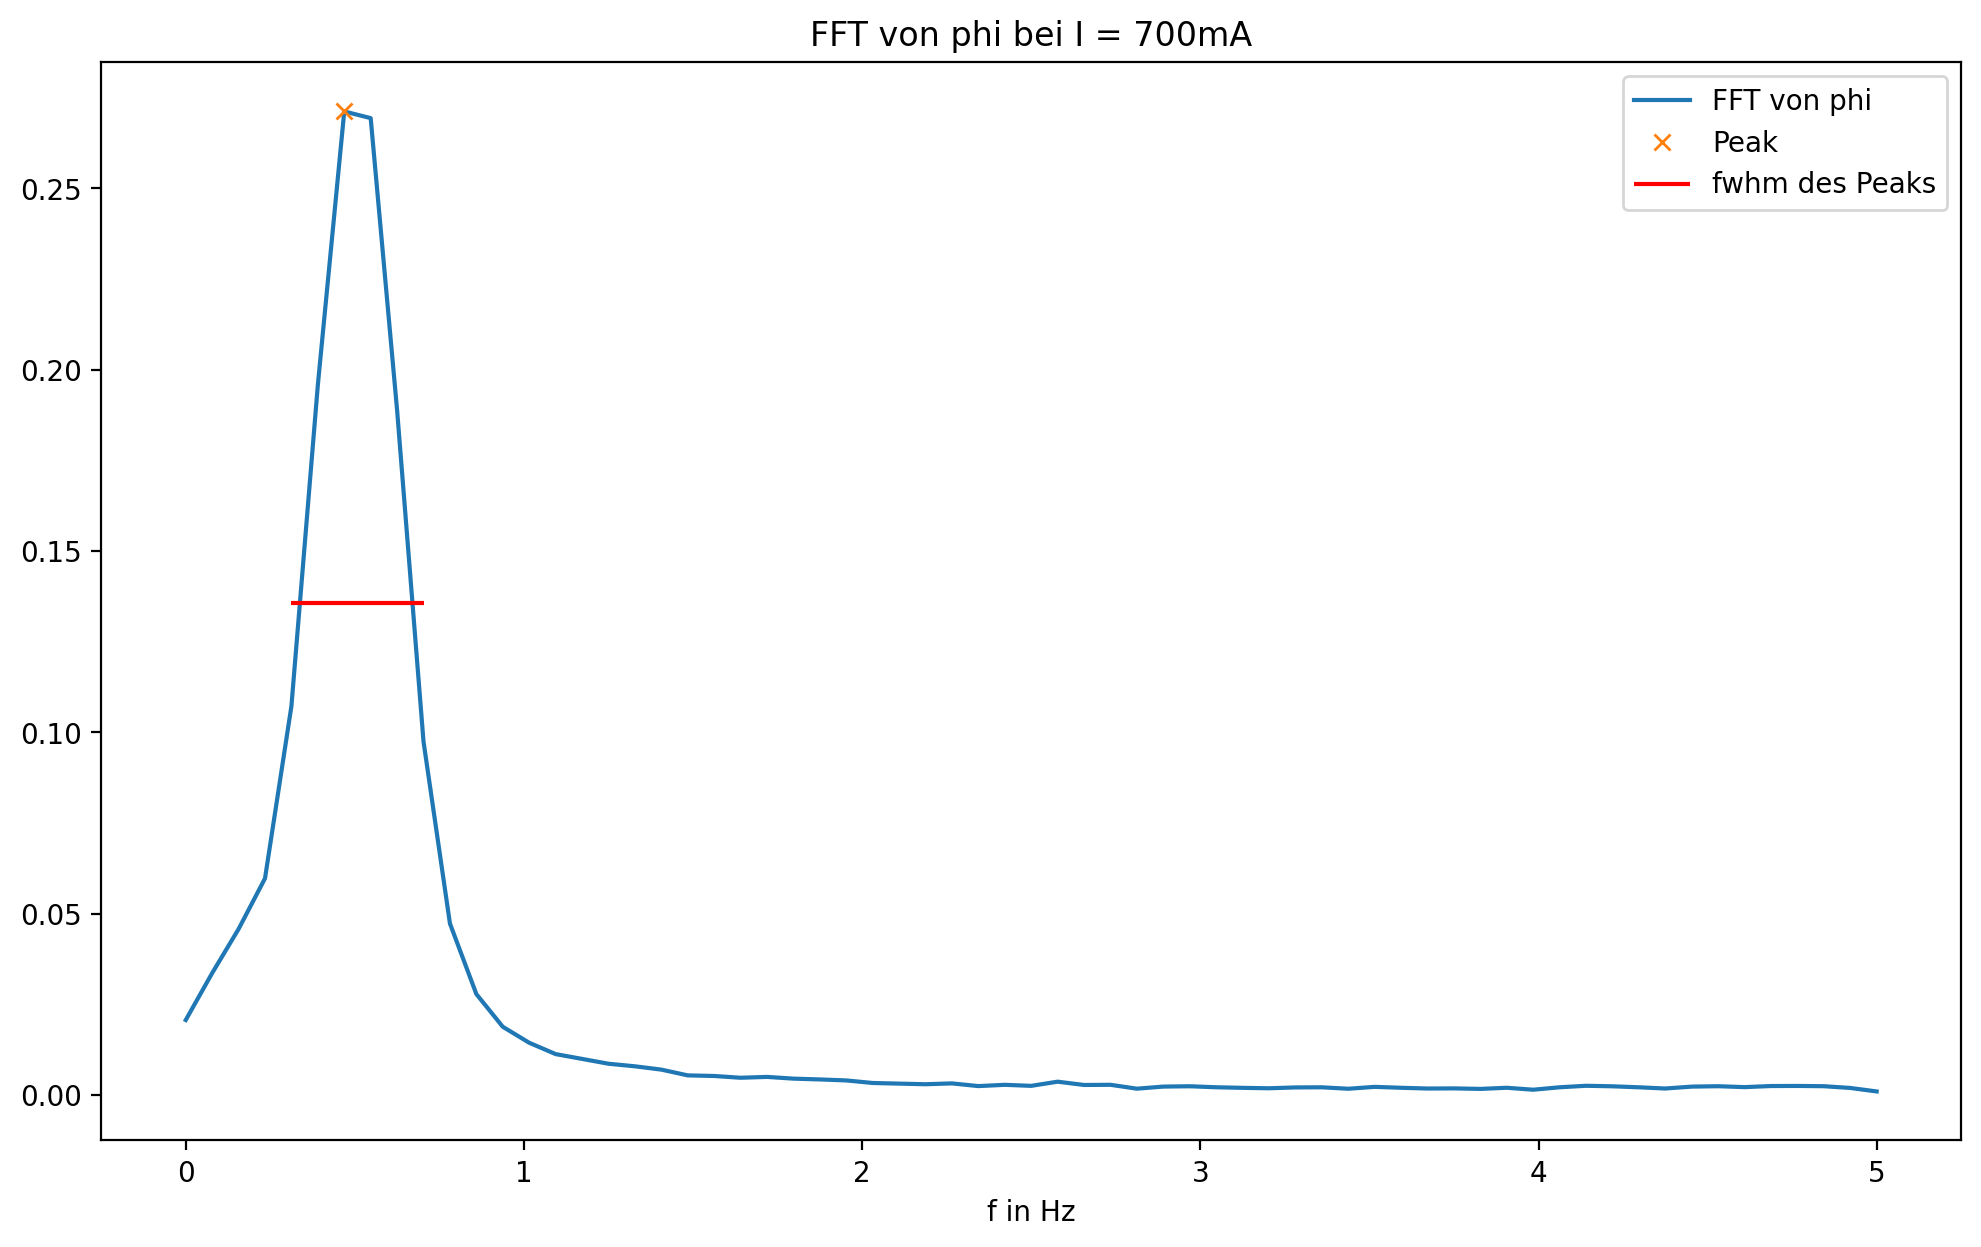

In [46]:
names = ["1.3_100mA.csv", "1.3_200mA.csv", "1.3_400mA.csv", "1.3_700mA.csv"]
Lambdas = []
d_Lambdas = []
k = []
k_err = []
omegas = []
d_omegas = []
for i in names: 
    N = 250 # number of values to be fitted / plotted
    def peak_err(y_ax, x_ax, ind_1, ind_2, peak):
        if y_ax[ind_1] >= y_ax[ind_2]:
            return abs(x_ax[ind_1] - x_ax[peak])
        else:
            return abs(x_ax[ind_2] - x_ax[peak])
        
    df = pd.read_table(i, delimiter=";", decimal=",", usecols=(0,1,2,3,4,5))
    t = df["Zeit t / s"].to_numpy()
    phi = df["Weg &b_A1 / rad"].to_numpy()
    fft = df["FFT fft / rad"].to_numpy()
    f = df["Frequenz f / Hz"].to_numpy()
    plt.plot(t, phi)
    plt.xlabel('Zeiz t in s')
    plt.ylabel("Winkel phi in rad")
    plt.title("Winkel phi in Abhängigkeit von t bei I_B: " + i[4:-4])
    plt.show()
    fit = kafe2.XYFit(xy_data=[t[:N], phi[:N]], model_function=phi_model) 
    fit.add_error(axis='y', err_val=phi_error)
    fit.add_error(axis='x', err_val=t_error)
    fit.add_parameter_constraint(name="omega0", value=w0, uncertainty=d_w0)
    #fit.limit_parameter(name="m", lower=m-d_m, upper=m+d_m)
    #fit.add_parameter_constraint(name="m", value=m, uncertainty=d_m)

    fit.do_fit()
    Lambdas.append(fit.parameter_values[3])
    d_Lambdas.append(fit.parameter_errors[3])
    plot = kafe2.Plot(fit)
    plot.customize('data', 'label', [(0, "Dämpfungsstrom: " + i[4:-4])])
    plot.x_label="t in s"
    plot.y_label="phi in rad"
    plot.plot()
    plot.show()
    
    peaks, prop = sc.signal.find_peaks(phi, height=0.05)
    widths = sc.signal.peak_widths(phi, peaks, rel_height=3/4, prominence_data=None, wlen=None)
    
    l_ips = np.ceil(np.array(widths[2]))
    r_ips = np.floor(np.array(widths[3]))
    
    peak_err = [ peak_err(phi, t, int(l_ips[q]), int(r_ips[q]), peaks[q]) for q in range(len(l_ips))] 
    ka = 0

    if i in names[1:]: # große Dämpfung für Datensätze 2-4
        for j in range(1, len(peaks)):
            ka += phi[peaks[j]] / phi[peaks[j-1]]
        ka *= 1/(len(peaks[:]) - 1)
        k.append(ka)
        k_phi_errs = [(1/phi[peaks[n-1]] - phi[peaks[n+1]] / phi[peaks[n]]**2)**2 * peak_err[n]**2 for n in range(1,len(peak_err)-1)] # lineare Fehlerfortpflanzung für große Dämpfung
        k_err.append(1/(len(peaks)-2) * np.sqrt(sum(k_phi_errs)))
    else: # kleine Dämpfung für Datensatz 1
        l = 10
        ka = (phi[peaks[0]] / phi[peaks[l]])**(1/l)
        k.append(ka)
        k_err.append(np.sqrt( (1/(l*phi[peaks[l]]) * (phi[peaks[0]] / phi[peaks[l]])**(1/l - 1))**2 * peak_err[0]**2 + (phi[peaks[0]] / (l * phi[peaks[l]]**2 * (phi[peaks[0]] / phi[peaks[l]])**(1/l - 1))**2 * peak_err[l]**2))) # lineare Fortpflanzung für kleine Dämpfung

    peaks, prop = sc.signal.find_peaks(fft, height=0.2)
    W0 = np.pi * 2 * f[peaks[0]]

    a, b, c, d = sc.signal.peak_widths(fft, peaks, rel_height=0.5, prominence_data=None, wlen=None)
    plt.plot(f[:N], fft[:N], label = "FFT von phi")#, color="blue")
    plt.plot(f[peaks], fft[peaks], "x", label = "Peak")
    plt.hlines(y=fft[peaks[0]]/2, xmin=f[int(np.floor(c[0]))], xmax=f[int(np.ceil(d[0]))], label="fwhm des Peaks", color="red")
    plt.legend()
    plt.title("FFT von phi bei I = " + i[4:-4])
    plt.xlabel("f in Hz")
    plt.show()
    d_W0 = np.pi * 2 * (f[int(np.ceil(d[0]))] - f[int(np.floor(c[0]))]) /2
    omegas.append(W0)
    d_omegas.append(d_W0)



Die Lambdas ergeben sich zu:

In [47]:
for i in range(len(names)):
    print("Lambda für Dämpfungsstrom: " + names[i][4:-4] + ": ()" + str(round(Lambdas[i], 4)) + " +- " +str(round(d_Lambdas[i], 5))+ ") 1/s")

Lambda für Dämpfungsstrom: 100mA: ()0.0181 +- 0.00012) 1/s
Lambda für Dämpfungsstrom: 200mA: ()0.0576 +- 0.00017) 1/s
Lambda für Dämpfungsstrom: 400mA: ()0.2173 +- 0.00072) 1/s
Lambda für Dämpfungsstrom: 700mA: ()0.6447 +- 0.00472) 1/s


Es existiert eine zweite  Möglichkeit, Lambda zu bestimmen:
Mit $T = 2\pi \omega_0$ gilt
$$
\lambda = -\frac{\ln\kappa}{T}
$$
Wobei für $\kappa$ gilt:
$$
\kappa = \frac{1}{n}\sum\limits_{j=1}^{n}\frac{\varphi_{j}}{\varphi_{j-1}}\qquad\text{(große Dämpfung)} 
$$
$$
\kappa = \sqrt[n]{\frac{\varphi_{0}}{\varphi_{n}}}\qquad\text{(kleine Dämpfung)} 
$$

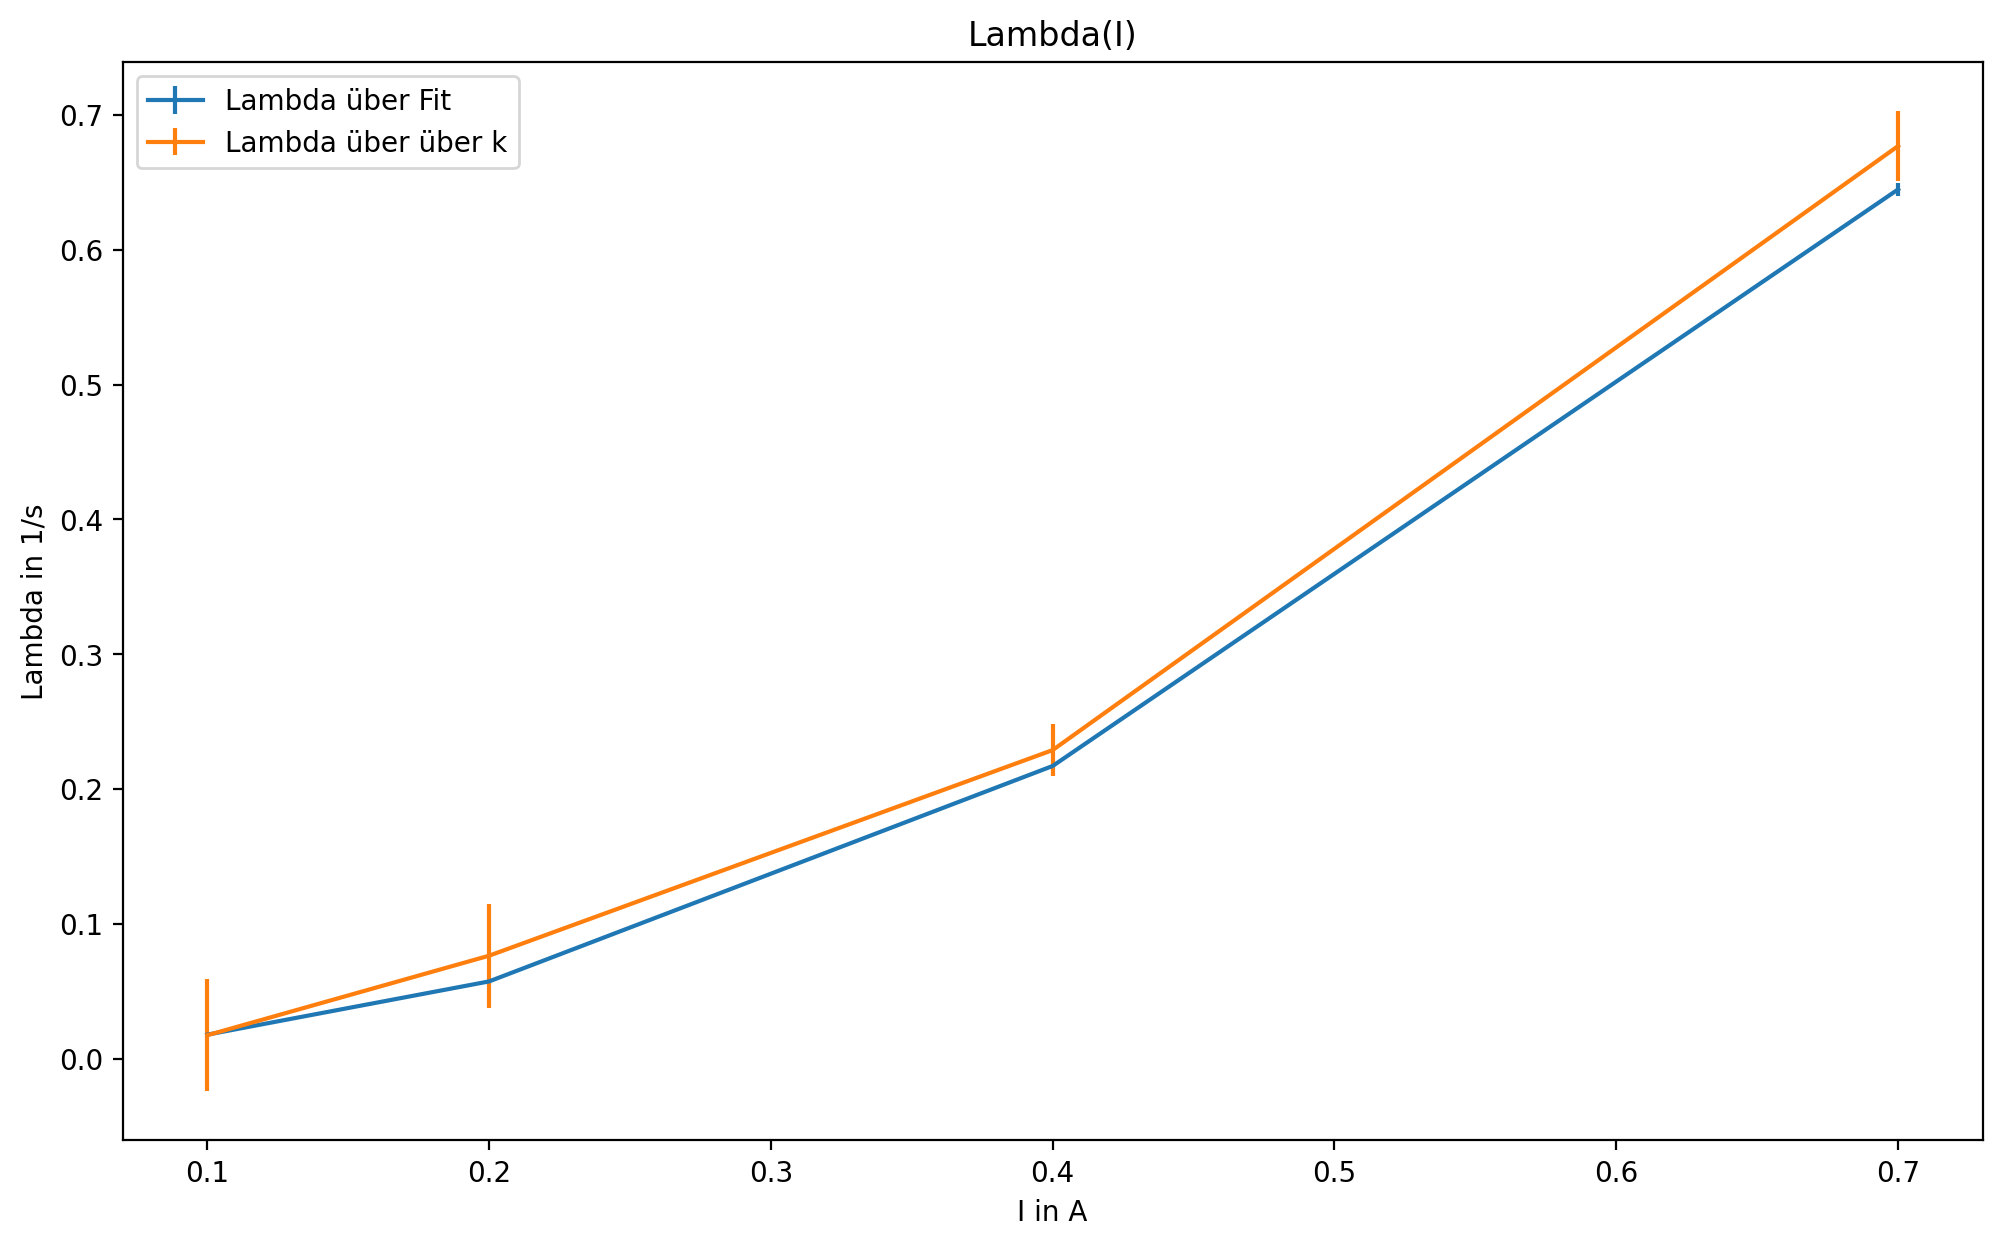

In [48]:
I = [0.1,0.2,0.4,0.7]
L_k = Lambda_from_k(np.array(k))
plt.errorbar(I, Lambdas, d_Lambdas, label="Lambda über Fit")
plt.errorbar(I, L_k, k_err, label="Lambda über über k")
plt.title("Lambda(I)")
plt.xlabel("I in A")
plt.ylabel("Lambda in 1/s")
plt.legend()

Der Graph zeigt, dass über beide Methoden Lambda im Rahmen der Unsicherheit den gleichen Wert hat. Bei der zweiten Methode ist die Grenze zwischen schwacher und starker Dämpfung jedoch nicht eindeutig charakterisiert, was zu weiteren hier nicht beachteten Unsicherheiten führen kann. Für den erste Wert wurde hier eine schwache Dämpfung angenommen, für die restlichen eine stärkere. Es denkbar, dass für $I = 0.2 A$ die Annahme einer schwachen Dämpfung sinnvoll wäre, wir haben uns hier jedoch dagegen entschieden.

Wir erwarten, dass $w$ nur geringfügig von dem Dämpfungsstrom abhängt. Mathematisch verschiebt sich die Frequenz zwar: $\omega = \sqrt{\omega_{0}^{2}-\lambda^{2}}$, dies ist jedoch vernachlässigbar klein. Der Effekt wird nur für große $\lambda$ relevant, dann jedoch ist die Dämpfung so stark, dass fast keine Schwingung mehr messbar ist. Dies zeigt sich unten durch die große Unsicherheit für große Dämpfungsströme. Man hätte die gemessenen Frequenzen auch mit dem Fit bestimmen können, dann sind die Unsicherheiten jedoch nur sehr klein, was bei großer Dämpfung nicht sehr realistisch ist, da es fast keine messbaren Perioden gibt. Die Fouriertransformation liefert in der Hinsicht ein besseres Ergebniss.

0.038349201281049176
3.2596821088888355


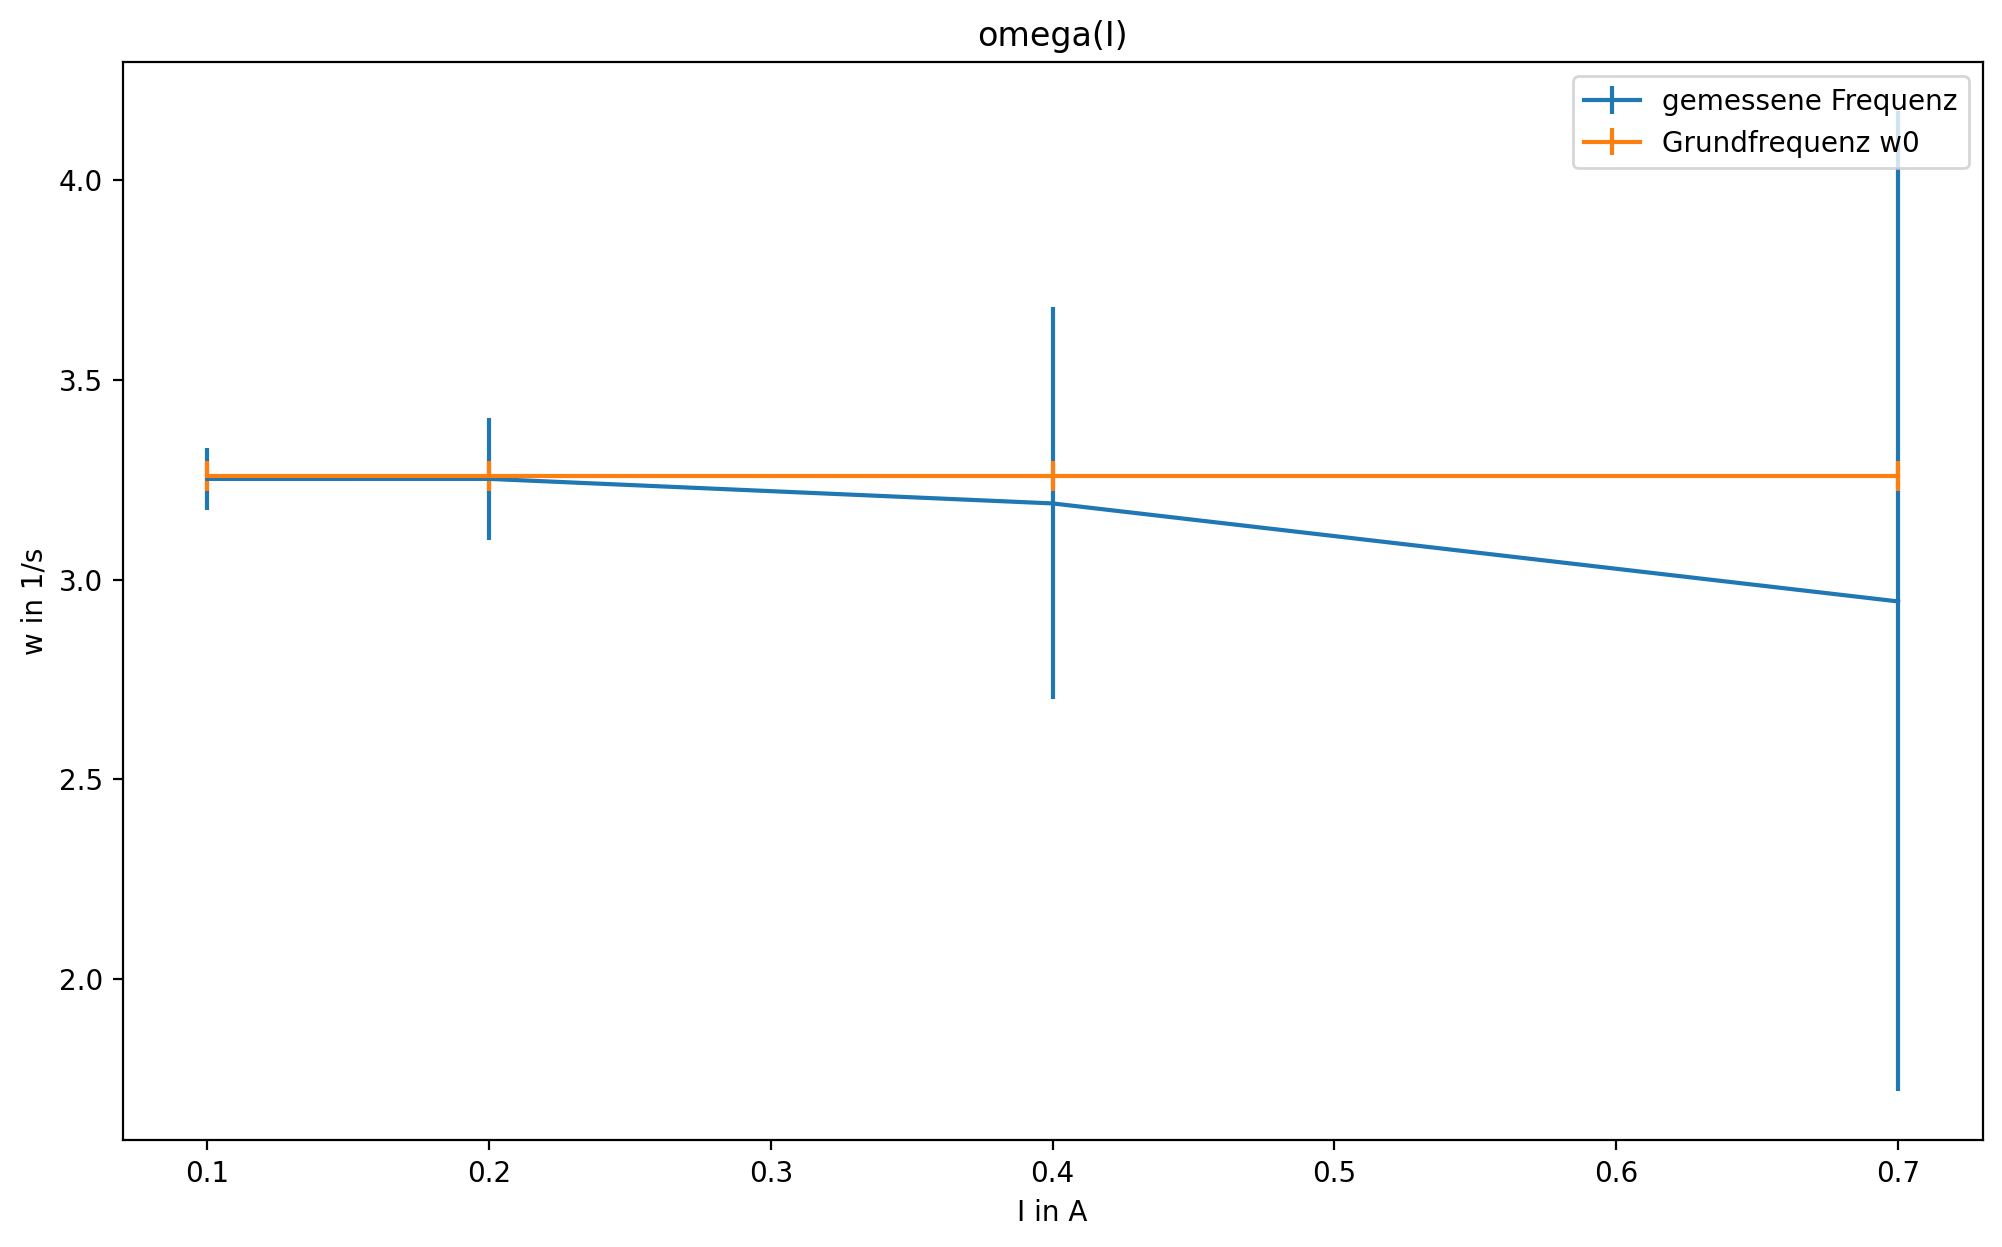

In [49]:
#plot omegas with I
print(d_w0)
print(w0)
plt.errorbar(I, omegas, d_omegas, label="gemessene Frequenz")
plt.errorbar(I, [w0]*len(I), [d_w0]*len(I), label = "Grundfrequenz w0")
plt.title("omega(I)")
plt.xlabel("I in A")
plt.ylabel("w in 1/s")
plt.legend()

Wir erwarten einen quadratischen Zusammenhang der Frequenz mit dem Bremsstrom $I_B$. Dies folgt aus der Lenzschen Regel. Um die Abhängigkeit $\lambda$ von $I_B$ zu bestimmen, muss diese um die in Aufgabe 1.1 bestimmte lineare Reibung bereinigt werden. Dies geschieht durch eine einfach Subtraktion: $\lambda(I_{\mathrm{B}}) \to \hat{\lambda}(I_{\mathrm{B}}) = \lambda(I_{\mathrm{B}})-\lambda_{0}$

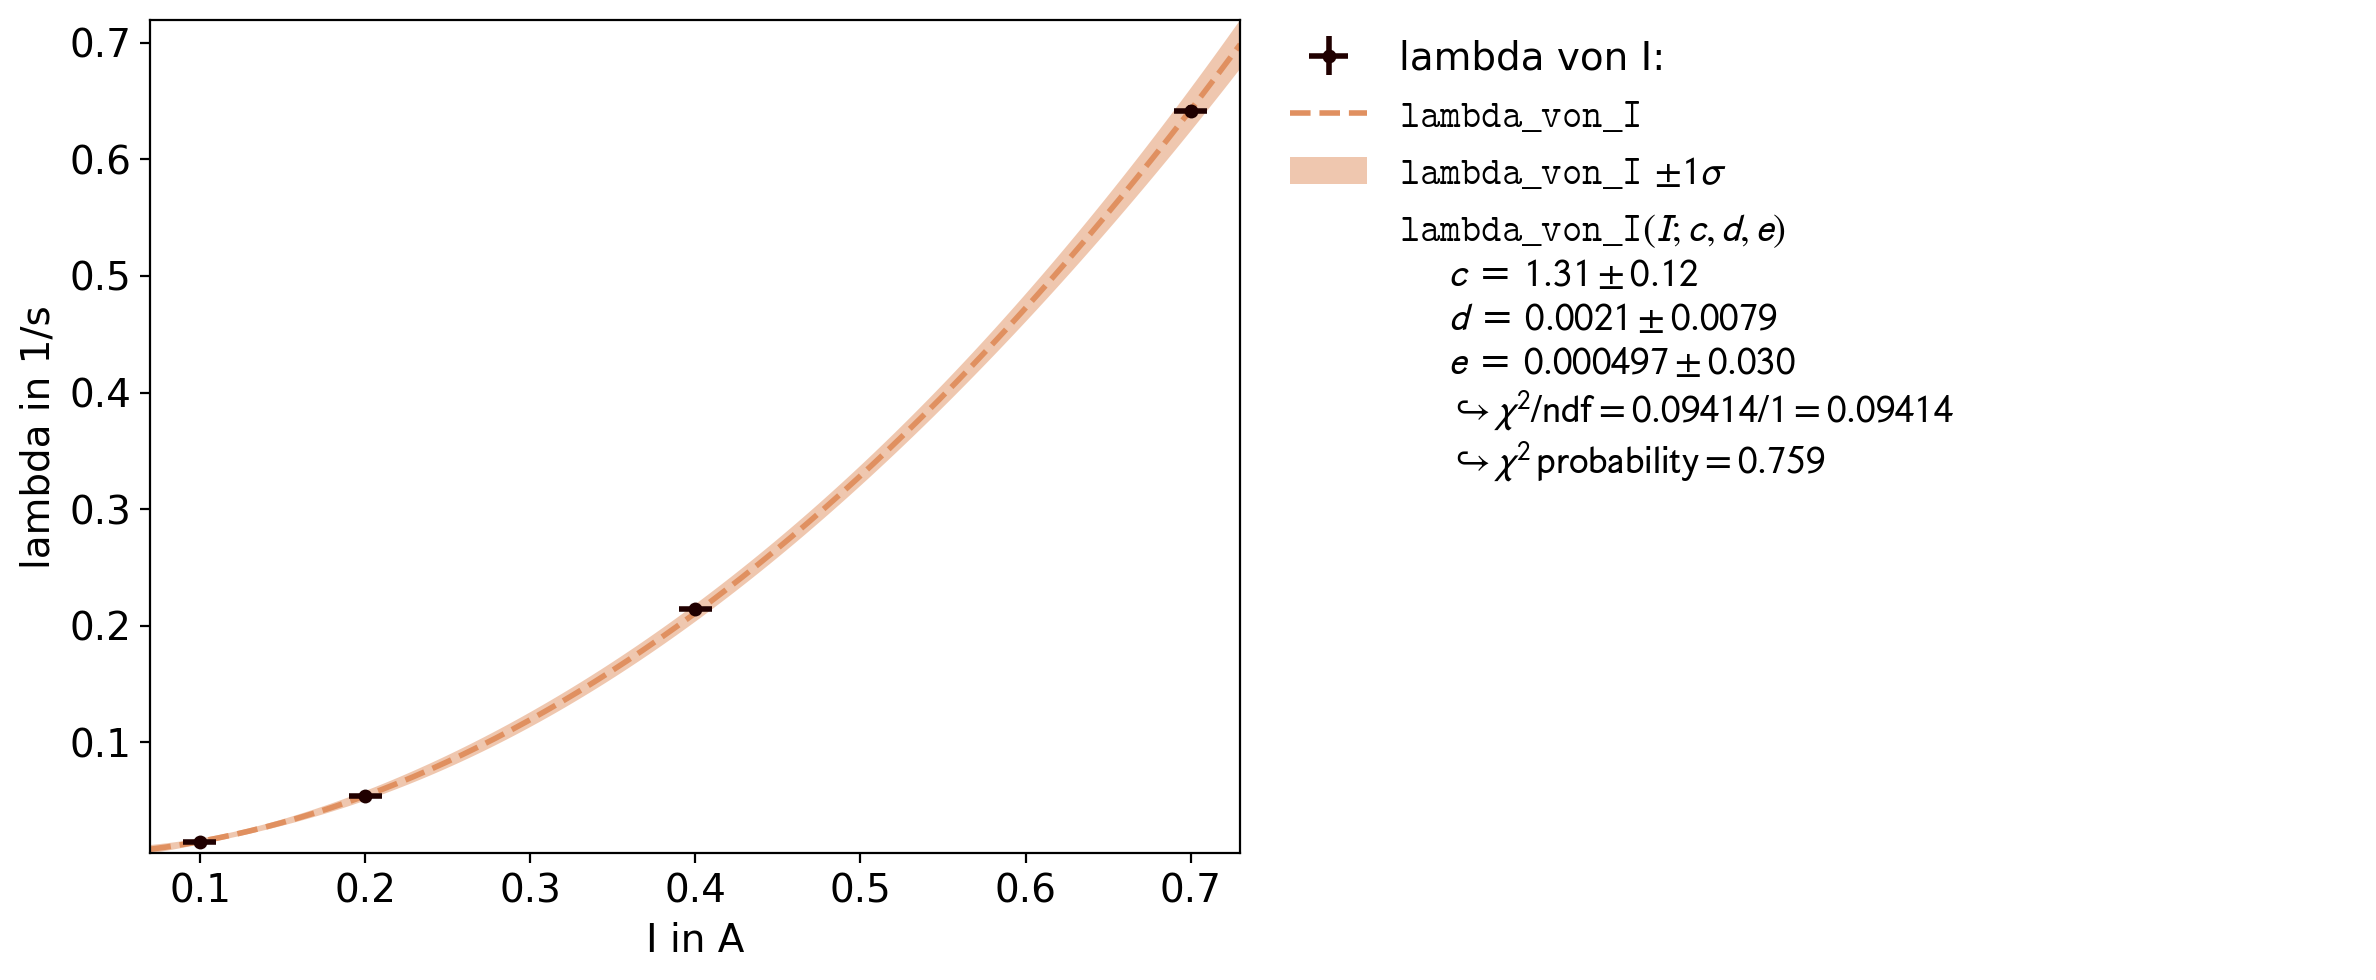

Der aperiodische Grenzfall tritt bei I = (1.58 +- 0.072)A ein.


In [50]:
def lambda_von_I(I, c=1, d=0, e=0):
    return c*(I-e)**2 + d
lambda_err = [np.sqrt(x**2 + d_m**2) for x in d_Lambdas]
Lambdas -= m
fit = kafe2.XYFit(xy_data=[I, Lambdas], model_function=lambda_von_I) 
fit.add_error(axis='y', err_val=lambda_err)
fit.add_error(axis='x', err_val=0.01)

fit.do_fit()
c = fit.parameter_values[0]
d_c = fit.parameter_errors[0]
plot = kafe2.Plot(fit)
plot.customize('data', 'label', [(0, "lambda von I: ")])
plot.x_label="I in A"
plot.y_label="lambda in 1/s"
plot.plot()
plot.show()
I_g = np.sqrt(w0 / c)
d_I_g = np.sqrt( (1/c * 1 / (2 * np.sqrt(w0/c)))**2 * d_w0**2 +  (w0/c**2 * 1 / (2 * np.sqrt(w0/c)))**2 * d_c**2) # Fehlerfortpflanzung auf I_g
print("Der aperiodische Grenzfall tritt bei I = (" + str(round(I_g, 2)) + " +- " + str(round(d_I_g, 3)) + ")A ein.") 

Wir haben gemessen, dass bei I =1,5 +- 0.1A der aperiodische Grenzfall eintrat. Wir können den berechneten Wert also gerade so bestätigen, da sich die Unsicherheiten auf beide Werte überschneiden.

---



DIe Güte ist definiert als $ Q= \frac{\omega}{2\,\lambda}$.

In [51]:
Q = w0 / (2 * np.array(Lambdas))
d_Q = [np.sqrt( (1/(2*Lambdas[l_ind]))**2 * d_w0**2 + (w0 / (2 * Lambdas[l_ind]**2))**2 * d_Lambdas[l_ind]**2) for l_ind in range(len(d_Lambdas))]
print(d_Q)
for i in range(len(d_Q)):
    print("Güte Q bei I = " + str(I[i]) + ": " + str(round(Q[i], 2)) + " +- " + str(round(d_Q[i], 3)))

[1.5707068783764058, 0.36476543375864595, 0.09315596524561282, 0.03525311581394407]
Güte Q bei I = 0.1: 109.67 +- 1.571
Güte Q bei I = 0.2: 30.0 +- 0.365
Güte Q bei I = 0.4: 7.61 +- 0.093
Güte Q bei I = 0.7: 2.54 +- 0.035


## Aufgabe 2: Erzwungene Schwingung

**Hinweise zu allen hier durchzuführenden Messungen finden Sie in der Datei [Hinweise-Aufgabe-2.md](https://gitlab.kit.edu/kit/etp-lehre/p1-praktikum/students/-/tree/main/Resonanz/doc/Hinweise-Aufgabe-2.md).**

### Aufgabe 2.1: Mechanische erzwungene Schwingung

- Nehmen Sie Resonanzkurven $\varphi(\Omega)$ für mindestens zwei verschiedene Ströme $I_{\mathrm{B}}$ auf. Diskutieren Sie den Verlauf sowohl der Amplitude $\varphi_{0}$, als auch der Phasenverschiebung $\Delta\phi$. Bestimmen Sie hierzu $\Delta\phi$ in drei Bereichen:
  - möglichst weit unterhalb;
  - möglichst weit oberhalb; und
  - bei der Resonanzfrequenz.
- Vergleichen Sie den Verlauf der gemessenen Resonanzkurven mit Ihrer Erwartung. 
- Bestimmen $Q(I_{\mathrm{B}})$ und vergleichen Sie Ihre Ergebnisse mit den Ergebnissen aus Aufgabe 1.3.   

---



Die Phase wurde bei den Strömen $I_B = [0.2A, 0.4A] $ aufgenommen. Die Phase kann über den arccos der Kovarianz zwischen zwei Schwingungen bestimmt werden, wenn diese vorher mit ihrer Standardabweichung normiert wurden. Um die Frequenz zu bestimmen, bei denen die Daten aufgenommen wurde, werden wieder die Peaks der Fourietransformierten bestimmt.

Das Modell sagt voraus:
$$
\varphi_{0} = \frac{\Phi/\Theta}{\sqrt{\left(\omega_{0}^{2}-\Omega^{2}\right)^{2}+\left(2\,\lambda\,\Omega\right)^{2}}};
$$
$$
\phi = \arctan\left(\frac{2\,\lambda\,\Omega}{\omega_{0}^{2}-\Omega^{2}}\right).
$$
Dies wird nun mit den gemessenen Daten mittels eines Fits überrprüft.

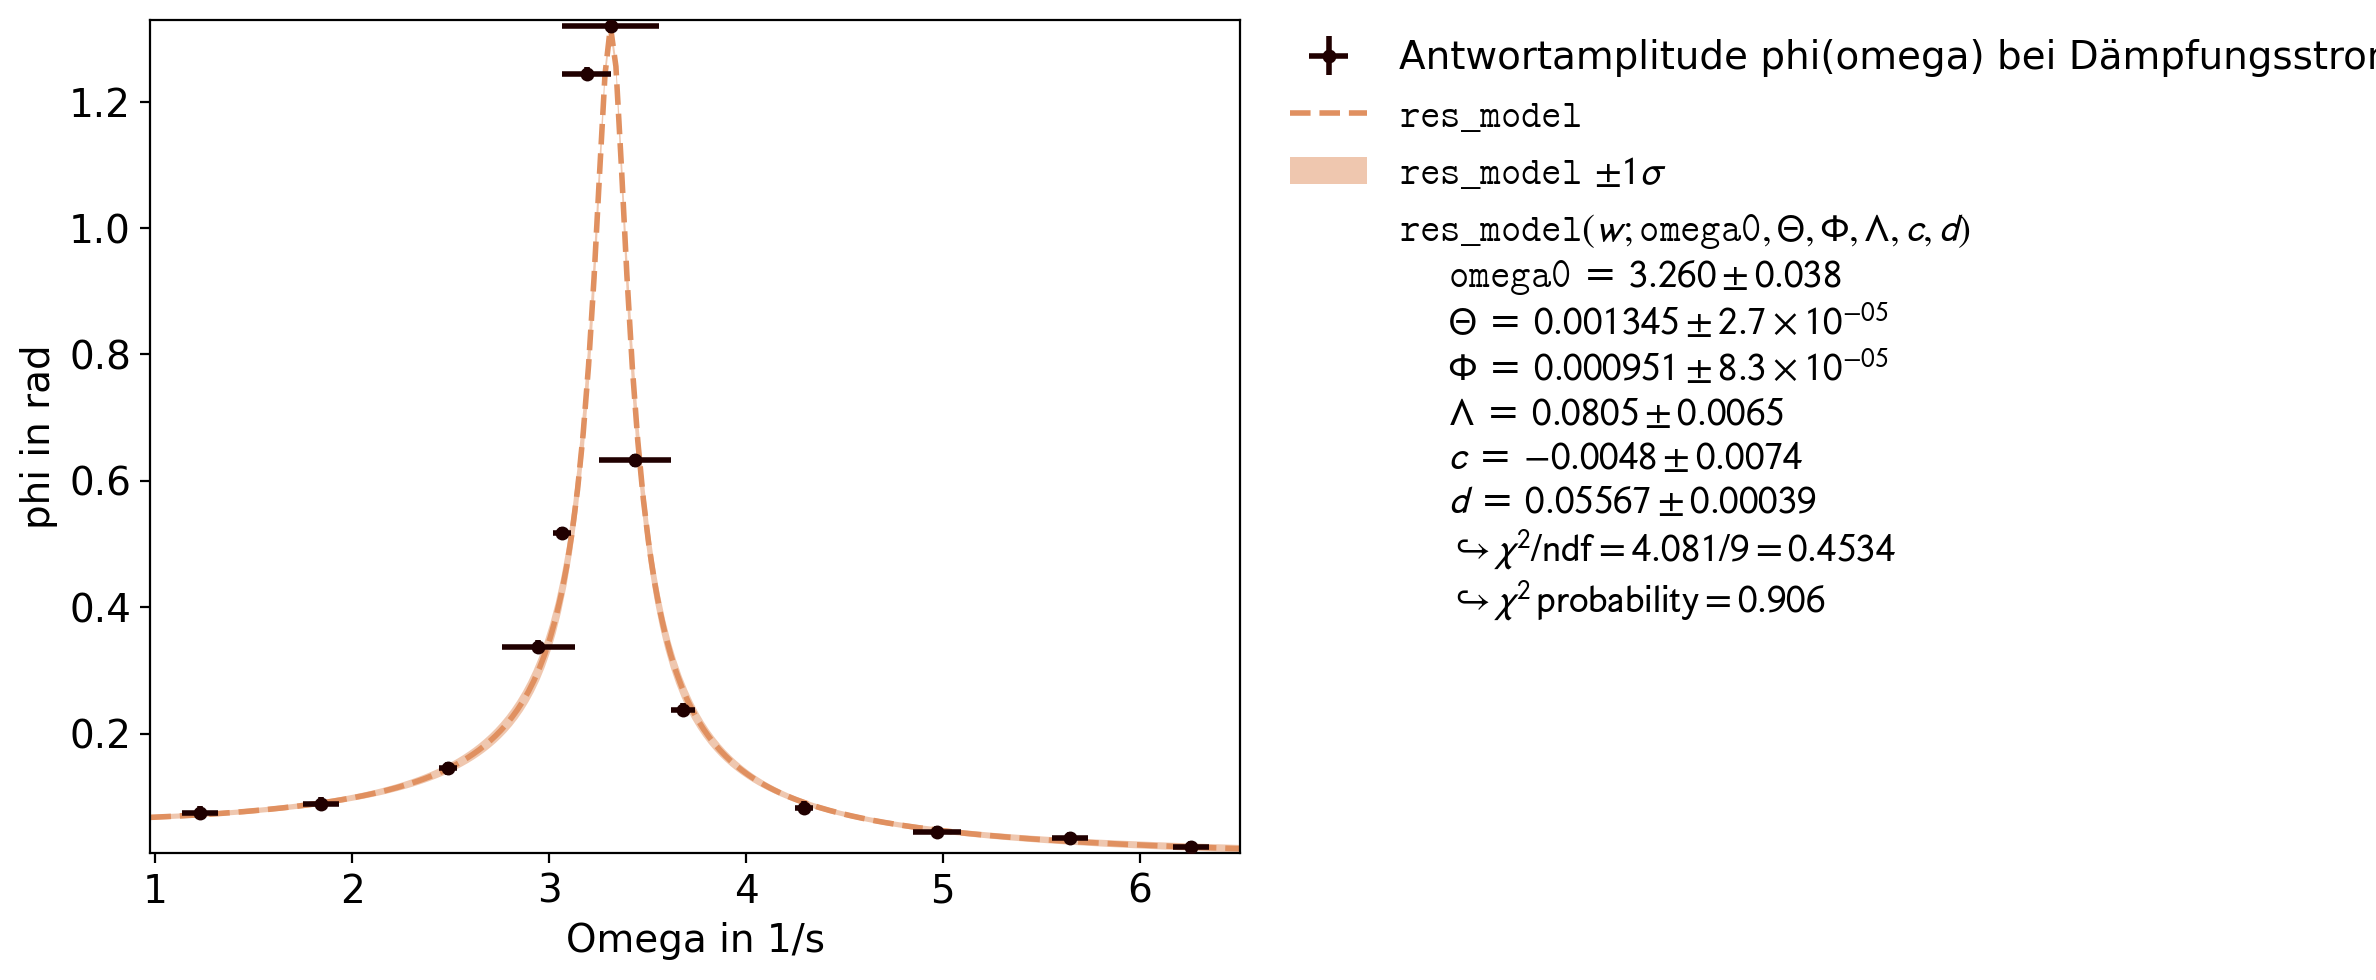

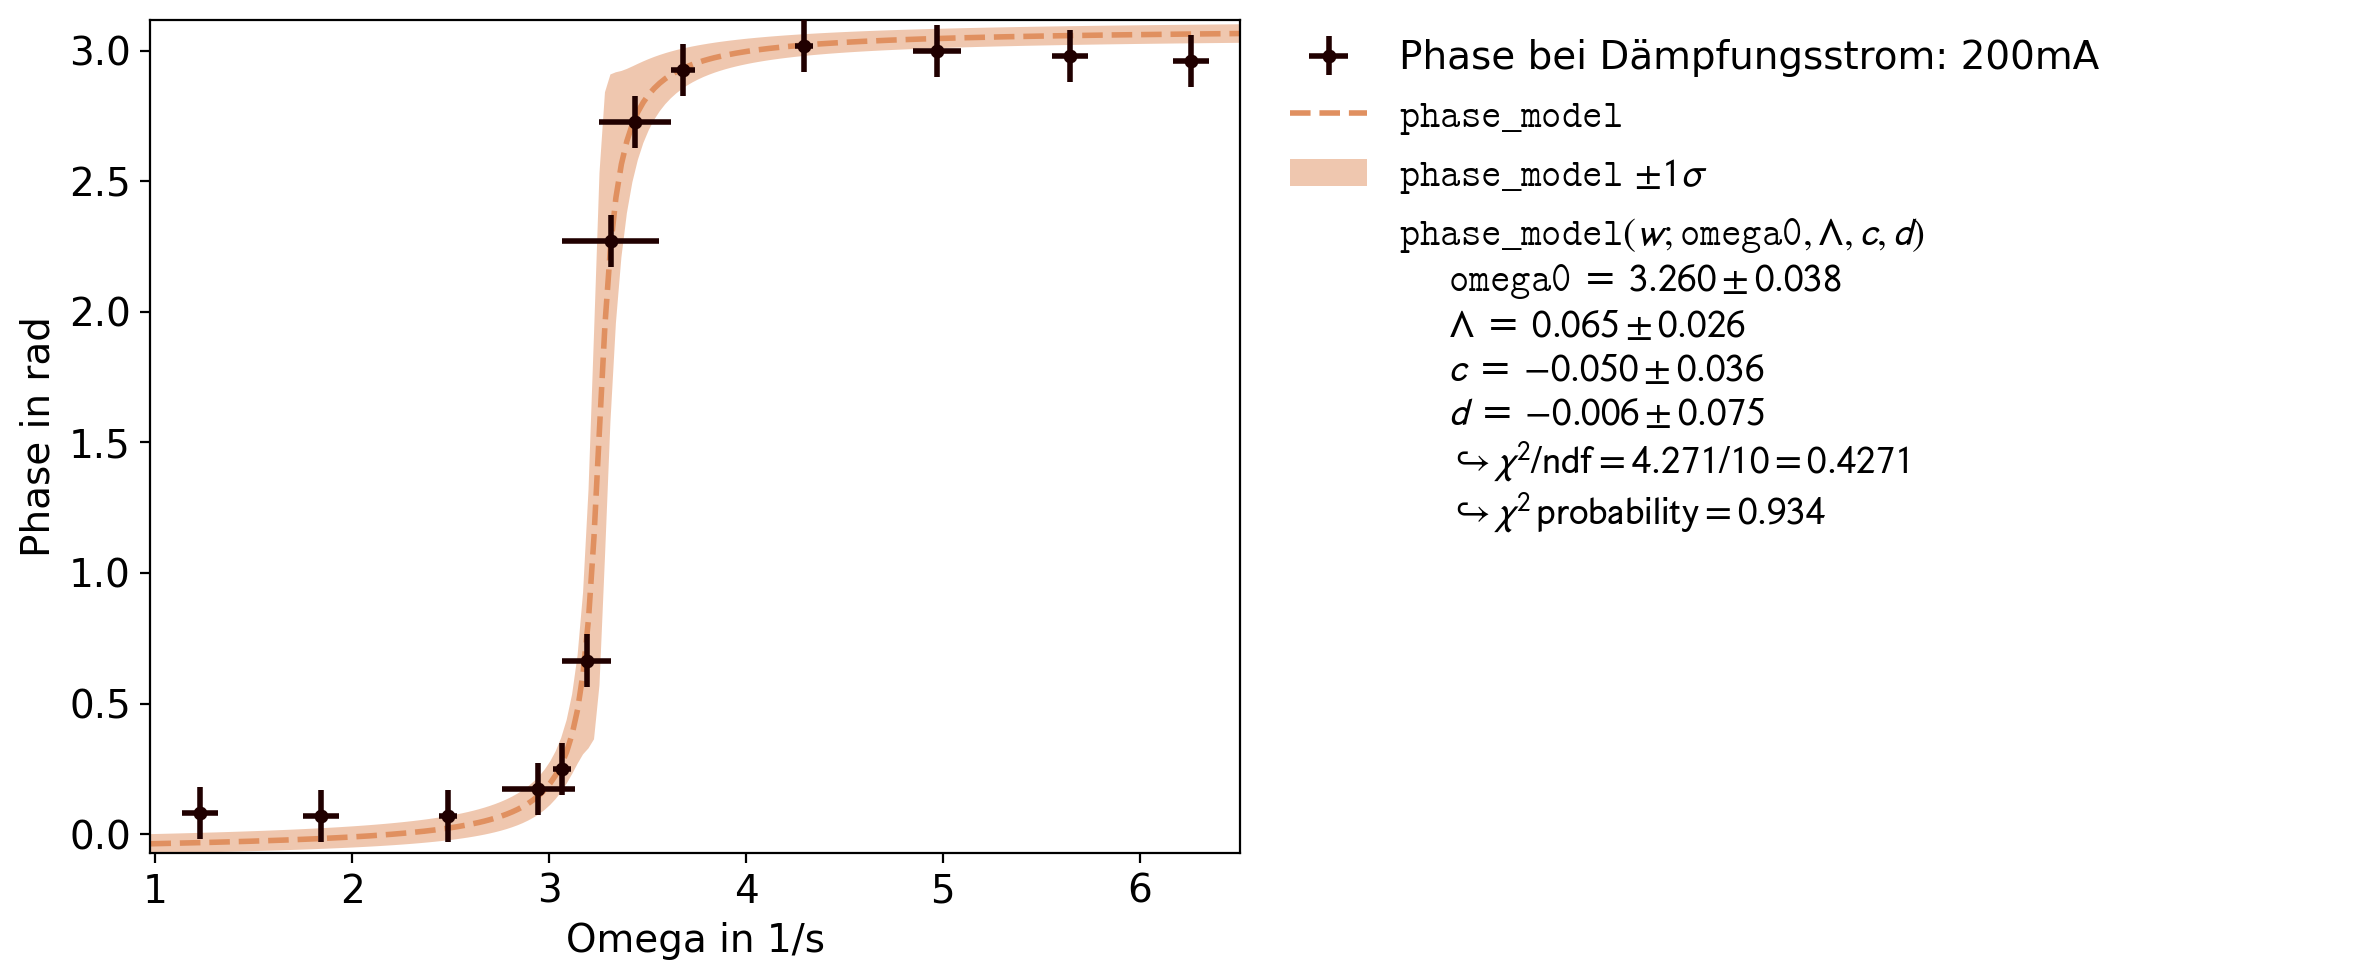

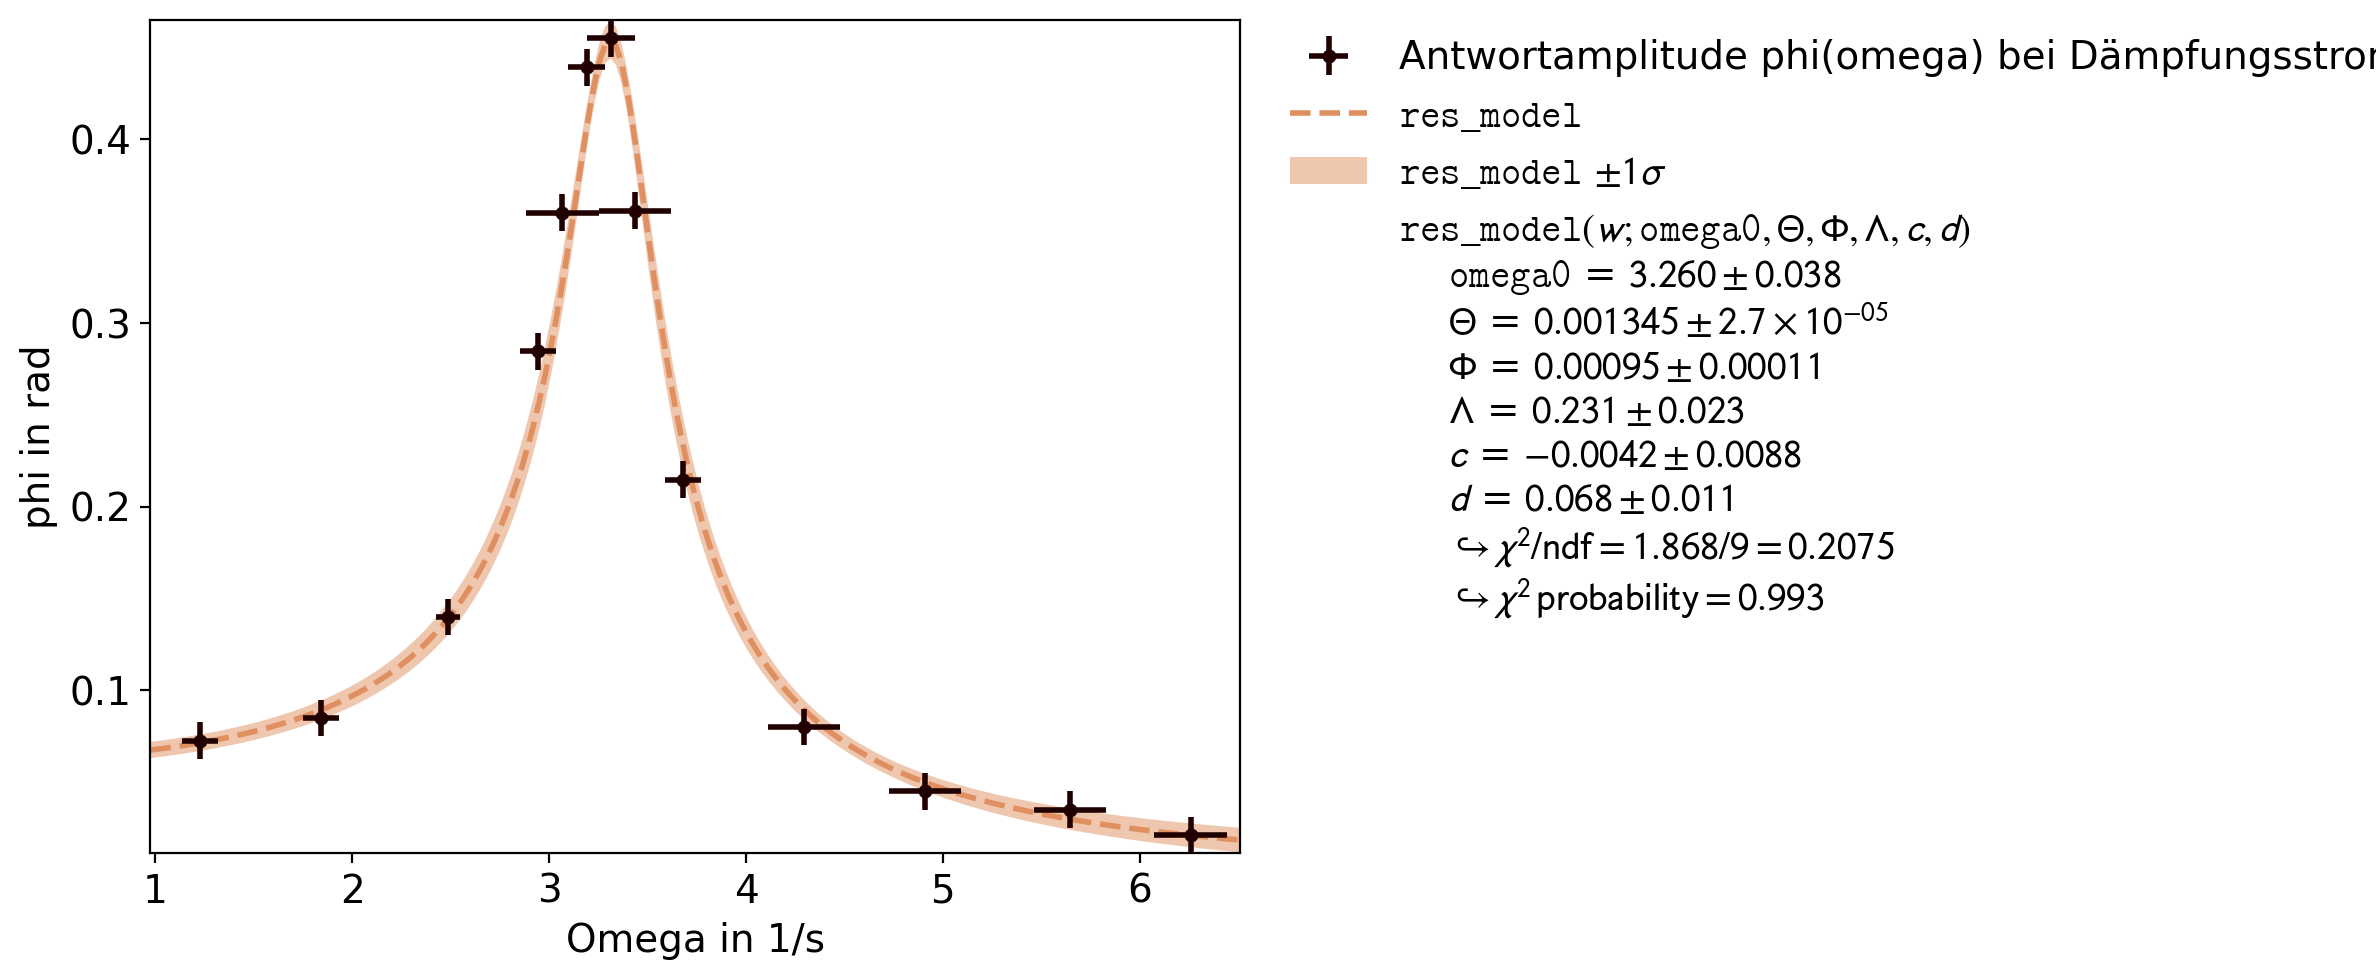

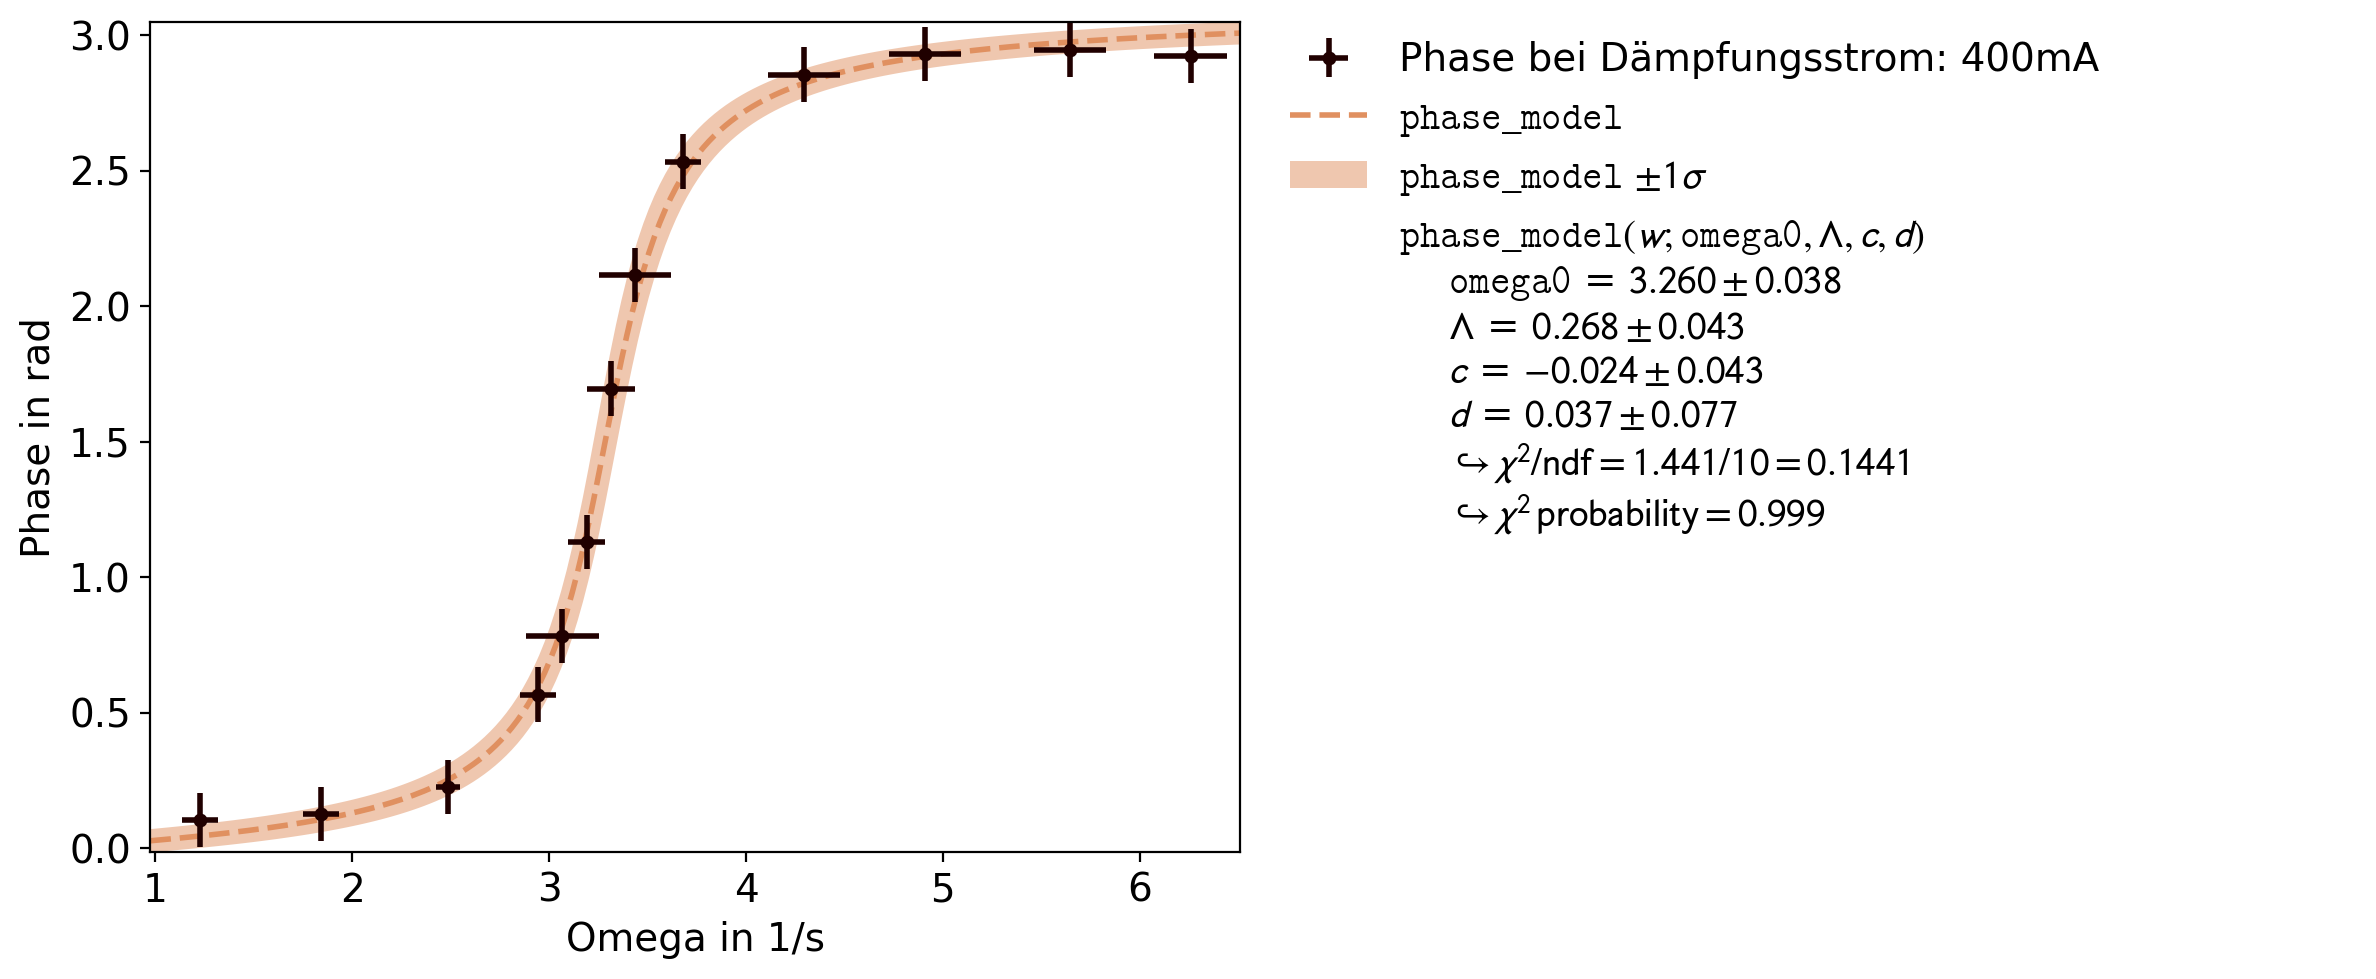

In [52]:
file_names = ["2.1_200mA_1.csv", "2.1_200mA_2.csv","2.1_200mA_3.csv","2.1_200mA_3.8.csv","2.1_200mA_4.csv","2.1_200mA_4.2.csv","2.1_200mA_4.4.csv","2.1_200mA_4.6.csv","2.1_200mA_5.csv","2.1_200mA_6.csv","2.1_200mA_7.csv","2.1_200mA_8.csv","2.1_200mA_9.csv", "2.1_400mA_1.csv", "2.1_400mA_2.csv","2.1_400mA_3.csv","2.1_400mA_3.8.csv","2.1_400mA_4.csv","2.1_400mA_4.2.csv","2.1_400mA_4.4.csv","2.1_400mA_4.6.csv","2.1_400mA_5.csv","2.1_400mA_6.csv","2.1_400mA_7.csv","2.1_400mA_8.csv","2.1_400mA_9.csv",]
amplitude = []
U_amplitude = []
Omegas = []
d_Omegas = []
phases = []
peak_finder_width = 0.015
for file in file_names:
    
    df = pd.read_table(file, delimiter=";", decimal=",", usecols=(0,1,2,3,4))
    #t = df["Zeit t / s"].to_numpy()
    min_size_t = 250
    t = df["Zeit t / s"].to_numpy()[-min_size_t:]
    f = df["Frequenz f / Hz"].to_numpy()
    U = df["Spannung U_B1 / V"].to_numpy()[-min_size_t:]
    phi = df["Weg &b_A1 / rad"].to_numpy()[-min_size_t:]
    fft = df["FFT fft / rad"].to_numpy()
    
    #erste Anpassungen von möglichen Abweichungen der Winkel

    U -= np.mean(U)#U_discr
    phi -= np.mean(phi)
    
    #Amplitude for phi
    max_peaks=sc.signal.find_peaks(phi, peak_finder_width)[0]
    max_amplitude = np.sum(phi[max_peaks])/len(max_peaks)
    min_peaks=sc.signal.find_peaks(-phi, peak_finder_width)[0]
    min_amplitude = np.sum(phi[min_peaks])/len(min_peaks)
    amplitude.append((max_amplitude-min_amplitude)/2)
    #print(max_amplitude-min_amplitude)
            
    
    #Amplitude for U
    U_max_peaks=sc.signal.find_peaks(U, peak_finder_width)[0]
    U_max_amplitude = np.sum(U[U_max_peaks])/len(U_max_peaks)
    U_min_peaks=sc.signal.find_peaks(-U, peak_finder_width)[0]
    U_min_amplitude = np.sum(U[U_min_peaks])/len(U_min_peaks)
    U_amplitude.append((U_max_amplitude-U_min_amplitude)/2)
    
    

    # berechnen der tatsächlichen Frequenz
    new_f = int(len(f)/5 * 0.01)
    peaks, prop = sc.signal.find_peaks(fft[new_f:], max(fft)/4)
    peaks += new_f
    W0 = np.pi * 2 * f[peaks[-1]]
    Omegas.append(W0)
    a, b, c, d = sc.signal.peak_widths(fft, peaks, rel_height=0.25, prominence_data=None, wlen=None)

    #plt.plot(f[peaks], fft[peaks], "x", label = "Peak")
    #plt.hlines(y=fft[peaks[-1]]/2, xmin=f[int(np.floor(c[-1]))], xmax=f[int(np.ceil(d[-1]))], label="fwhm des Peaks")
    #plt.plot(f, fft)
    #plt.show()
    d_W0 = np.pi * 2 * (f[int(np.ceil(d[-1]))] - f[int(np.floor(c[-1]))]) /2
    d_Omegas.append(d_W0)

    U /= np.std(U) #Mit standardabewichung normieren um Phase über Kovarianz zu bestimmen
    phi /= np.std(phi)#
    cov_mat = np.cov(phi, U, bias=True) # bias set to true to avoid Nan values
    phase = np.arccos((cov_mat[0,1]))
    #if np.isnan(phase):
     #   phase = 0
    phases.append(phase)

    if max_amplitude-min_amplitude>6:
        print(phase)
        plt.plot(t, phi, label="phi")
        plt.plot(t, U, label = "U")
        plt.legend()
        plt.title("Zeitlicher Verlauf des Phasenwinkels")
        plt.xlabel("t in s")
        plt.ylabel("Phi in rad")
        plt.plot(t[min_peaks],phi[min_peaks], ".")
        plt.plot(t[max_peaks],phi[max_peaks], ".")
        plt.plot(t[U_min_peaks],U[U_min_peaks], ".")
        plt.plot(t[U_max_peaks],U[U_max_peaks], ".")
        plt.show()



#f= np.arra([1,2,3,3.8,4,4.2,4.4,4.6,5,6,7,8,9]) / (2)
Amps = [amplitude[:13], amplitude[13:]]
Oms = [Omegas[:13], Omegas[13:]]
d_Oms = [d_Omegas[:13], d_Omegas[13:]]
Phases = [phases[:13], phases[13:]]
Strom = ["200mA", "400mA"]
w0 = w0_
d_w0 = d_w0_


"""
plt.plot(f, amplitude[:13])
plt.title("Zeitlicher Verlauf des Phasenwinkels")
plt.xlabel("t in s")
plt.ylabel("Phi in rad")
plt.show()

plt.plot(f, amplitude[11:])
plt.title("Zeitlicher Verlauf des Phasenwinkels")
plt.xlabel("t in s")
plt.ylabel("Phi in rad")
plt.show()
"""

def res_model(w, omega0, Theta, Phi = 0.017, Lambda=0.2, c=0, d=0):
    return Phi/(Theta * np.sqrt((w0**2-(w-d)**2)**2+(2*Lambda*w)**2)) + c

def phase_model(w, omega0, Lambda=0.135, c=0, d=0):
    return ((np.arctan( 2 * Lambda * (w-d) / (omega0**2 - (w-d)**2))) + np.pi)%np.pi + c

lambdas=[]
d_lambdas=[]
for i in range(len(Amps)): 
    
    fit = kafe2.XYFit(xy_data=[Oms[i], Amps[i]], model_function=res_model) 
    fit.add_error(axis='y', err_val=phi_error)
    fit.add_error(axis='x', err_val=d_Oms[i])
    fit.add_parameter_constraint(name="omega0", value=w0, uncertainty=d_w0)
    fit.add_parameter_constraint(name="Theta", value=theta, uncertainty=d_theta)
    fit.limit_parameter(name="Theta", lower=0, upper=2*theta)
    fit.limit_parameter(name="Phi", lower=0)

    fit.limit_parameter(name="Lambda", lower=0, upper=1)
    fit.do_fit()
    lambda_1 = fit.parameter_values[3]
    d_lambda_1 = fit.parameter_errors[3]
    
    plot = kafe2.Plot(fit)
    plot.customize('data', 'label', ["Antwortamplitude phi(omega) bei Dämpfungsstrom: " + Strom[i]])
    plot.x_label="Omega in 1/s"
    plot.y_label="phi in rad"
    plot.plot()
    plot.show()
    
    fit = kafe2.XYFit(xy_data=[Oms[i], Phases[i]], model_function=phase_model) 
    fit.add_error(axis='y', err_val=0.1)
    fit.add_error(axis='x', err_val=d_Oms[i])
    fit.add_parameter_constraint(name="omega0", value=w0, uncertainty=d_w0)
    fit.limit_parameter(name="Lambda", lower=0, upper=1)
    fit.limit_parameter(name="s", lower=0, upper=1)
    fit.do_fit()
    lambda_2 = fit.parameter_values[1]
    d_lambda_2 = fit.parameter_errors[1]
    
    plot = kafe2.Plot(fit)
    plot.customize('data', 'label', ["Phase bei Dämpfungsstrom: " + Strom[i]])
    plot.x_label="Omega in 1/s"
    plot.y_label="Phase in rad"
    plot.plot()
    plot.show()
    
    lambda_ = (lambda_1 * d_lambda_1 + lambda_2 * d_lambda_2) / (d_lambda_1 + d_lambda_2)
    d_lambda_ = np.sqrt(d_lambda_1**2 + d_lambda_2**2)
    lambdas.append(lambda_)
    d_lambdas.append(d_lambda_)

Es ist anzumerken, dass für beide Ströme in den Fits der Phase, als auch der Amplitude unabhängig der Dämpfungsparameter $\Lambda$ gefittet wurde. In beiden Messreihen, haben beide Fits innerhalb der Unsicherheit den gleichen Wert für $\Lambda$ ergeben. Dies weist auf Konsistenz des Modells hin. Die Fits lassen alle darauf schließen, dass das Modell oben akzeptiert werden kann.

[0.1, 0.2, 0.4, 0.7]
[0.2, 0.4] [23.99878888  6.39019344]
Güte Q bei R = 0.2: 24.0 +- 9.389
Güte Q bei R = 0.4: 6.39 +- 1.235


Text(0.5, 1.0, 'Vergleich der Güte aus Afugabe 2.1 und 1.3')

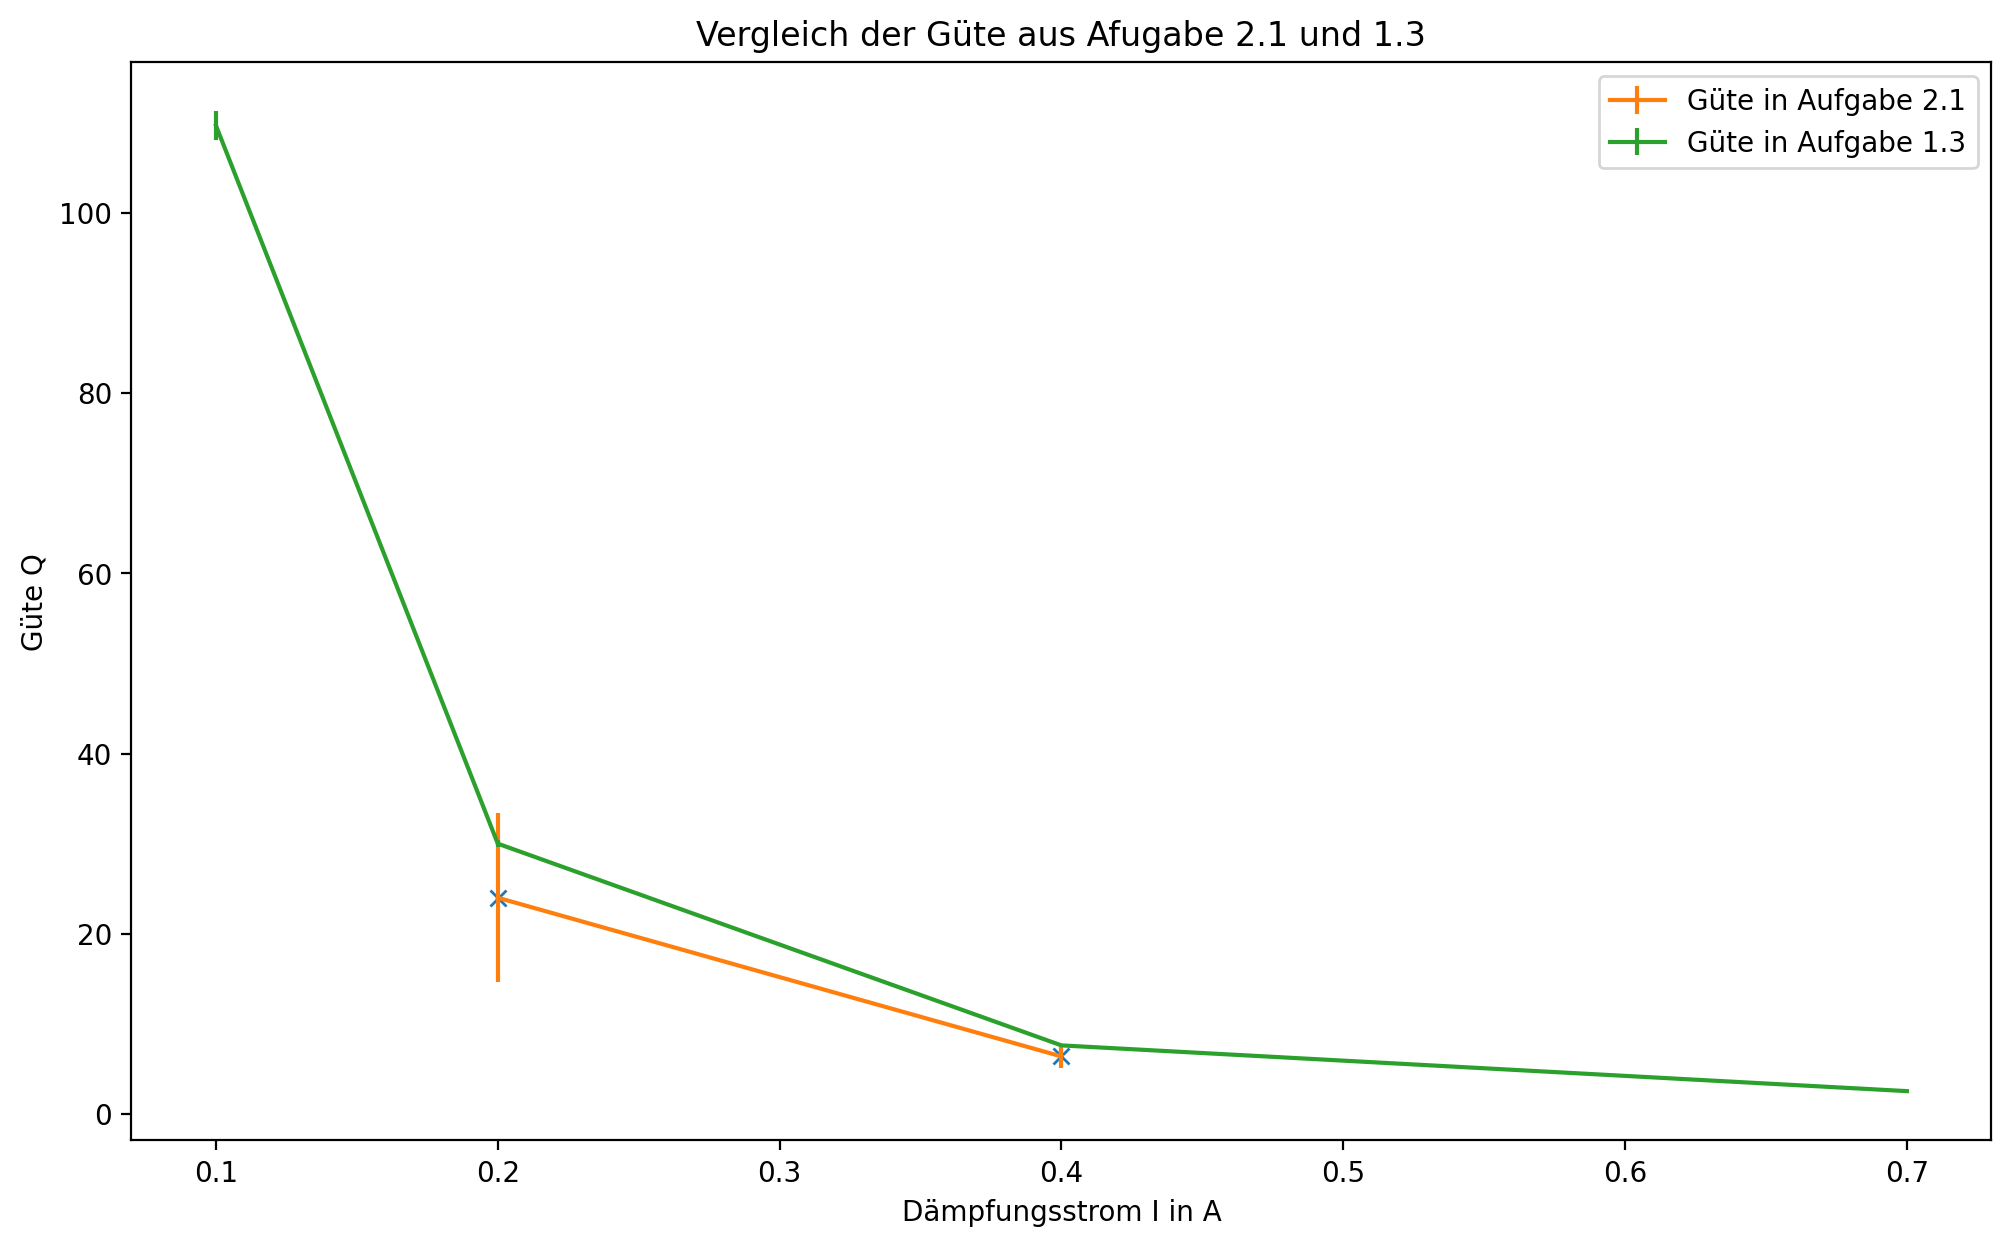

In [53]:
lines = {'linestyle': 'line'}
#plt.rc('lines', **lines)
print(I)
I_n = [0.200, 0.400]
Q_n = w0 / (2 * np.array(lambdas))
d_Q_n = [np.sqrt( (1/(2*lambdas[l_ind]))**2 * d_w0**2 + (w0 / (2 * lambdas[l_ind]**2))**2 * (d_lambdas[l_ind])**2) for l_ind in range(len(d_lambdas))]
print(I_n, Q_n)
for i in range(len(I_n)):
    print("Güte Q bei R = " + str(I_n[i]) + ": " + str(round(Q_n[i], 2)) + " +- " + str(round(d_Q_n[i], 3)))
plt.plot(I_n, Q_n, "x")
plt.errorbar(I_n, Q_n, d_Q_n, label = "Güte in Aufgabe 2.1")
plt.errorbar(I, Q, d_Q, label="Güte in Aufgabe 1.3")
plt.xlabel("Dämpfungsstrom I in A")
plt.ylabel("Güte Q")
plt.legend()
plt.title("Vergleich der Güte aus Afugabe 2.1 und 1.3")

Es ist zu erkennen, dass die Güte für große Ströme ungefähr gleich ist, bei kleinen Strömen weicht die Güte jedoch ab, hier ist die neue Güte etwas kleiner, als die alte.

Diskussion:
1. $\Delta\Phi < \omega_0$:
Der Phasenunterschied ist sehr klein, d.h. das Pendel schwingt nicht "weit hinter dem Antrieb". Hier ist in beiden Messungen eine kleine, aber nicht verschwindende Amplitude zu messen. Je größer die Phase wird, desto größer wird hier die Amplitude
2. $\Delta\Phi \approx \frac{\pi}{2}$:
Hier gilt $\Omega \approx \omega_0$. Es ist ein Phasensprung zu beobachten. In einem relativ kleinen Frequenzbereich springt die Phase von $0$ auf $\pi$.  Bei dem kleinen Dämpfungsstrom ist ein schärferer Sprung zu beobachten. Die Amplitude steigt auf ihr Maximum bei der Resonanzfrequenz $\Omega_{Res} \approx \omega_0$.
3. $\Delta\Phi < \omega_0$:
Falls der Phasenunterschied weiter vergrößert wird, so fällt die Amplitude ungefähr exponentiell ab und nähert sich null. Das Pendel schwingt dann gegenphsaig zur antreibenden Kraft mit sehr kleiner / verschwindender Amplitude.

**Lösung:**



---

### Aufgabe 2.2: Elektrische erzwungene Schwingung

Führen Sie die folgenden Aufgaben für drei verschiedene Widerstände $R$ durch:

 - Stellen Sie $I_{\Omega}$ und $Z(\Omega)$ in einer gemeinsamen Abbildung dar. 
 - Bestimmen Sie $Q(R)$ aus der Resonanzbreite. 
 - Demonstrieren Sie die Resonanzüberhöhung an Spule und Kondensator, indem Sie die Spannungsverläufe an Spule und Kondensator zusammen mit der anliegenden Spannung als Funktion von $\Omega$ darstellen. 
 - Bestimmen Sie auch hieraus $Q(R)$ und vergleichen Sie die ermittelten Werte im Rahmen der sich ergebenden Unsicherheiten. 
 - Stellen Sie $\Delta\phi(\Omega)$ dar.

---

**Lösung:**

Die Daten werden aus der Datei eingelesen. Maximas, die benötigt werden, werden mit $scipy.signal.find\_peaks$ bestimmt.

---

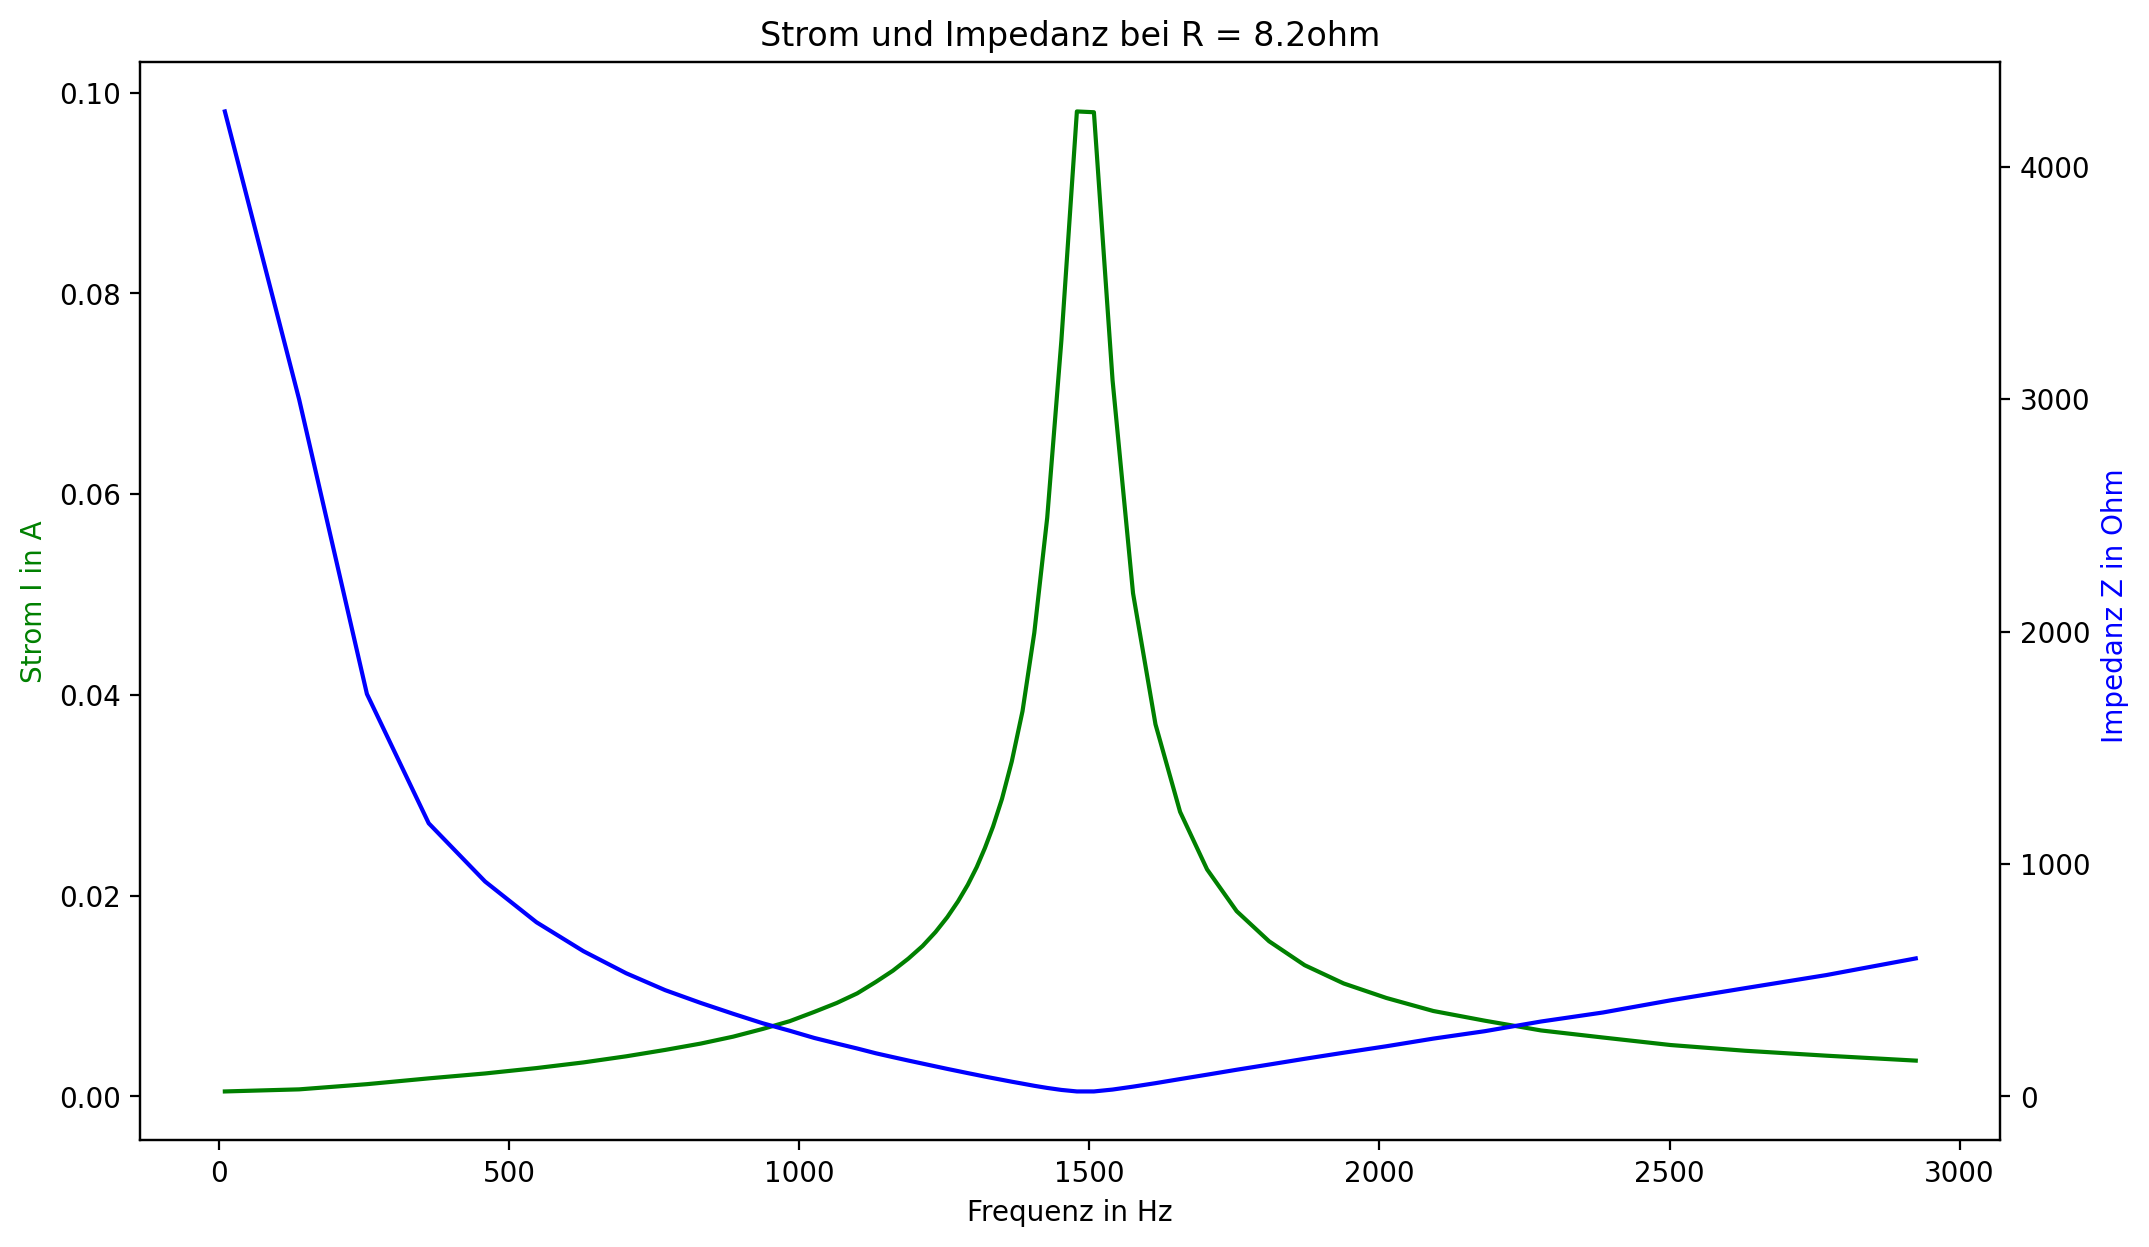

9.751158905484 9.75412989456261


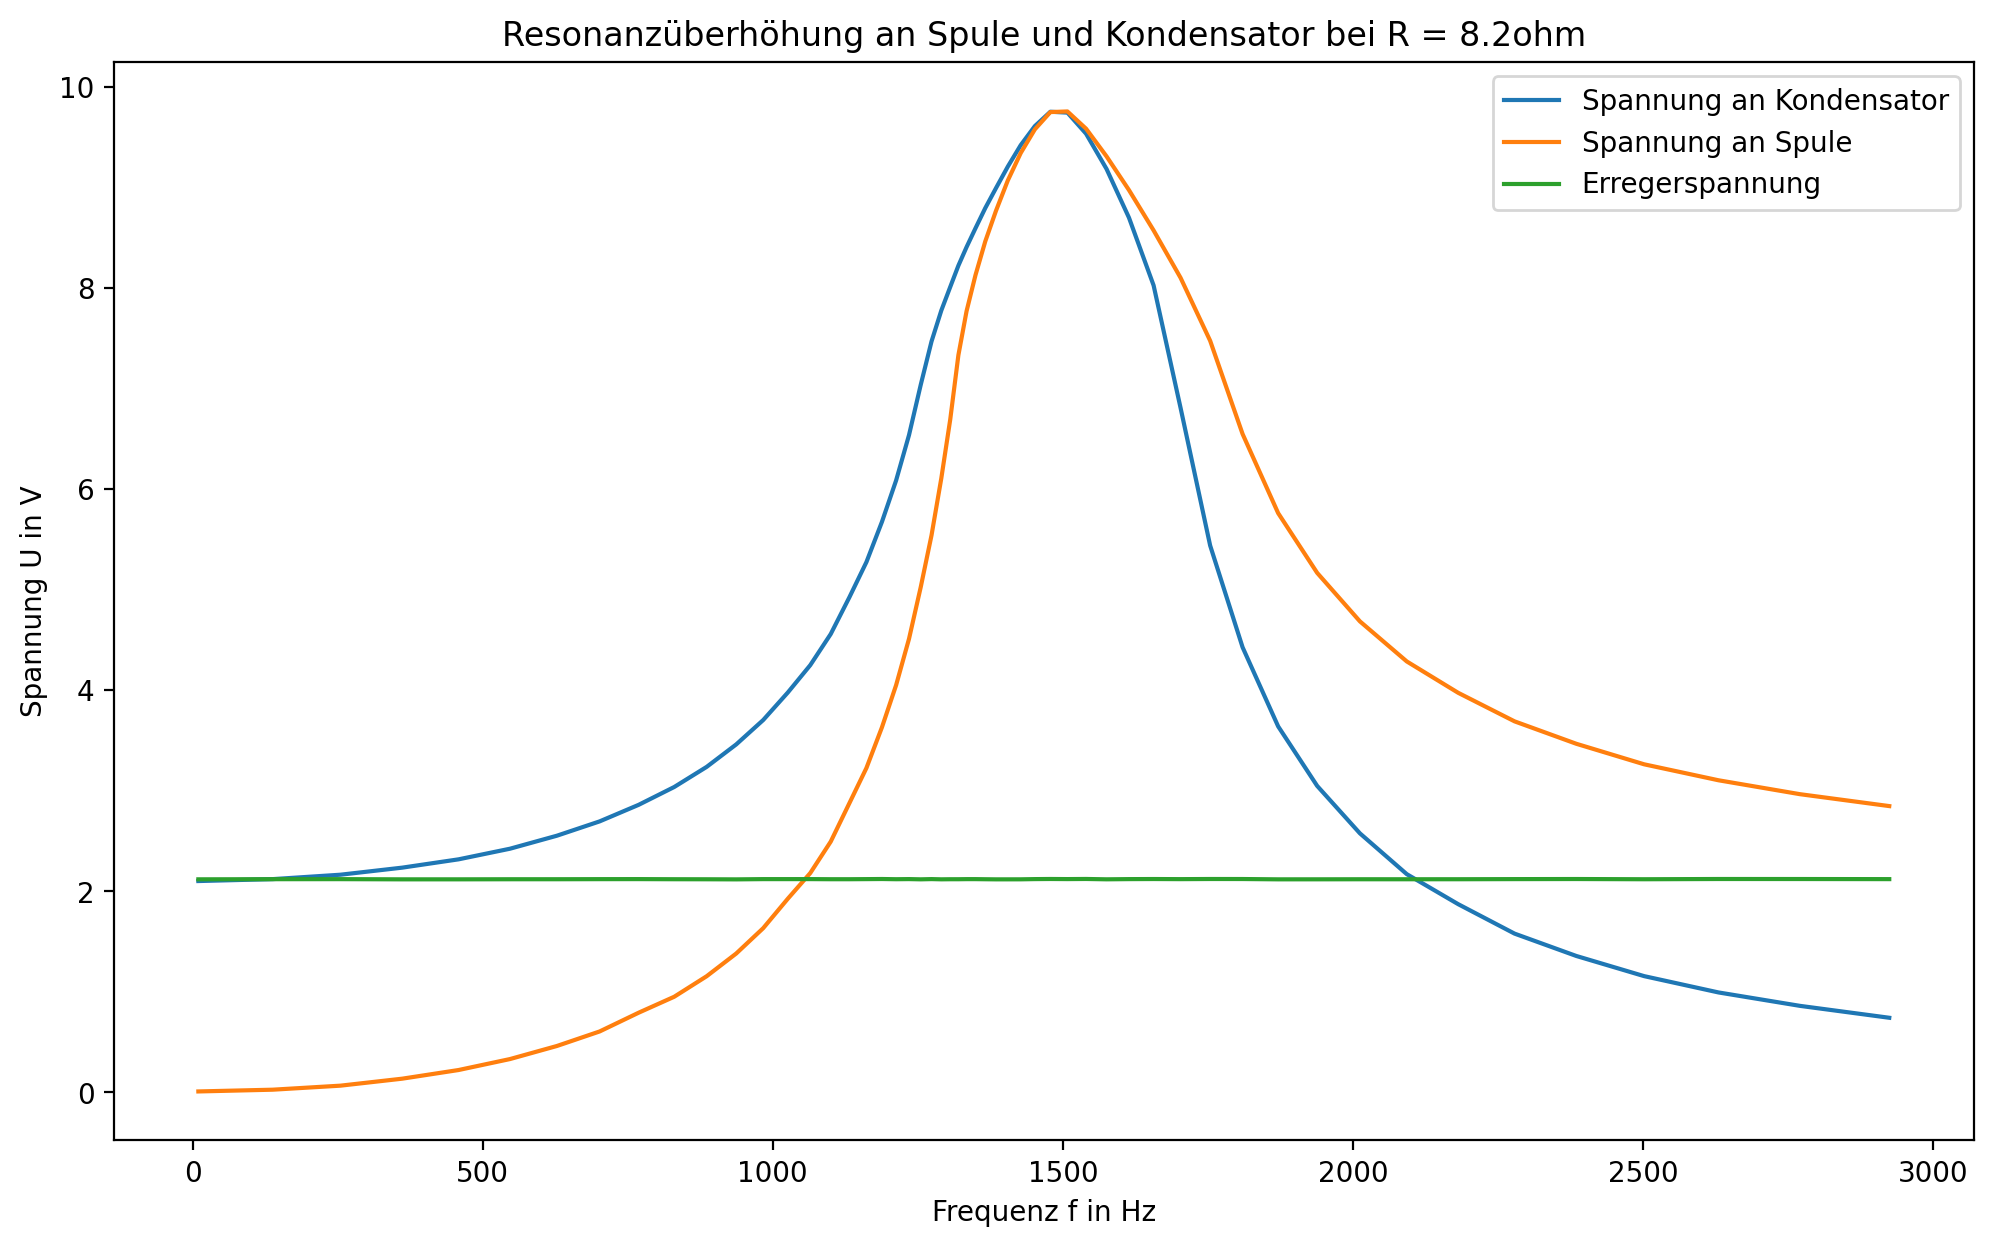

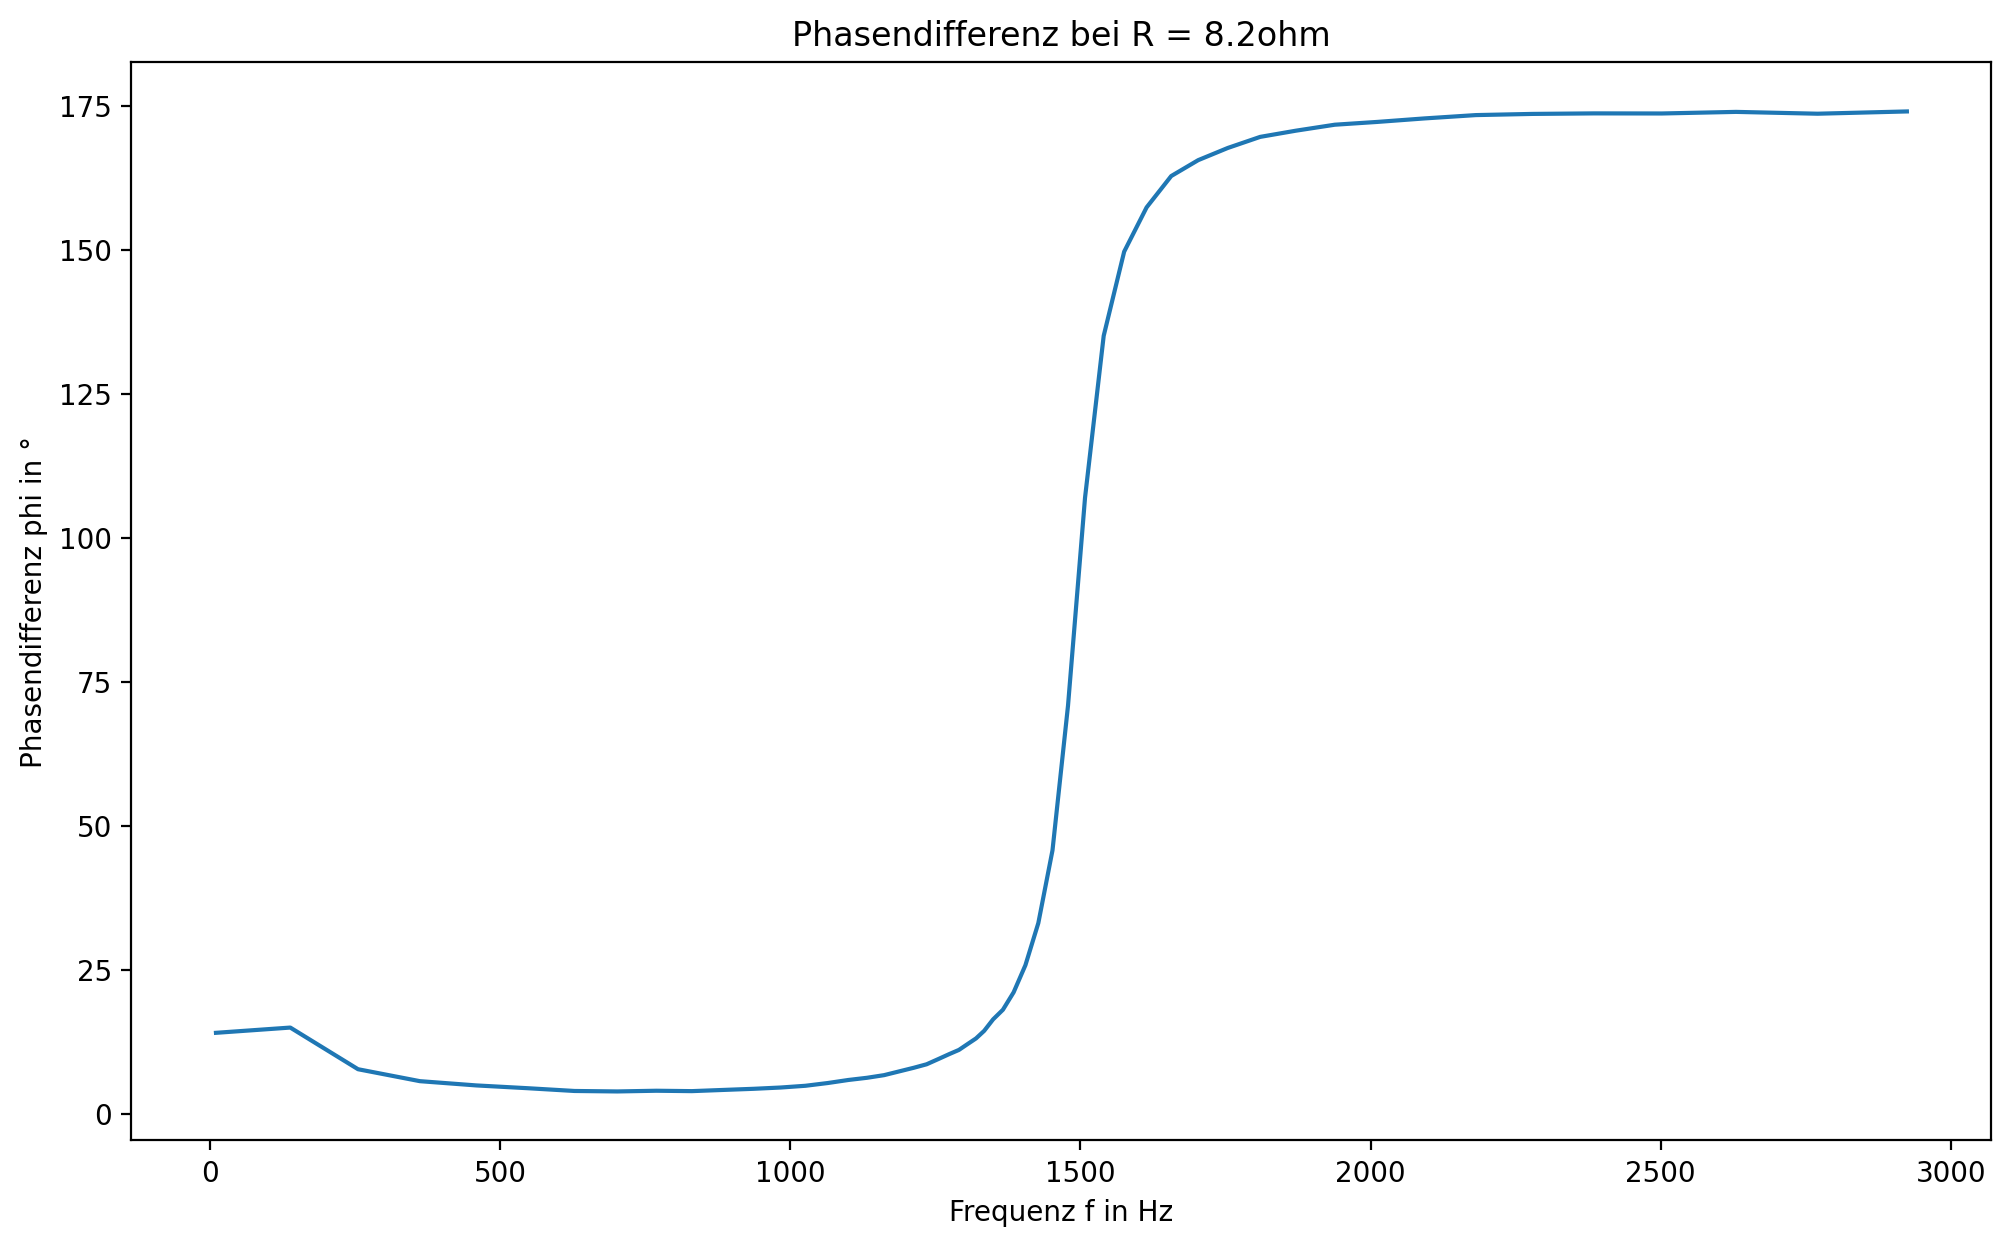

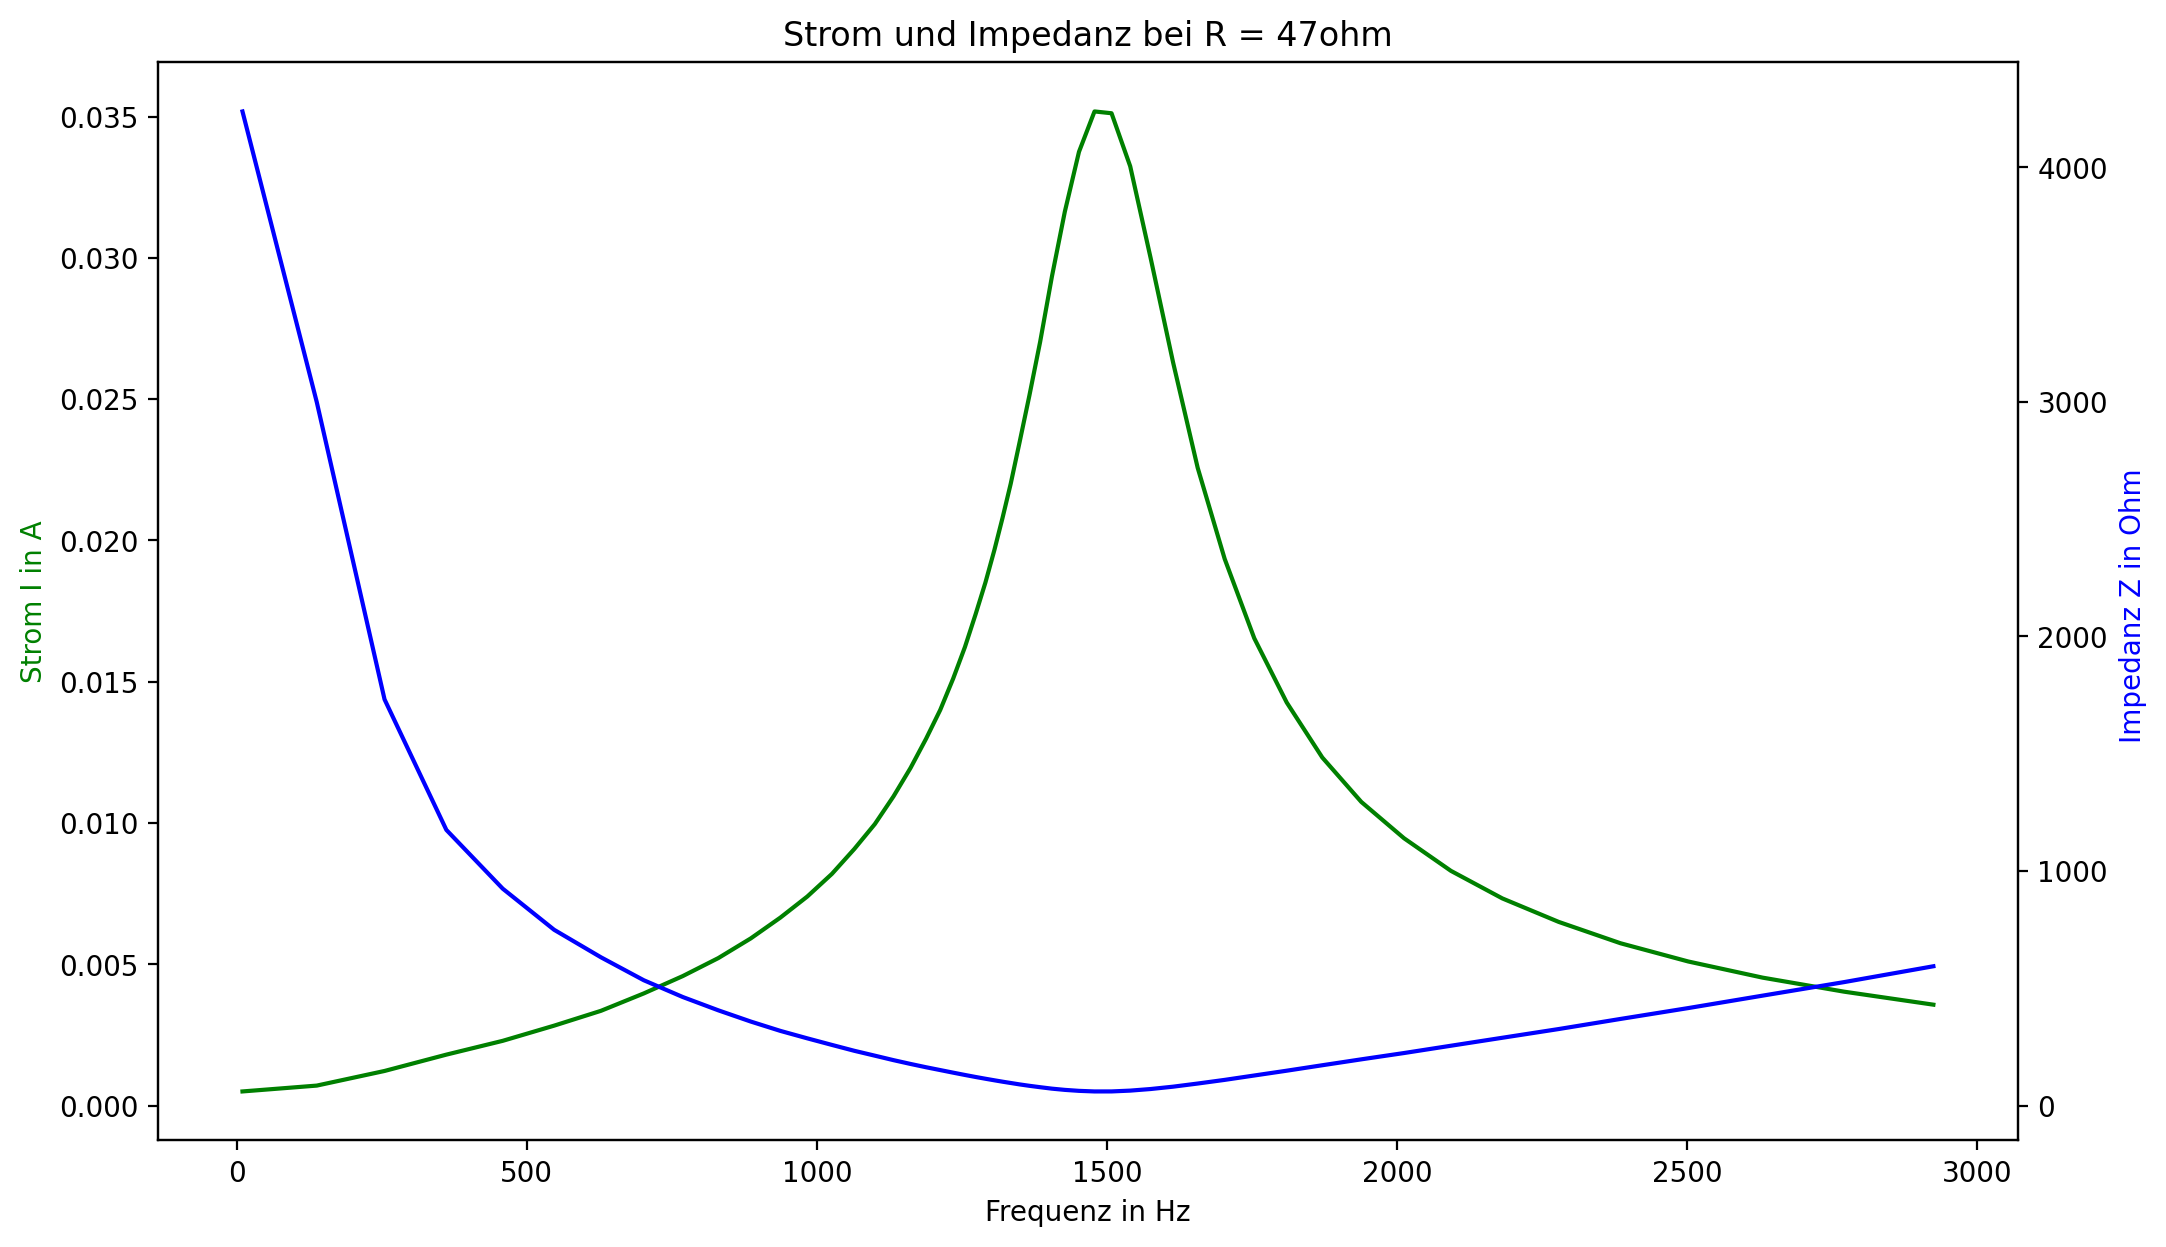

8.75175696646108 8.77499002848436


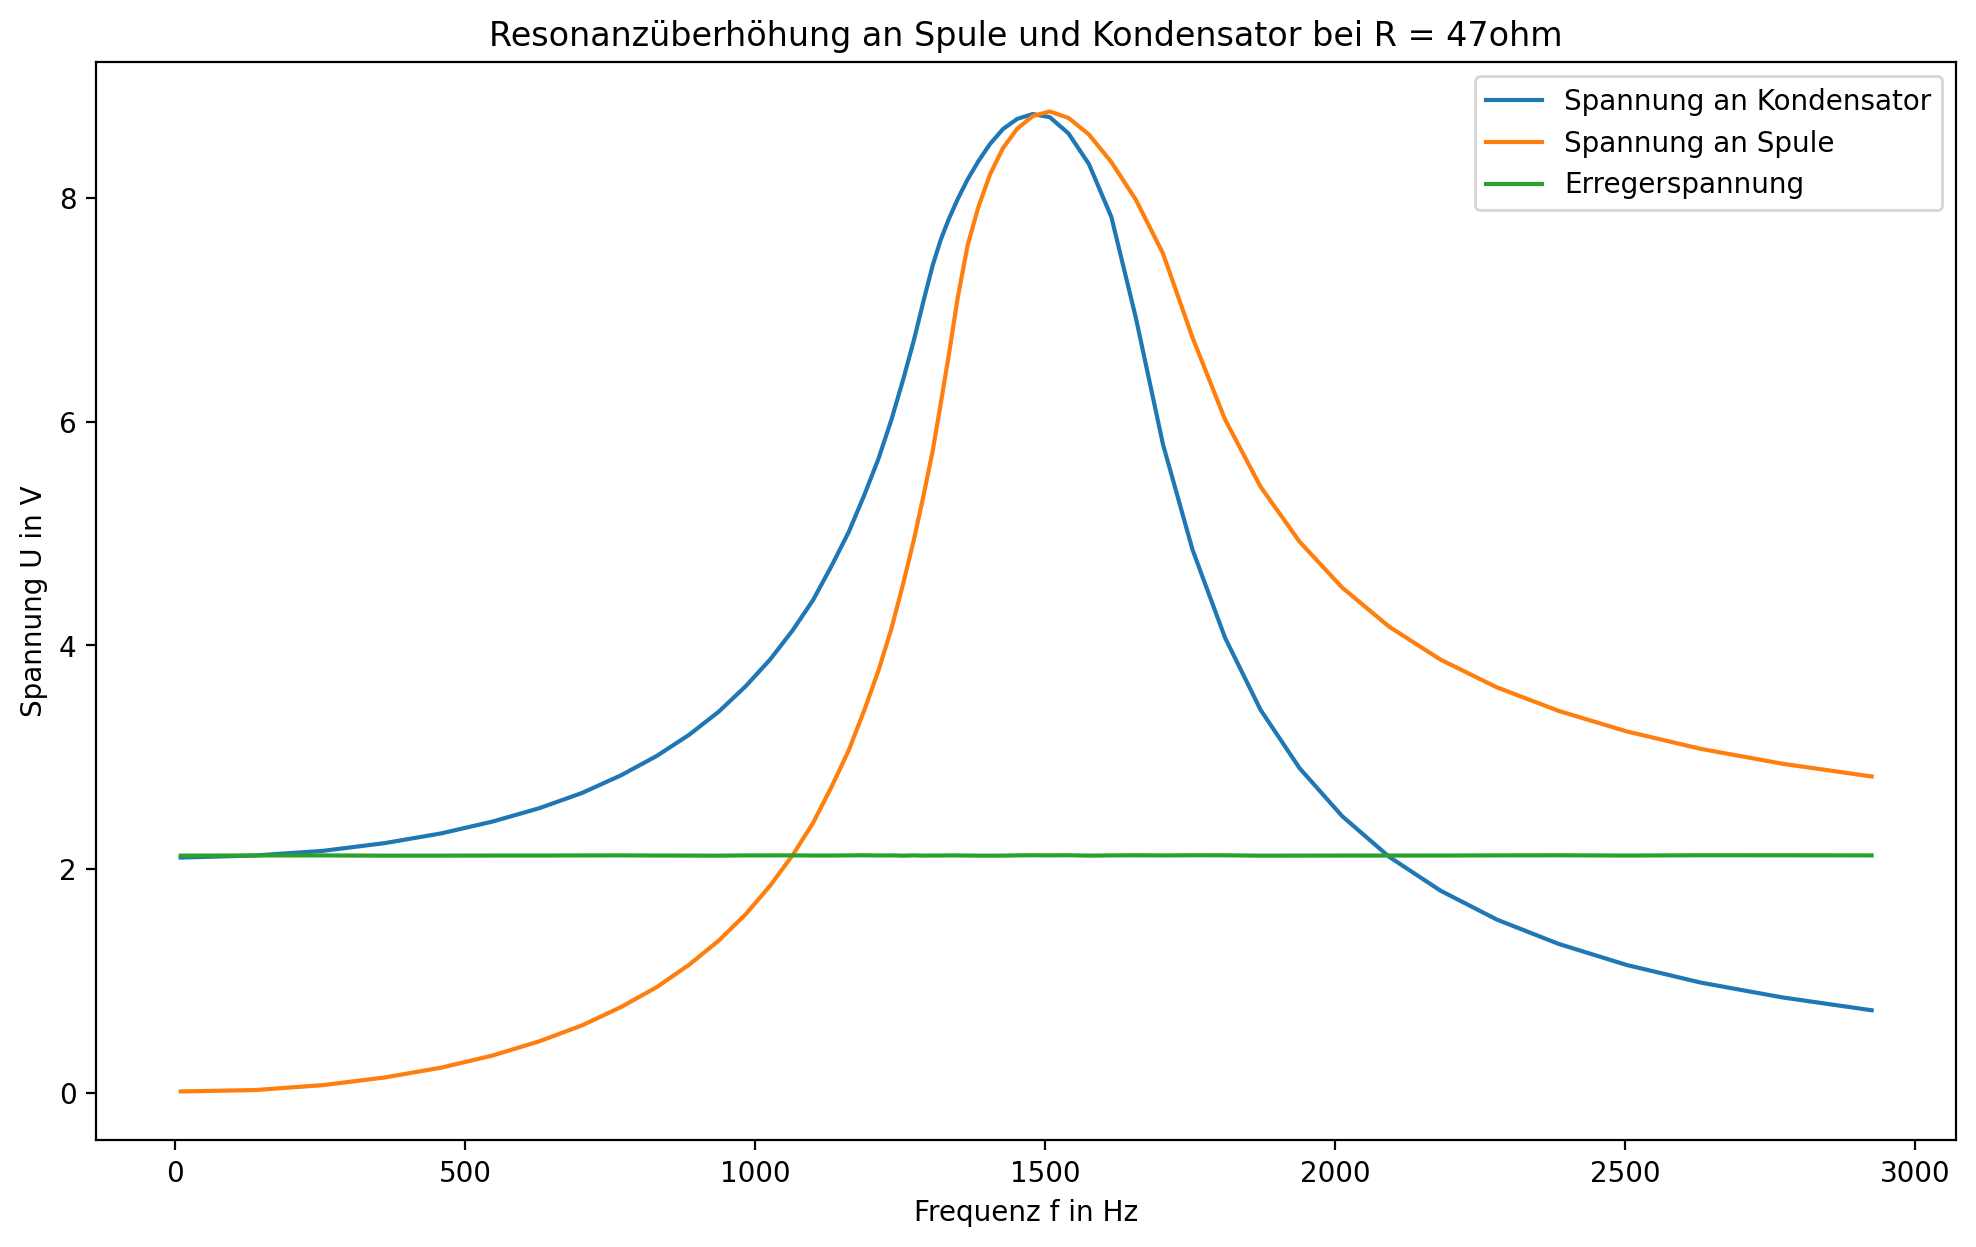

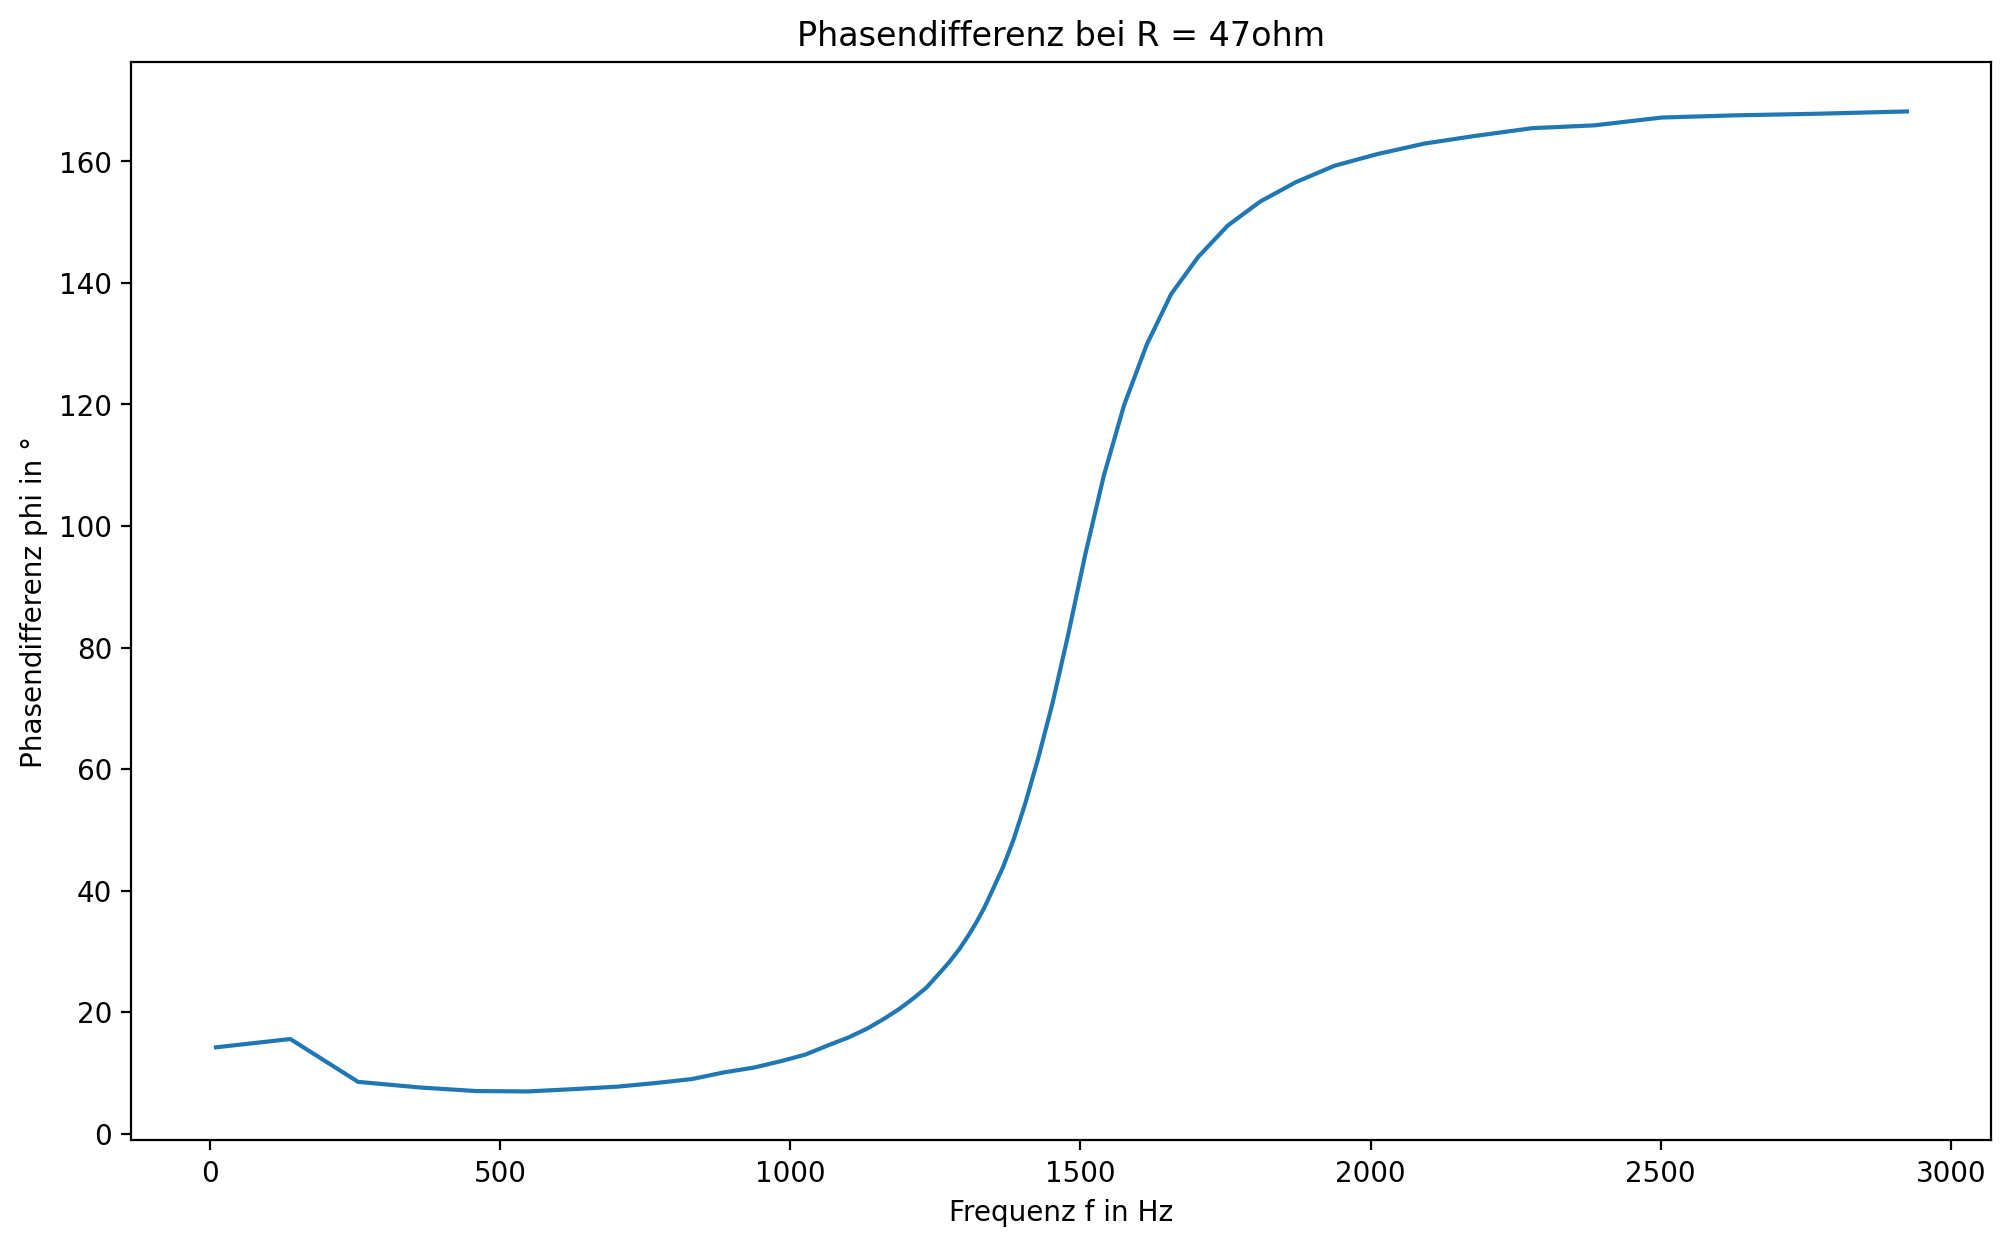

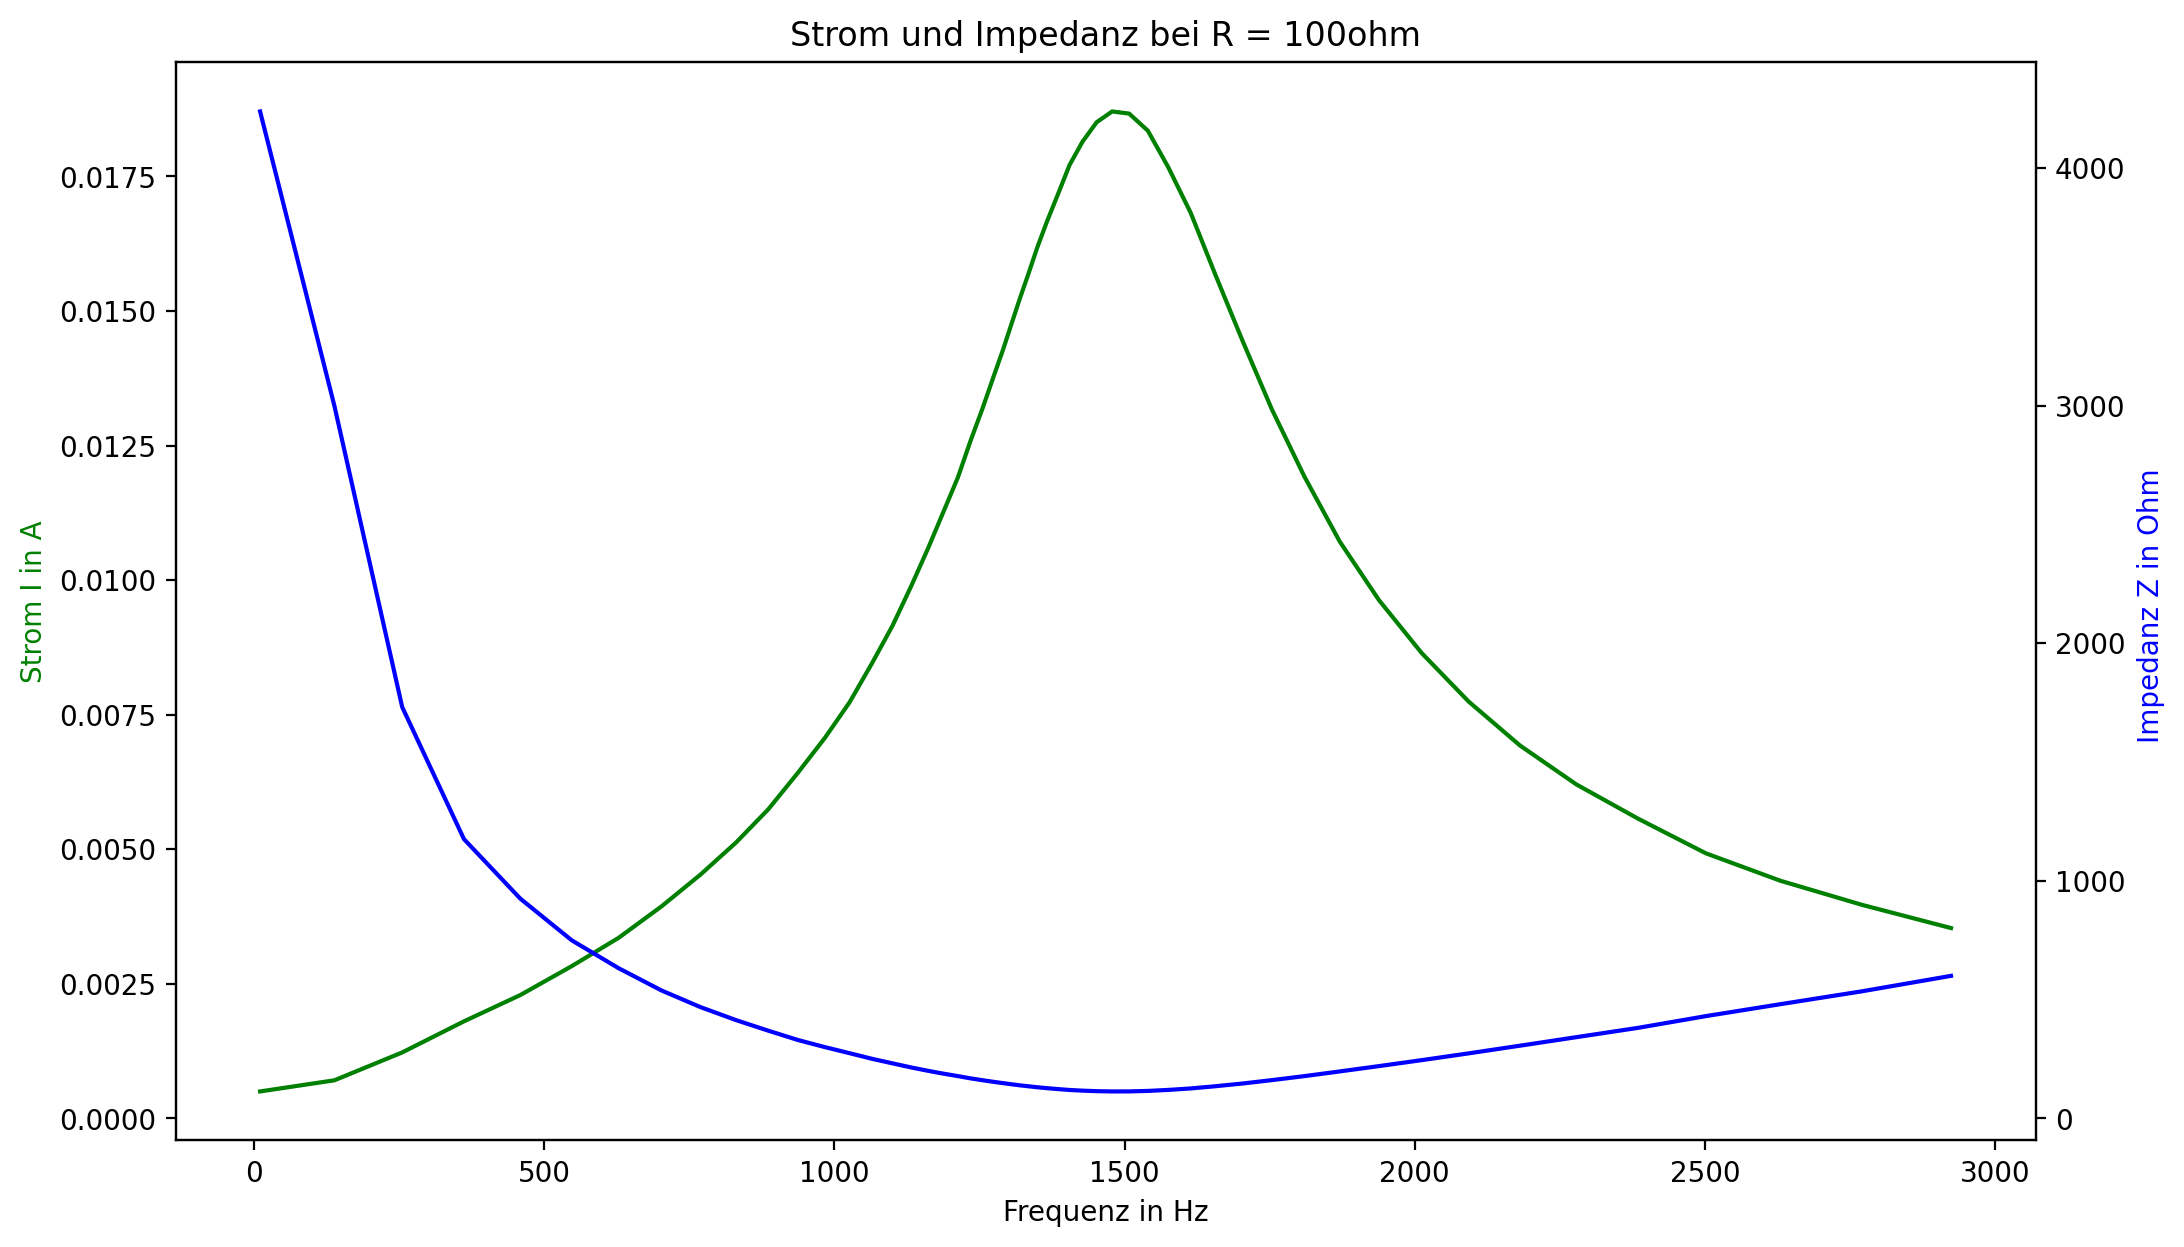

6.34669599082861 6.39660456805015


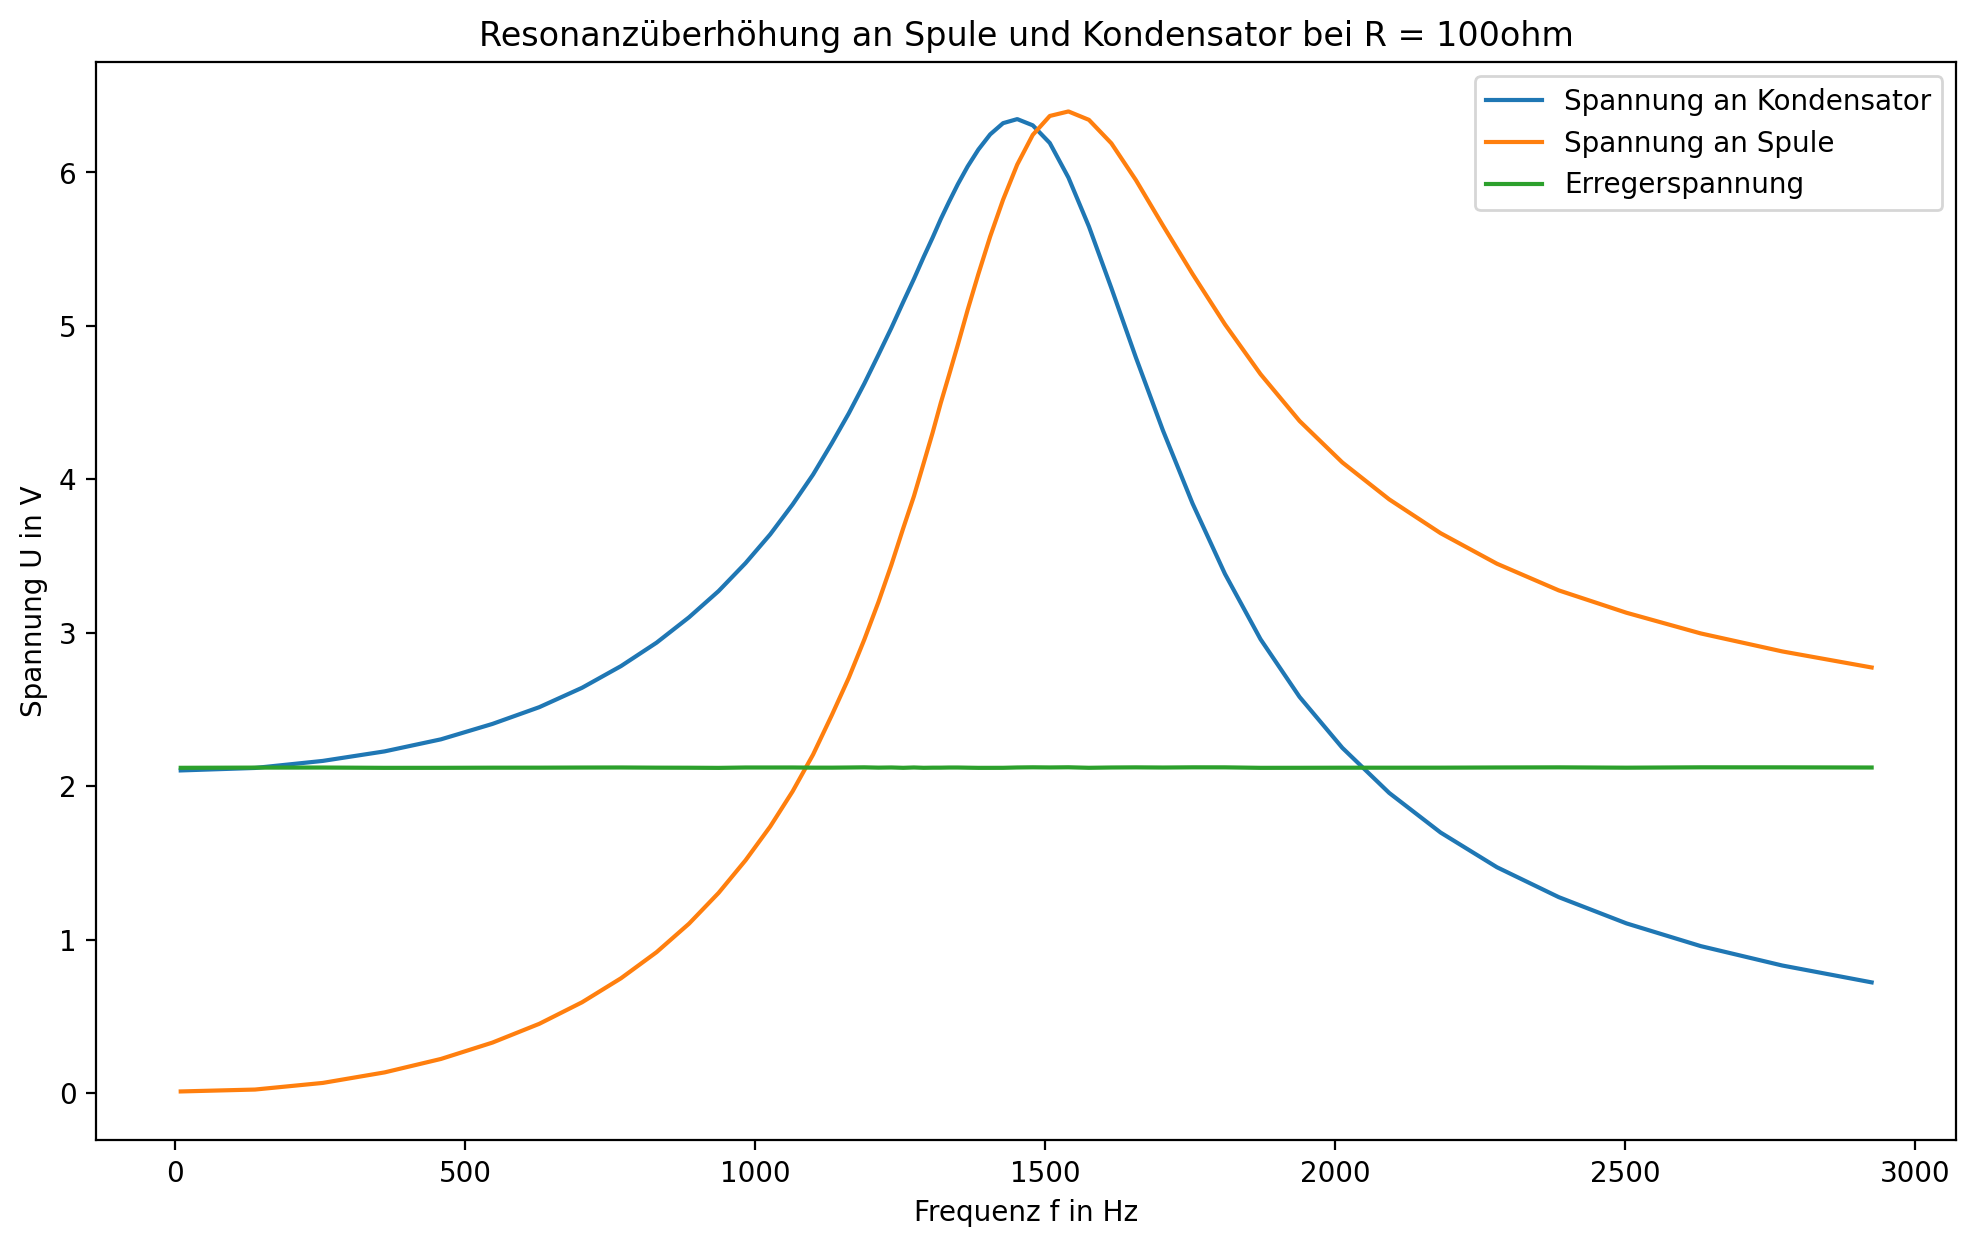

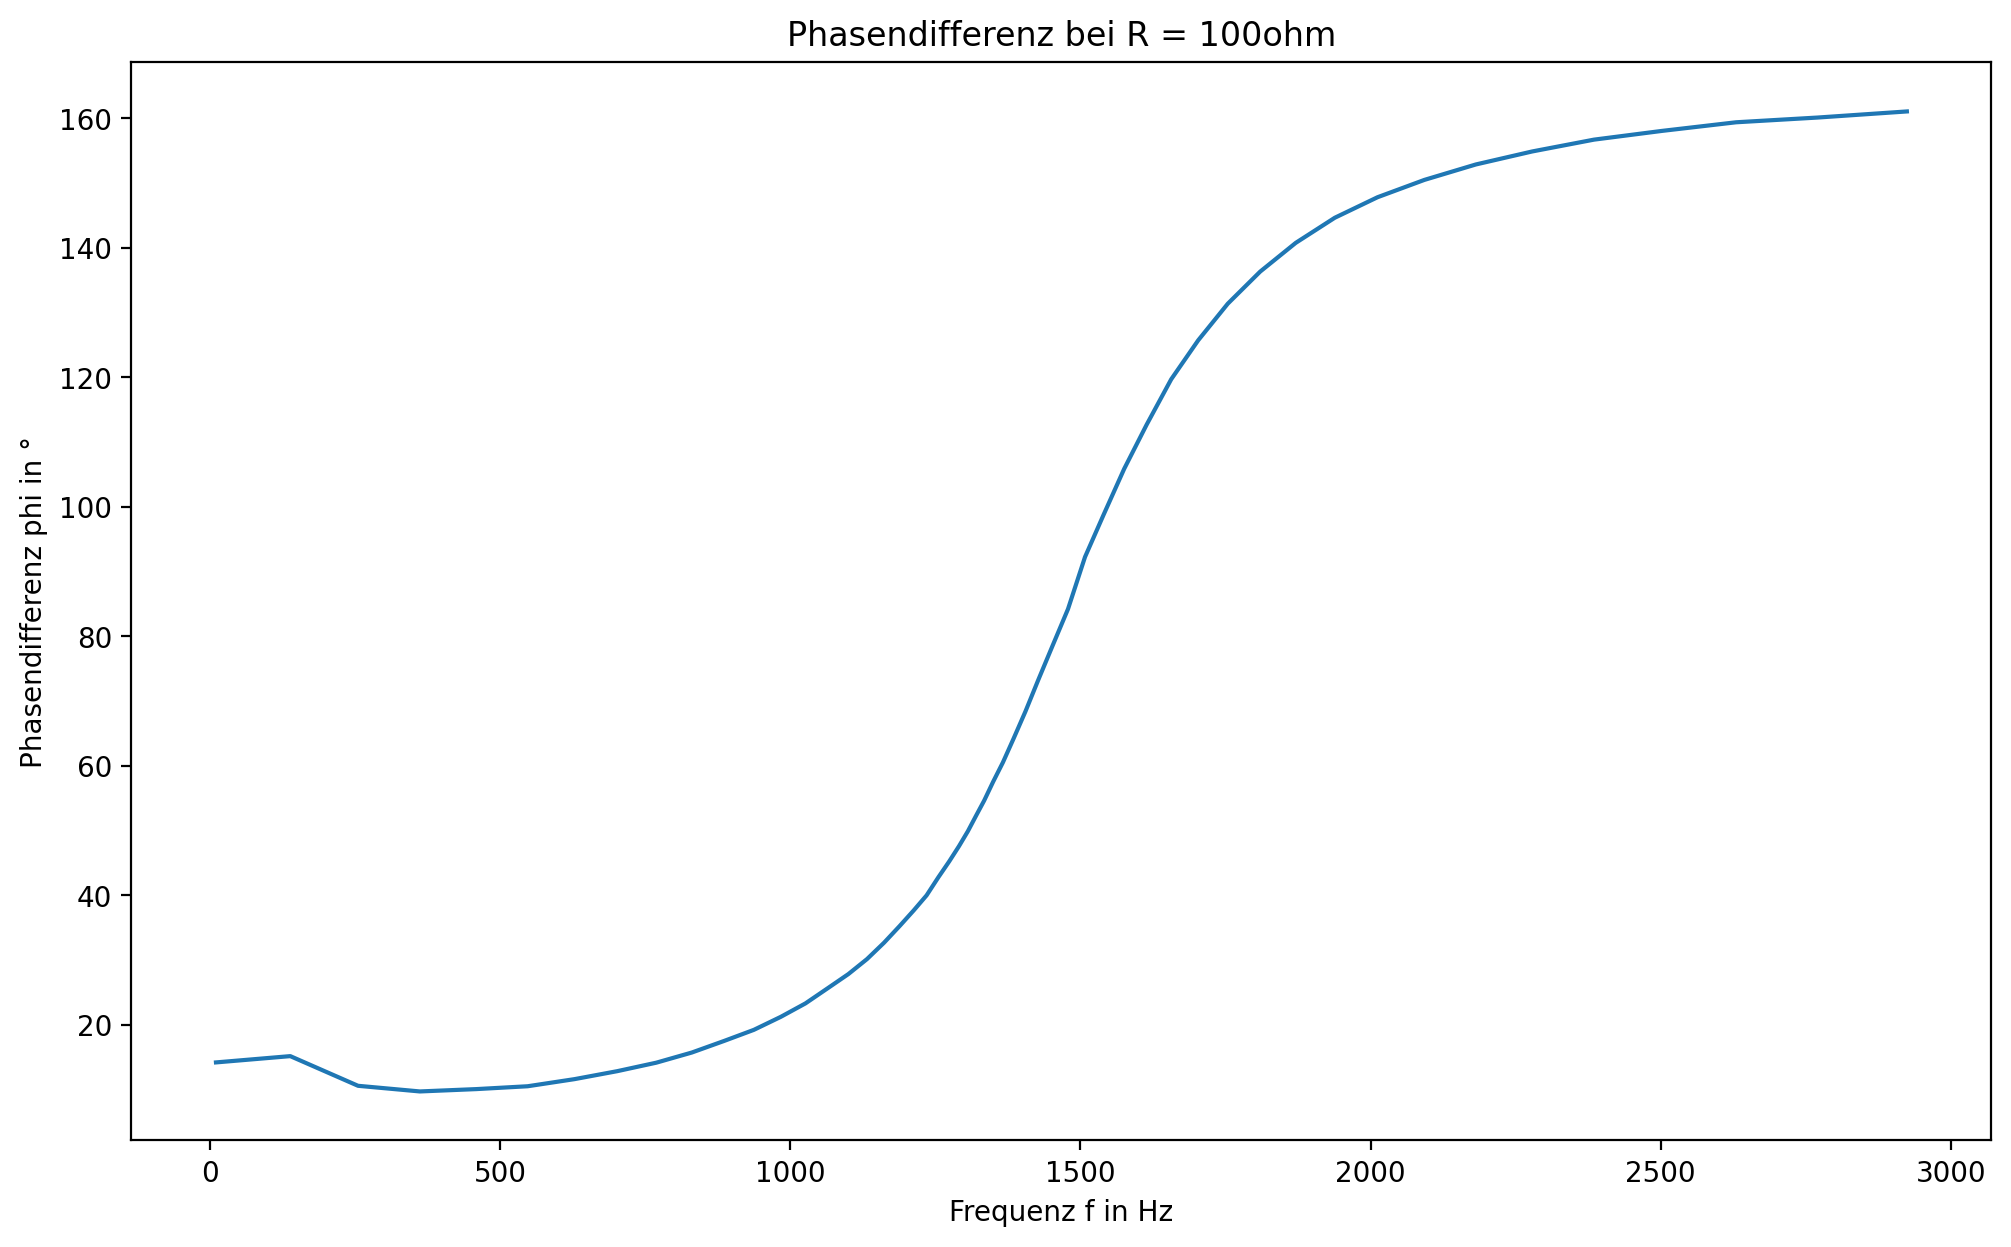

In [62]:
import pandas as pd
Q_I = []
d_Q_I = []
Q_Ua = []
d_Q_Ua = []
Q_Ub = []
d_Q_Ub = []
file_names = ["2.2_8.2ohm.csv", "2.2_47ohm.csv", "2.2_100ohm.csv"]
#Zeit t / ms;Spannung U_2 / V;Spannung U_B1 / V;Stromstärke I_2 / A;Phasenverschiebung &j_2 / ;f2 f2;n0 n0;f0 f0;f1 f1;Spannung U_A1 / V;Z Z
for file in file_names: 
    df = pd.read_table(file, delimiter=";", decimal=",")
    min_size_t = 250
    t = df["Zeit t / ms"].to_numpy() / 1000
    U_2 = df["Spannung U_2 / V"].to_numpy()
    U_B1 = df["Spannung U_B1 / V"].to_numpy()
    I = df["Stromstärke I_2 / A"].to_numpy()
    d_phi = df["Phasenverschiebung &j_2 / °"].to_numpy() +90
    f = df["f2 f2"].to_numpy()
    n0 = df["n0 n0"].to_numpy()
    f0 = df["f0 f0"].to_numpy()
    f1 = df["f1 f1"].to_numpy()
    U_A1 = df["Spannung U_A1 / V"].to_numpy()
    Z = df["Z Z"].to_numpy()
    
    # find peaks in I to calculate fwhm for Q
    peaks, prop = sc.signal.find_peaks(I)
    f0_exp = f[peaks[0]]
    height_for_Q = 1/np.sqrt(2)
    a, b, c, d = sc.signal.peak_widths(I, peaks, rel_height=1-height_for_Q, prominence_data=None, wlen=None)
    fwa_sqrt2 = (f[int(np.ceil(d[0]))] - f[int(np.floor(c[0]))]) 
    d_fwa_sqrt2 = fwa_sqrt2 * 0.2
    a, b, c, d = sc.signal.peak_widths(I, peaks, rel_height=0.5, prominence_data=None, wlen=None)
    err_d_f0_exp = (f[int(np.ceil(d[0]))] - f[int(np.floor(c[0]))]) / 2
    #Q.append(f0_exp / fwa_sqrt2)
    #d_Q.append(np.sqrt(err_d_f0_exp**2 / fwa_sqrt2**2 + f0_exp**2 * d_fwa_sqrt2 **2 / fwa_sqrt2**4))
    
    
    #plot Strom und Impedanz
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    #ax1.plot(f[peaks], I[peaks], "x", label = "Peak")
    #ax1.hlines(y=I[peaks[0]]*height_for_Q, xmin=f[int(np.floor(c[0]))], xmax=f[int(np.ceil(d[0]))], label="fwhm des Peaks")
    ax1.plot(f, I, 'g-', label="I_omega in A")
    ax2.plot(f, Z, 'b-', label="Imepdanz Z in Ohm")

    ax1.set_xlabel('Frequenz in Hz')
    ax1.set_ylabel('Strom I in A', color='g')
    ax2.set_ylabel('Impedanz Z in Ohm ', color='b')
    plt.title("Strom und Impedanz bei R = " + file[4:-4])
    plt.show()
    
    
    U0 = np.mean(U_2)
    d_U0 = np.std(U_2)
    
    peaks_a, prop_a = sc.signal.find_peaks(U_A1)
    peaks_b, prop_b = sc.signal.find_peaks(U_B1)
    U0_a = U_A1[peaks_a[0]]
    U0_b = U_B1[peaks_b[0]]
    #print(U0_a, U0_b)
    
    d_U0_a = U0_a * 0.2

    d_U0_b = U0_b * 0.2
    Q_Ua.append(U0_a / U0)
    Q_Ub.append(U0_b / U0)
    
    d_Q_Ua.append(np.sqrt( (d_U0_a / U0)**2 + (U0_a * d_U0 / U0**2)**2))
    d_Q_Ub.append(np.sqrt( (d_U0_b / U0)**2 + (U0_b * d_U0 / U0**2)**2))
    
    
    # plot Spannung
    plt.plot(f, U_A1, label="Spannung an Kondensator")
    plt.plot(f, U_B1, label="Spannung an Spule")
    plt.plot(f, U_2, label="Erregerspannung")
    plt.legend()
    plt.xlabel('Frequenz f in Hz')
    plt.ylabel("Spannung U in V")
    plt.title("Resonanzüberhöhung an Spule und Kondensator bei R = " + file[4:-4])
    plt.show()
    
    
    plt.plot(f, d_phi)
    plt.xlabel('Frequenz f in Hz')
    plt.ylabel("Phasendifferenz phi in °")
    plt.title("Phasendifferenz bei R = " + file[4:-4])
    plt.show()
    


Um die Güte Q zu bestimmen, wird die volle Breite der Resonanzkurve der Stromstärke auf der Höhe $\frac{1}{\sqrt2}$ berechnet. Für Q gilt dann $ Q = \frac{\Omega_{\mathrm{res}}}{\Delta\Omega} $

In [59]:
#geschätzte Unsicherheit für die Resonanzbreite: 20% des Wertes, die Unsicherheit auf omega_res wurde mit der halben Breite auf halber Höhe der Resonanzkurve abgeschätzt.
print("Für die Güte über die Stromstärke wurden folgene Werte ermittelt:")
for i in range(len(file_names)):
    print("Güte Q bei R = " + file_names[i][4:-4] + ": " + str(round(Q[i], 2)) + " +- " + str(round(d_Q[i], 3)))

Für die Güte über die Stromstärke wurden folgene Werte ermittelt:
Güte Q bei R = 8.2ohm: 109.67 +- 1.571
Güte Q bei R = 47ohm: 30.0 +- 0.365
Güte Q bei R = 100ohm: 7.61 +- 0.093


Für die Güte über die Spannungsüberhöhung gilt: $Q = \frac{|U_{C}(\omega_{0})|}{U_0} $. Die Unsicherheit auf $|U_{C}(\omega_{0})|$ wurde auf 20% geschätzt, die Unsicherheit von $U_0$ wurde mit der Funktion $np.std(U0) $ bestimmt.

In [60]:
print("Für die Güte über die Überhöhungsspannungen am Kondensator wurden folgene Werte ermittelt:")
for i in range(len(file_names)):
    print("Güte Q bei R = " + file_names[i][4:-4] + ": " + str(round(Q_Ua[i], 2)) + " +- " + str(round(d_Q_Ua[i], 3)))
print("")
print("Für die Güte über die Überhöhungsspannungen an der Spule wurden folgene Werte ermittelt:")
for i in range(len(file_names)):
    print("Güte Q bei R = " + file_names[i][4:-4] + ": " + str(round(Q_Ub[i], 2)) + " +- " + str(round(d_Q_Ub[i], 3)))

Für die Güte über die Überhöhungsspannungen am Kondensator wurden folgene Werte ermittelt:
Güte Q bei R = 8.2ohm: 4.6 +- 0.92
Güte Q bei R = 47ohm: 4.13 +- 0.825
Güte Q bei R = 100ohm: 2.99 +- 0.599

Für die Güte über die Überhöhungsspannungen an der Spule wurden folgene Werte ermittelt:
Güte Q bei R = 8.2ohm: 4.6 +- 0.92
Güte Q bei R = 47ohm: 4.14 +- 0.828
Güte Q bei R = 100ohm: 3.02 +- 0.603


Es ist festzustellen, dass die Güte in den beiden Methoden nur für kleine Werte des Widerstands ungefähr gleich ist, für große Werte sind große Unterschiede festzustellen.